In [1]:
import numpy, scipy, matplotlib, pandas
import os
import fileinput
import glob
import math
import warnings
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.stats import norm

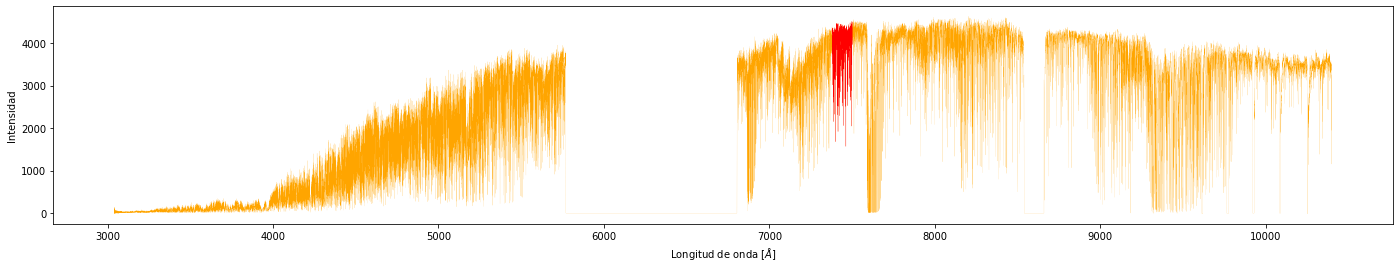

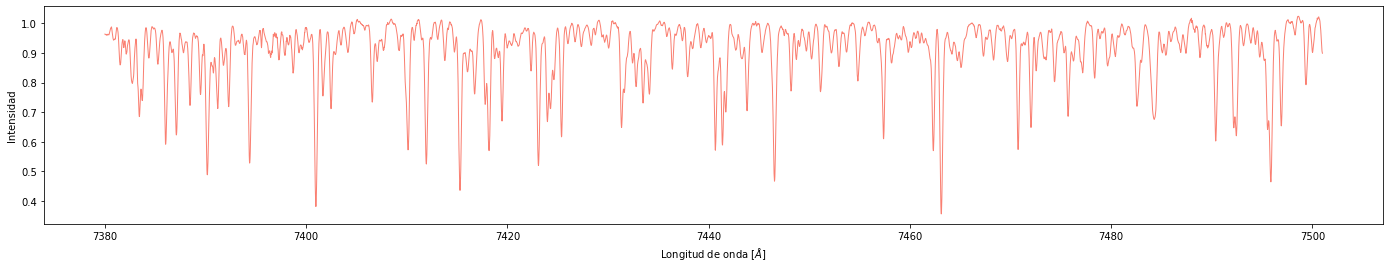

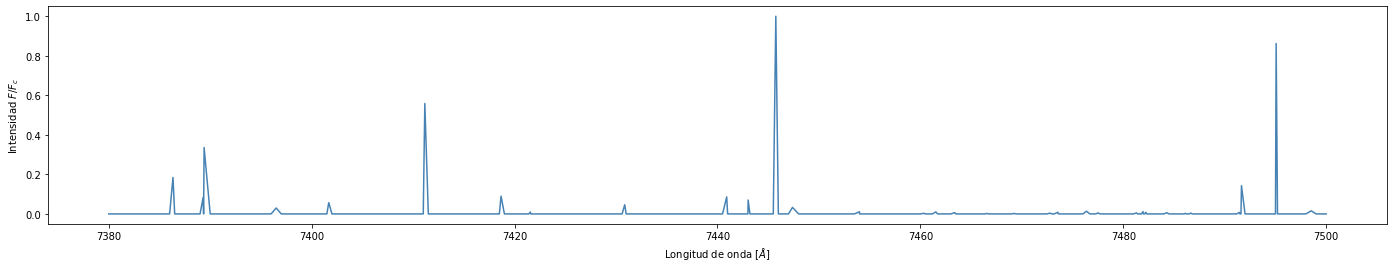

In [2]:
datahd = np.loadtxt('hd190421.dat')
datahd1 = np.loadtxt('hd190421-2.dat')

fig = plt.figure(figsize = (24, 4)) 
plt.plot(datahd[:,0], datahd[:,1], linewidth=0.1, c='orange')
plt.plot(datahd1[:,0], datahd1[:,1], linewidth=0.2, c='red')
#plt.scatter(datahd[:,0], datahd[:,1], marker = 'o', s = 0.001, c='orange')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad')
plt.savefig('10-HD190421.png', dpi=240)
plt.show()

xsp = datahd1[:,0]
ysp = datahd1[:,1]/4400

fig = plt.figure(figsize = (24, 4)) 
#plt.plot(datahd[:,0], datahd[:,1], linewidth=0.1, c='orange')
plt.plot(xsp, ysp, linewidth=1.0, c='salmon')
#plt.scatter(datahd[:,0], datahd[:,1], marker = 'o', s = 0.001, c='orange')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad')
plt.savefig('11-HD190421rango.png', dpi=240)
plt.show()

dataFeI = np.loadtxt('FeI-0.dat')

xf = dataFeI[:,0]
yf = dataFeI[:,4]/5800

fig = plt.figure(figsize = (24, 4)) 
plt.plot(xf, yf , linewidth=1.5, c='steelblue')
#plt.scatter(datahd[:,0], datahd[:,1], marker = 'o', s = 0.001, c='orange')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('12-EspectroFeI.png', dpi=240)
plt.show()

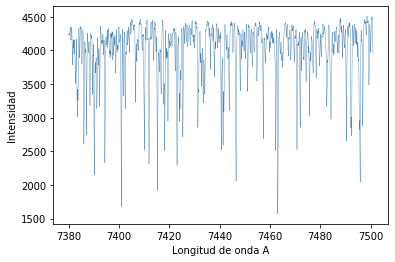

In [3]:
# cortar y ver seccion de espectro

datahd2 = np.loadtxt('hd190421-2.dat')

plt.figure()
plt.plot(datahd2[:,0], datahd2[:,1], linewidth=0.4, c='steelblue')
#plt.scatter(datahd2[:,0], datahd2[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('HD190421-2.pdf', dpi=240)
plt.show()

[4241.82269218 4233.09491604 4232.79787151 ... 3989.9954237  3969.13711783
 3956.628751  ]
[[8.66991763e-01 4.98322422e-01 2.15889475e-04]
 [8.67435221e-01 4.97550090e-01 2.13934205e-04]
 [8.67450880e-01 4.97522788e-01 2.13160568e-04]
 ...
 [8.82866074e-01 4.69624808e-01 1.89335009e-04]
 [8.83883587e-01 4.67706926e-01 1.89211218e-04]
 [8.84493096e-01 4.66553233e-01 2.10809432e-04]]


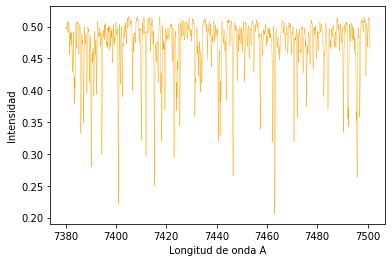

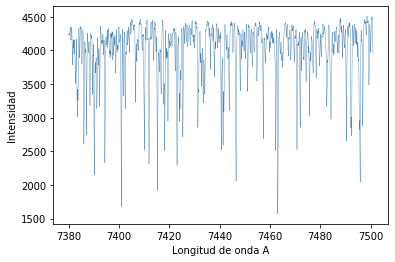

In [4]:
#normalizacion
'''
import pandas as pd

df = pd.read_csv('hd190421-2.dat')

first_column = df.columns[0]

df = df.drop([first_column], axis = 1)
df.to_csv('hd190421-3.dat', index = False)

####

#primero eliminar columnas de los archivos
'''
'''
f = open("hd190421-2.dat", "r")
g = open("hd190421-2n.dat", "w")

for line in f:
    if line.strip():
        g.write("\t".join(line.split()[:2]) + "\n")
        
f.close()
g.close()
'''

from sklearn import preprocessing
import numpy as np

datanorm = np.loadtxt('hd190421-2.dat')

Fnorm = datanorm[:,1]

normalized= preprocessing.normalize(datanorm)
print(Fnorm)
print(normalized)

plt.plot(datanorm[:,0], normalized[:,1], linewidth=0.4, c='orange')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('HD190421-2n.png', dpi=240)
plt.show()

plt.figure()
plt.plot(datahd2[:,0], datahd2[:,1], linewidth=0.4, c='steelblue')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
#plt.savefig('HD190421-2.png', dpi=1080)
plt.show()

In [5]:
#df = pd.DataFrame({'lab':datafeI[:,0], 'val':datafeI[:,1]})
#ax = df.plot.bar(x='lab', y='val', rot=0.5, linewidth=0.01, color='r')
#plt.xlabel('Longitud de onda A')
#plt.ylabel('Intensidad')
#plt.savefig('FeI.png', dpi=1080)

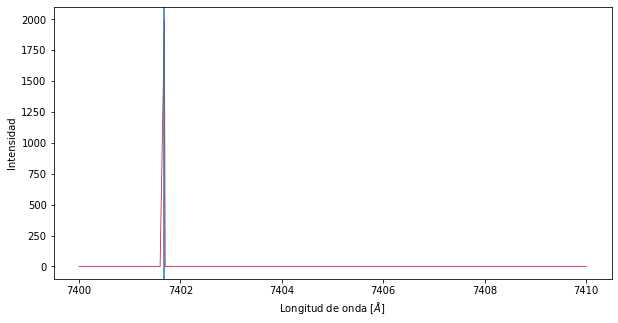

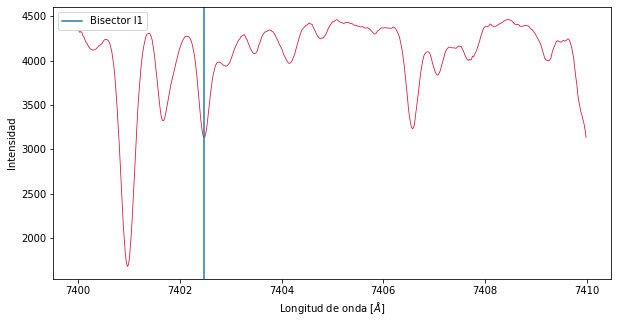

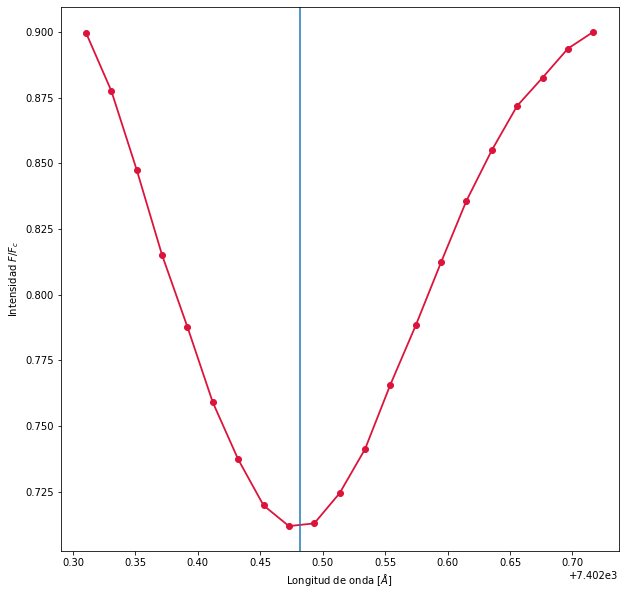

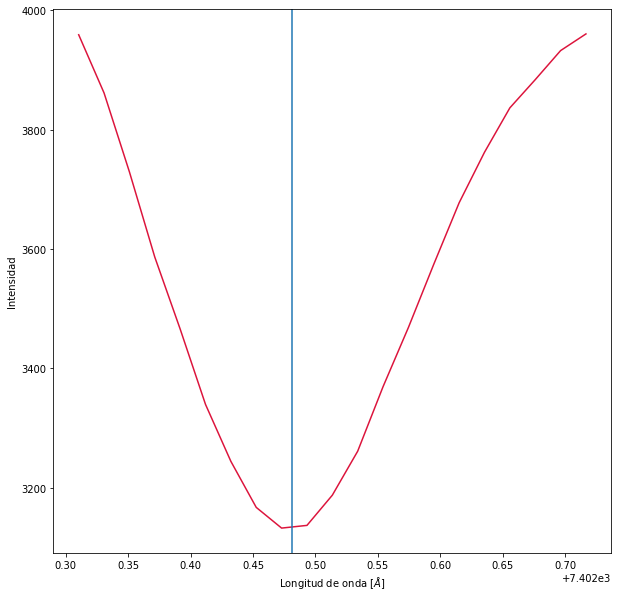

7402.511914133907 0.899770504701
7402.4982141338805 0.8775987812916591
7402.489114133861 0.8475424112734545
7402.484164133852 0.8150889005075228
7402.482764133849 0.7877034055811591
7402.480314133843 0.7589763329995682
7402.481064133845 0.7372856440026591
7402.479614133843 0.7197542904308409
7402.481114133845 0.7118684256660001
7402.480614133845 0.7128972125385455
7402.479864133843 0.7244002308959773
7402.481014133846 0.7411530122843182
7402.480564133844 0.7657263541852954
7402.482864133849 0.7882796245337046
7402.484014133852 0.8123657365106136
7402.486664133857 0.8357741801660908
7402.490864133865 0.8550205292864773
7402.495264133874 0.8719291793919091
7402.501364133886 0.8826608258359319
7402.5066141338975 0.8937336175276364
minimos
[7402.48146413 7402.48156413]
[0.71107589 0.71107572]


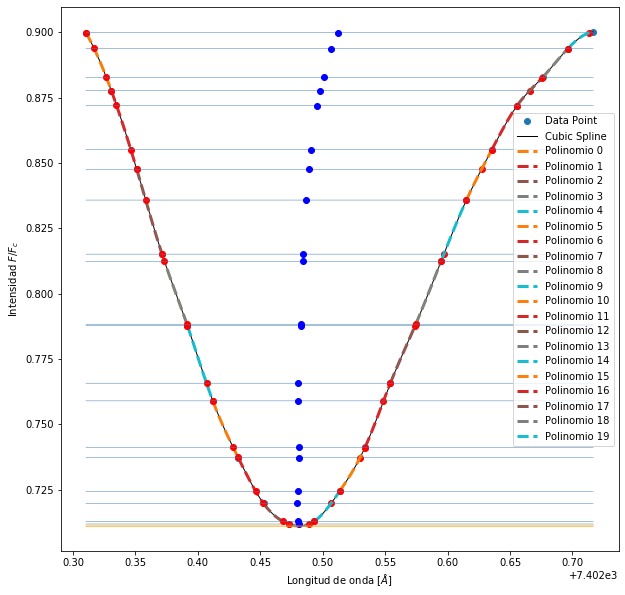

0.7110757168998293


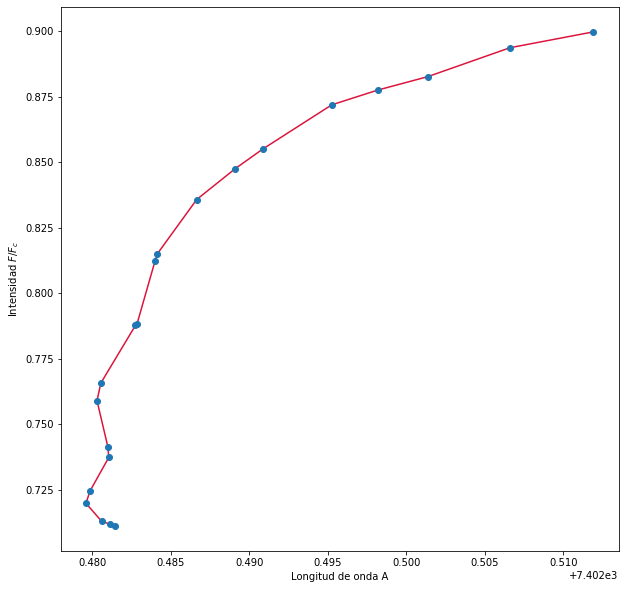

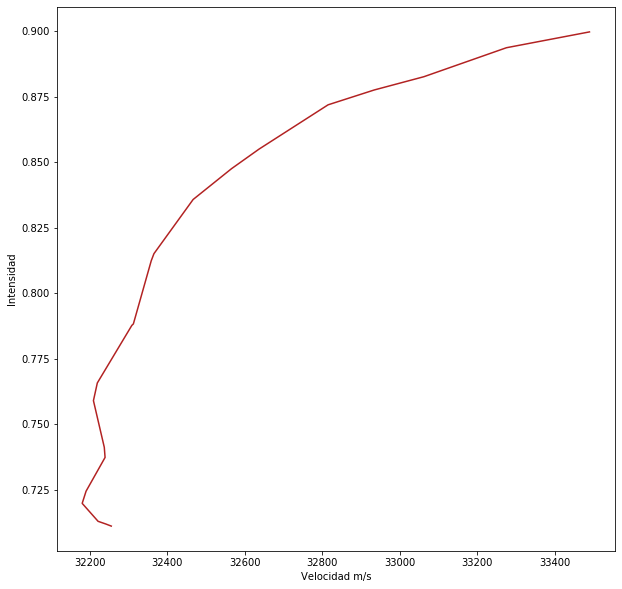

32267.909115897586


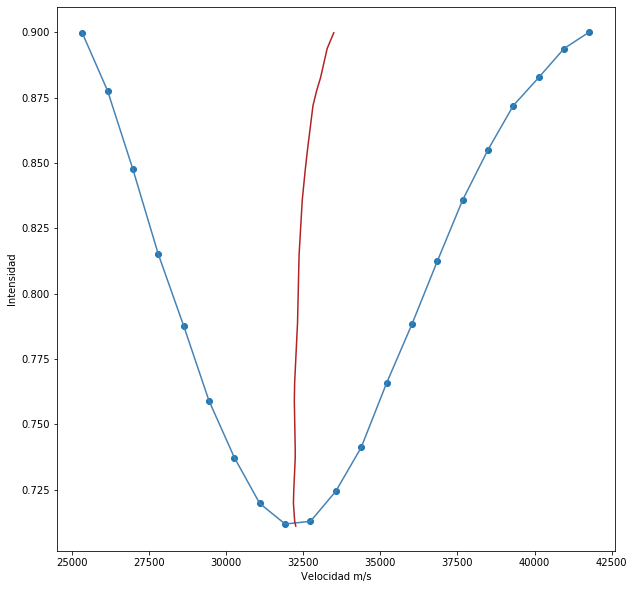

33490.78400166216 0.899770504701
32935.29350154899 0.8775987812916591
32566.489501473858 0.8475424112734545
32367.503001433317 0.8150889005075228
32311.55300142192 0.7877034055811591
32211.292001401496 0.7589763329995682
32243.163501407987 0.7372856440026591
32182.414501395615 0.7197542904308409
32244.93550140835 0.7118684256660001
32224.801501404247 0.7128972125385455
32194.58750139809 0.7244002308959773
32241.37700140762 0.7411530122843182
32219.86750140324 0.7657263541852954
32313.578001422335 0.7882796245337046
32360.405501431873 0.8123657365106136
32467.166501453623 0.8357741801660908
32637.694001488366 0.8550205292864773
32817.68650152504 0.8719291793919091
33064.28350157527 0.8826608258359319
33276.51350161851 0.8937336175276364


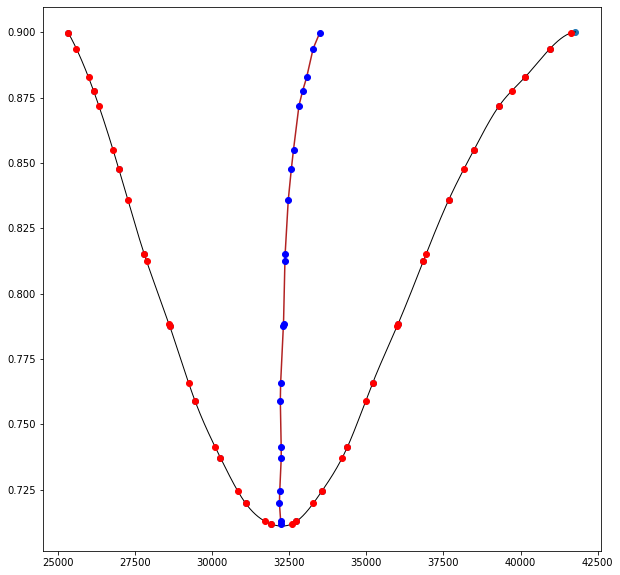

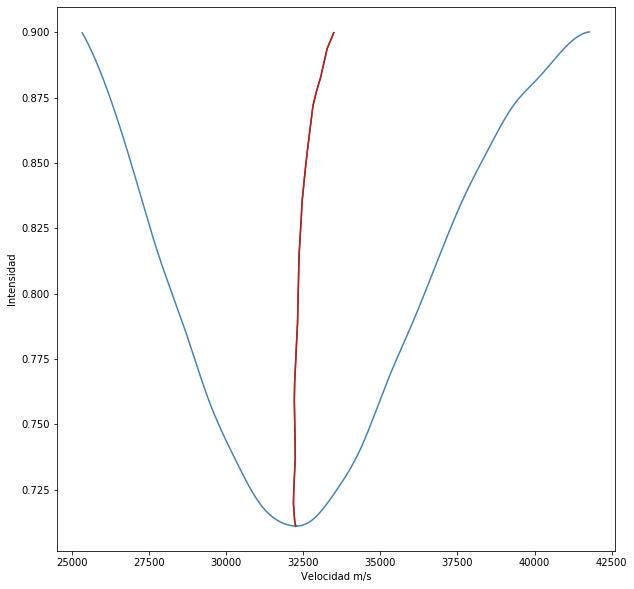

In [6]:
#-----------------------------------------------------------------------------------------
#Seccion del espectro a evaluar

#---------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np
from sklearn import preprocessing
import numpy as np

# Construccion bisectores
import numpy as np
from numpy import *
from scipy.interpolate import *
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

#datanormI1 = np.loadtxt('I1.dat')

dataI1 = np.loadtxt('I1.dat')
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanI1 = dataI1/4400

#Fnorm = datanormI1[:,1]

#normalizedI1= preprocessing.normalize(datanormI1)

datafeI = np.loadtxt('FeI-I.dat')

xcoords = [7401.6849]
colors = ['b']

# Grafica espectro del FeI y de la estrella HD---------------------------------------
fig = plt.figure(figsize = (10, 5)) 
plt.plot(datafeI[:,0], datafeI[:,1], linewidth=0.8, c='crimson')
plt.axvline(xcoords, label='Bisector I1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad')
plt.savefig('FeI-I.png', dpi=240)
plt.show()

datahdI = np.loadtxt('hd190421-I.dat')

xcoords = [7402.4815]
colors = ['b']

fig = plt.figure(figsize = (10, 5)) 
plt.plot(datahdI[:,0], datahdI[:,1], linewidth=0.8, c='crimson')
plt.axvline(xcoords, label='Bisector I1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad')
plt.legend()
plt.savefig('HD190421-I.png', dpi=240)
plt.show()

# Grafica de linea de absorcion normalizada y sin normalizar-------------------------------
fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataI1[:,0], datanI1[:,1], linewidth=1.8, c='crimson')
plt.plot(dataI1[:,0], datanI1[:,1], 'o', label='Data Point', c='crimson')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords, label='Bisector I1')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('I1.png', dpi=240)
plt.show()

dataI1 = np.loadtxt('I1.dat')

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataI1[:,0], dataI1[:,1], linewidth=1.5, c='crimson')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords, label='Bisector I1')
plt.ylabel('Intensidad')
plt.savefig('I1.pdf', dpi=240)
plt.show()

###################Construccion del bisector ###################################################
#-----------------------------------------------------------------------------------------------
# seleccionar datos ----------------------------------------------------------------------------
dataI1 = np.loadtxt('I1.dat')
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanI1 = dataI1/4400

# Seleccionar coordenandas ---------------------------------------------------------------------
x = dataI1[:,0]
y = datanI1[:,1]

#Manipulacion datos
#data = np.genfromtxt('I1.dat')
#data = ((data-7401.6849)/7401.6849)*299729458
#np.savetxt("I1v.dat", data, fmt='%d')

# Cubic Spline regresion -----------------------------------------------------------------------
s = interpolate.CubicSpline(x, y)

arr = np.arange(np.amin(x), np.amax(x), 0.0001)
s = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 10)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)


#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(x.shape[0] - 1):
    segment_x = np.linspace(x[i], x[i + 1], 100)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    
    plt.plot(segment_x, segment_y, label='Polinomio {}'.format(i), ls='--', lw=3)
    @np.vectorize
    def constant_function1(x):
        return datanI1[i,1]
    delta_x1 = np.arange(dataI1[0,0], dataI1[20,0], 0.0001)
    
    idx = np.argwhere(np.diff(np.sign(s(arr)-constant_function1(i))) != 0).reshape(-1)+0
    
        
    plt.plot(arr[idx], s(arr)[idx], 'ro')
    plt.plot(delta_x1, constant_function1(delta_x1), linewidth=0.5, c='steelblue')
    plt.plot()
    #print(arr[idx])
    bisector = (arr[idx][0]+arr[idx][1])/2
    #print(bisector)
    plt.plot(bisector, constant_function1(bisector), 'bo')
    print(bisector, constant_function1(bisector))
    plt.plot(segment_x, segment_y, ls='-', lw=0.1)
#for j in range(18):
   # print(arr[idx][j+1], arr[idx][j])
    
@np.vectorize
def constant_functionmini(x):
    return min(s(arr))

delta_xm = np.arange(dataI1[0,0], dataI1[20,0], 0.0001)
plt.plot(delta_xm, constant_functionmini(delta_xm), linewidth=1.0, c='orange')

#print(constant_functionmini)
    
idmin = np.argwhere(np.diff(np.sign(s(arr)-constant_functionmini(delta_xm))) != 0).reshape(-1)+0

plt.plot(arr[idmin], s(arr)[idmin], 'crimson')
print('minimos')
print(arr[idmin])
print(s(arr)[idmin])

plt.legend()
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('BisectorI1b.png', dpi=240)
plt.show()

print(min(s(arr)))

'''BisecII1 = np.loadtxt('BisecII1.dat')

xb = BisecII1[:,0]
yb = BisecII1[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'crimson')
plt.plot(xb, yb, 'o', label='Data Point')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorII1.png', dpi=720)
plt.show()

#Manipulacion datos
data = np.genfromtxt('II1.dat')
data = ((data-7411.1544)/7411.1544)*299729458
np.savetxt("II1v.dat", data, fmt='%d')

#Transformar a velocidades
#Construccion del bisector
#-----------------------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np

data = np.genfromtxt('BisecII1.dat')
data = ((data-7411.1544)/7411.1544)*299729458
np.savetxt("BisecII1v.dat", data, fmt='%d')

BisecII1v = np.loadtxt('BisecII1v.dat')

xb = BisecII1v[:,0]
yb = BisecII1[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorII1v.png', dpi=720)
plt.show()
'''


#Transformar a velocidad el espectro de cada liena de absorcion ------------------------------
from seaborn import load_dataset

# seleccionar datos ----------------------------------------------------------------------------
BisecI1 = np.loadtxt('BisecI1.dat')

xb = BisecI1[:,0]
yb = BisecI1[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'crimson')
plt.plot(xb, yb, 'o', label='Data Point')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('LineaBisectorI1.png', dpi=240)
plt.show()

#Manipulacion datos
data = np.genfromtxt('I1.dat')
data = ((data-7401.6849)/7401.6849)*299729458
np.savetxt("I1v.dat", data, fmt='%d')

#Transformar a velocidades
#Construccion del bisector
#-----------------------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np

data = np.genfromtxt('BisecI1.dat')
data = ((data-7401.6849)/7401.6849)*299729458
np.savetxt("BisecI1v.dat", data, fmt='%d')

BisecI1v = np.loadtxt('BisecI1v.dat')

xb = BisecI1v[:,0]
yb = BisecI1[:,1]

#xb1 = BisecI1v1[:,0]
#yb1 = BisecI1v1[:,1]


fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorI1v.png', dpi=240)
plt.show()


# seleccionar datos ----------------------------------------------------------------------------
#datanI1 = np.loadtxt('I1n.dat')
datavI1 = np.genfromtxt('I1v.dat')

velocidad = (0.79667413/7401.6849)*299792458
print(velocidad)

# Seleccionar coordenandas ---------------------------------------------------------------------
#x = dataI1[:,0]
x = datavI1[:,0]
y = datanI1[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(x, y, 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorI1v.png', dpi=240)
plt.show()

arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

#fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize = (10, 10)) 
#ax.hold(True)
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arrv, sv(arrv), 'k-', label='Cubic Spline', lw=1)
plt.plot(xb, yb, 'firebrick')

#print(datavI1[0,0])
#print(datavI1[20,0])

#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(20):
    
    def constant_functionv1(x):
        return datanI1[i,1]
    delta_xv1 = np.arange(datavI1[0,0], datavI1[20,0], 0.001)
    
    idxv = np.argwhere(np.diff(np.sign(sv(arrv)-constant_functionv1(i))) != 0).reshape(-1)+0
            
    plt.plot(arrv[idxv], sv(arrv)[idxv], 'ro')
    #plt.plot(delta_xv1, constant_functionv1(delta_xv1), linewidth=0.5, c='orange')
    plt.plot()
    #print(arr[idx])
    bisectorv = (arrv[idxv][0]+arrv[idxv][1])/2
    #print(bisector)
    plt.plot(bisectorv, constant_functionv1(bisectorv), 'bo')
    print(bisectorv, constant_functionv1(bisectorv))

#-------------------------------------------------------------------------------    
arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 10)) 
#plt.plot(x, y, 'steelblue')
plt.plot(arrv, sv(arrv), 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorI1vs.png', dpi=240)
plt.show()



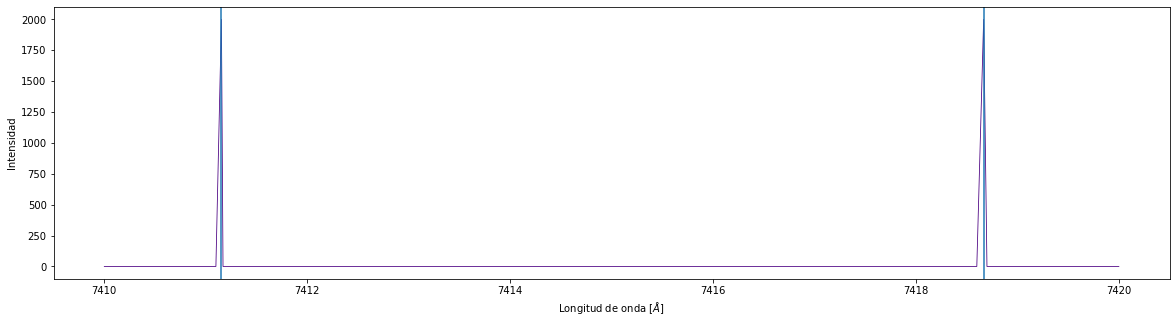

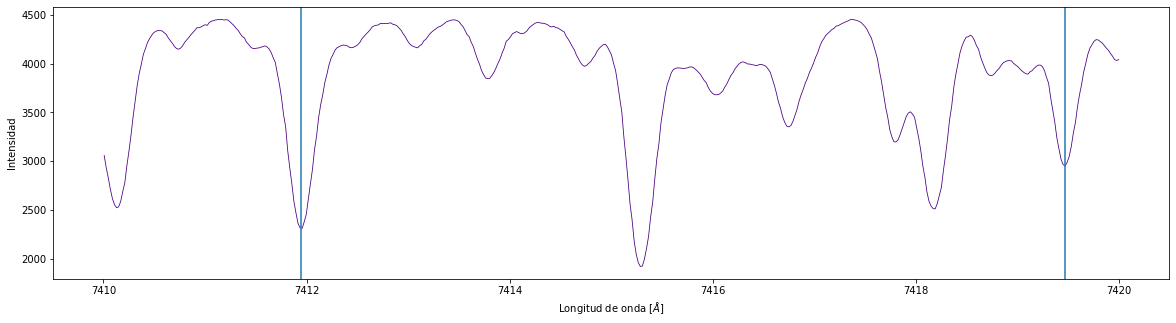

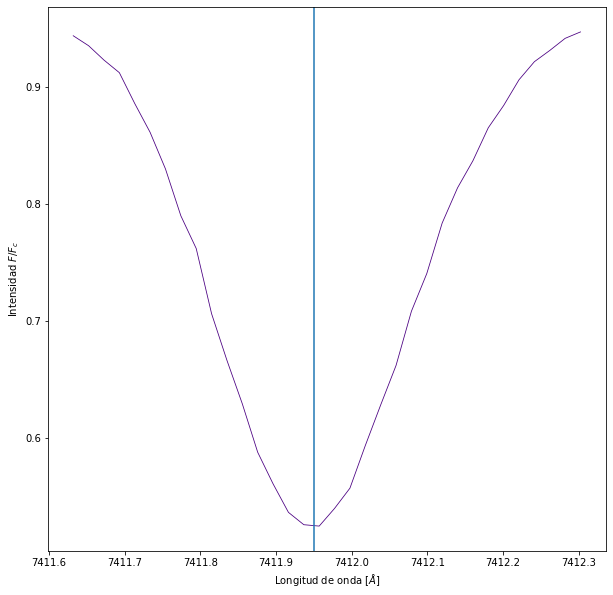

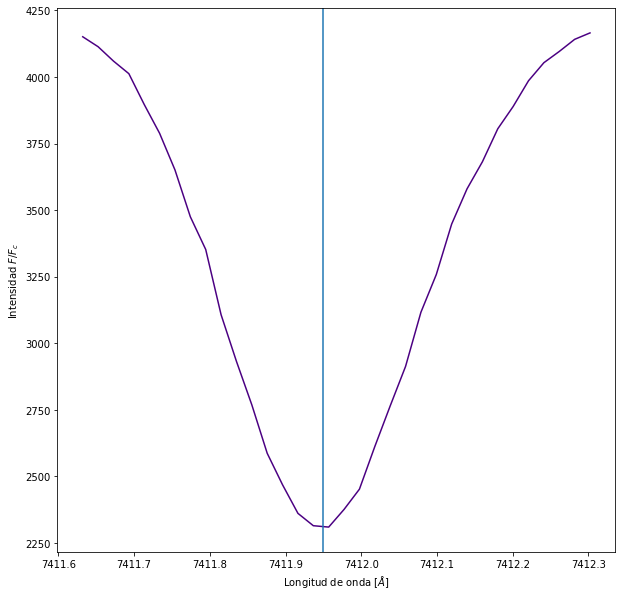

[7411.63205151 7411.65235998 7411.67266845 7411.69297692 7411.71328539
 7411.73359386 7411.75390233 7411.7742108  7411.79451927 7411.81482774
 7411.83513621 7411.85544468 7411.87575314 7411.89606161 7411.91637008
 7411.93667855 7411.95698702 7411.97729549 7411.99760396 7412.01791243
 7412.0382209  7412.05852937 7412.07883784 7412.09914631 7412.11945478
 7412.13976324 7412.16007171 7412.18038018 7412.20068865 7412.22099712
 7412.24130559 7412.26161406 7412.28192253 7412.302231  ]
[0.94345913 0.93496162 0.92269948 0.91196006 0.88565329 0.86106164
 0.82980619 0.7898253  0.7619072  0.70623895 0.6664065  0.62930586
 0.58798562 0.56103909 0.53669856 0.52616738 0.52498563 0.54007074
 0.55735974 0.59371655 0.62837303 0.66208374 0.70834049 0.74052821
 0.78360089 0.81366415 0.83676989 0.86493015 0.88393897 0.90591642
 0.92133572 0.93091566 0.9412489  0.94674748]
7411.959551514263 0.9434591256010454
7411.960951514266 0.9349616222504544
7411.95825151426 0.9226994778122499
7411.960251514264 0.91196

/home/juan/anaconda3/envs/lens3/lib/python3.7/site-packages/ipykernel_launcher.py:218: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/juan/anaconda3/envs/lens3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


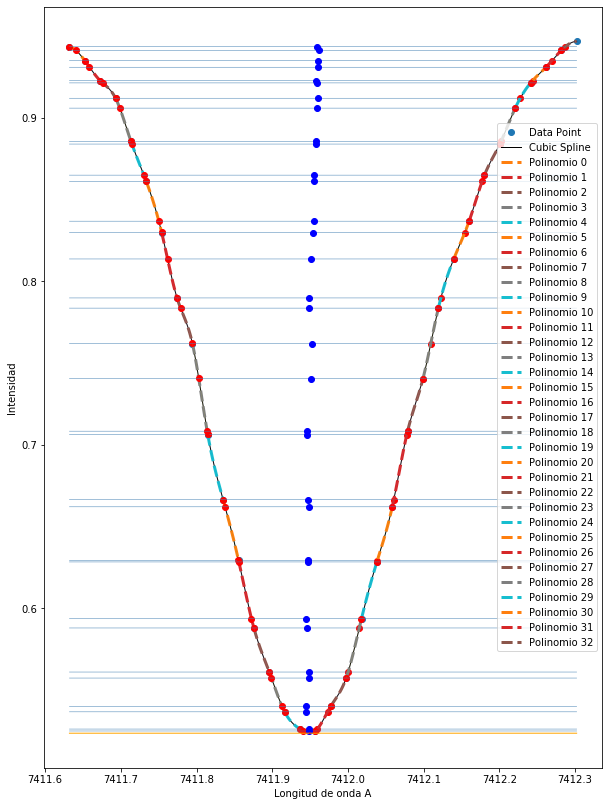

0.5236251813518106


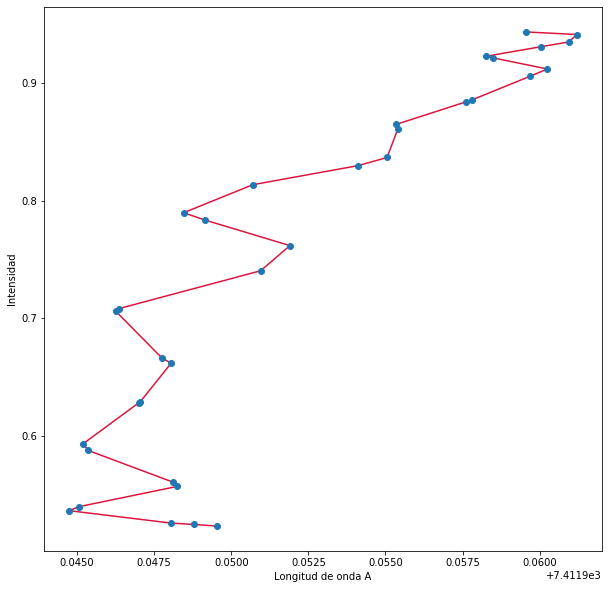

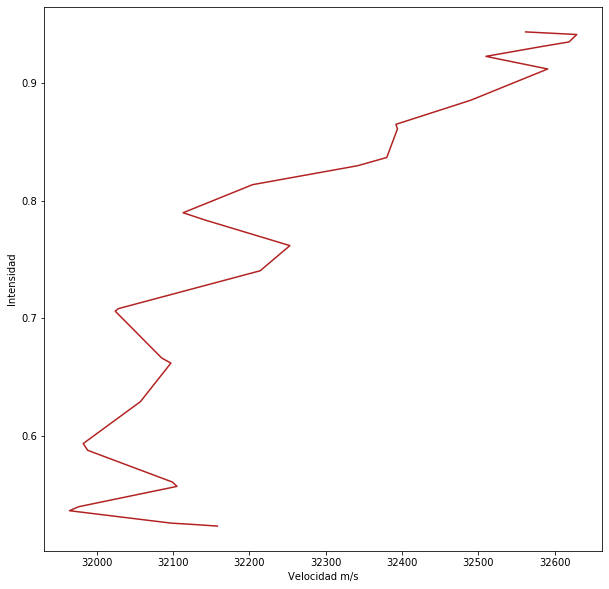

[19317. 20139. 20960. 21781. 22603. 23424. 24245. 25067. 25888. 26709.
 27531. 28352. 29173. 29995. 30816. 31637. 32459. 33280. 34101. 34923.
 35744. 36565. 37387. 38208. 39029. 39851. 40672. 41493. 42315. 43136.
 43957. 44779. 45600. 46421.]
[0.94345913 0.93496162 0.92269948 0.91196006 0.88565329 0.86106164
 0.82980619 0.7898253  0.7619072  0.70623895 0.6664065  0.62930586
 0.58798562 0.56103909 0.53669856 0.52616738 0.52498563 0.54007074
 0.55735974 0.59371655 0.62837303 0.66208374 0.70834049 0.74052821
 0.78360089 0.81366415 0.83676989 0.86493015 0.88393897 0.90591642
 0.92133572 0.93091566 0.9412489  0.94674748]


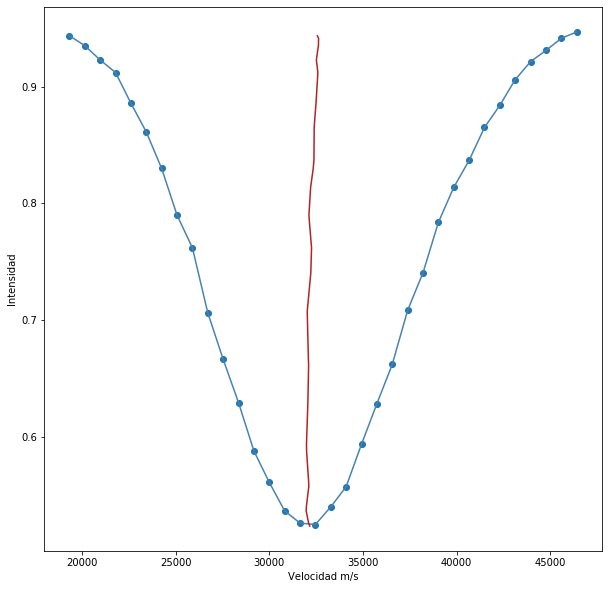

32562.842002698533 0.9434591256010454
32619.54300271008 0.9349616222504544
32510.297502687827 0.9226994778122499
32592.10300270449 0.9119600628713637
32493.83100268447 0.8856532928073864
32395.472502664437 0.861061642642591
32343.95550265394 0.8298061897777954
32115.566502607413 0.7898252966031364
32255.331502635883 0.7619072028141136
32026.38700258924 0.7062389484942045
32088.524002601902 0.6664065004073182
32060.40700259617 0.62930586271475
31988.24200258147 0.5879856244802955
32100.74200260439 0.561039091269
31964.380502576612 0.5366985557416819
32098.312502603898 0.5261673774603409
32130.2375026104 0.5249856261981136
31978.855502579558 0.5400707364714545
32106.63400260559 0.5573597404073409
31983.353502580474 0.5937165466504318
32057.157002595508 0.6283730274006364
32099.733502604184 0.6620837391444545
32031.83000259035 0.7083404856483864
32217.809002628237 0.7405282083901363
32142.66400261293 0.7836008915998864
32205.88750262581 0.81366414638075
32382.477002661784 0.83676988730922

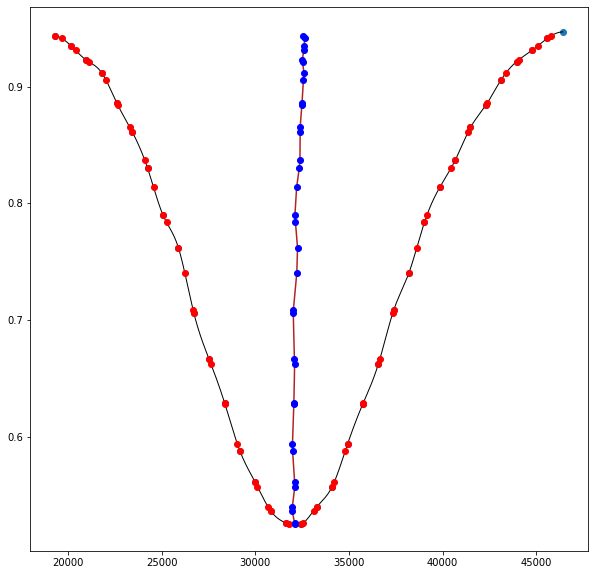

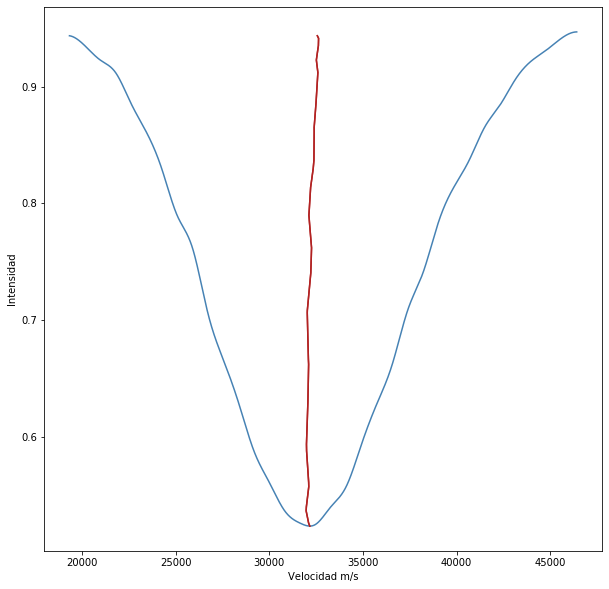

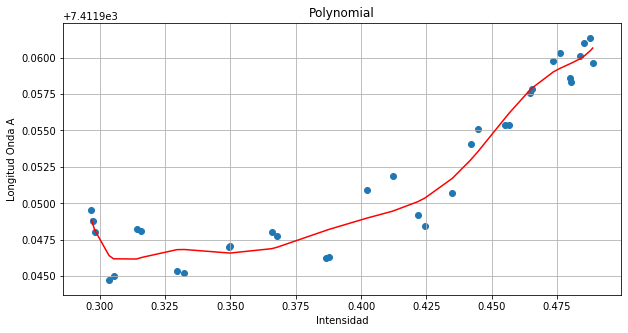

2540589312661820.5


In [7]:
'''
dataI1 = np.loadtxt('I1.dat')
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanI1 = dataI1/4400

Fnorm = datanormI1[:,1]

normalizedI1= preprocessing.normalize(datanormI1)

datafeI = np.loadtxt('FeI-I.dat')

xcoords = [7401.6849]
colors = ['b']

# Grafica espectro del FeI y de la estrella HD---------------------------------------
fig = plt.figure(figsize = (10, 5)) 
plt.plot(datafeI[:,0], datafeI[:,1], linewidth=0.8, c='crimson')
plt.axvline(xcoords, label='Bisector I1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad')
plt.savefig('FeI-I.png', dpi=720)
plt.show()

datahdI = np.loadtxt('hd190421-I.dat')

xcoords = [7402.4815]
colors = ['b']

fig = plt.figure(figsize = (10, 5)) 
plt.plot(datahdI[:,0], datahdI[:,1], linewidth=0.8, c='crimson')
plt.axvline(xcoords, label='Bisector I1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad')
plt.legend()
plt.savefig('HD190421-I.png', dpi=720)
plt.show()

# Grafica de linea de absorcion normalizada y sin normalizar-------------------------------
fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataI1[:,0], datanI1[:,1], linewidth=1.8, c='crimson')
plt.plot(dataI1[:,0], datanI1[:,1], 'o', label='Data Point', c='crimson')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords, label='Bisector I1')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('I1.png', dpi=720)
plt.show()

dataI1 = np.loadtxt('I1.dat')

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataI1[:,0], dataI1[:,1], linewidth=1.5, c='crimson')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords, label='Bisector I1')
plt.ylabel('Intensidad')
plt.savefig('I1.pdf', dpi=720)
plt.show()'''

dataI1 = np.loadtxt('I1.dat')
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanI1 = dataI1/4400

datanormII1 = np.loadtxt('II1.dat')

Fnorm = datanormII1[:,1]

normalizedI1= preprocessing.normalize(datanormII1)


#-----------------------------------------------------------------------------------------
datafeII = np.loadtxt('FeI-II.dat')
xcoords1 = [7411.1544]
colors = ['b']
xcoords2 = [7418.6674]
colors = ['b']
fig = plt.figure(figsize = (20, 5)) 
plt.plot(datafeII[:,0], datafeII[:,1], linewidth=0.8, c='indigo')
#plt.scatter(datafe[:,1], datafe[:,0], marker = 'o', s = 20, c='r')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.axvline(xcoords2, label='Bisector II2')
plt.ylabel('Intensidad')
plt.savefig('FeI-II.png', dpi=240)
plt.show()

datahdII = np.loadtxt('hd190421-II.dat')
xcoords1 = [7411.9496]
colors = ['b']
xcoords2 = [7419.4676]
colors = ['b']
fig = plt.figure(figsize = (20, 5)) 
plt.plot(datahdII[:,0], datahdII[:,1], linewidth=0.8, c='indigo')
#plt.scatter(datahd2[:,0], datahd2[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.axvline(xcoords2, label='Bisector II2')
plt.ylabel('Intensidad')
plt.savefig('HD190421-II.png', dpi=240)
plt.show()

#----------------------------------------------------------------------------------
#----------------------------------------------------------------------------------

datanormII1 = np.loadtxt('II1.dat')

Fnorm = datanormII1[:,1]

normalizedII1= preprocessing.normalize(datanormII1)

# seleccionar datos ----------------------------------------------------------------------------
dataII1 = np.loadtxt('II1.dat')
#Fnorm = datanormI1[:,1]
#datanII1 = preprocessing.normalize(datanormII1)
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanII1 = dataII1/4400

xcoords = [7411.9496]
colors = ['b']

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataII1[:,0], datanII1[:,1], linewidth=0.8, c='indigo')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords, label='Bisector II1')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('II1.png', dpi=240)
plt.show()

dataII1 = np.loadtxt('II1.dat')

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataII1[:,0], dataII1[:,1], linewidth=1.5, c='indigo')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords, label='Bisector II1')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('II1.pdf', dpi=240)
plt.show()

###############################################################################################
###################Construccion del bisector ###################################################
#-----------------------------------------------------------------------------------------------
# seleccionar datos ----------------------------------------------------------------------------
dataII1 = np.loadtxt('II1.dat')
#Fnorm = datanormI1[:,1]
#datanII1 = preprocessing.normalize(datanormII1)
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanII1 = dataII1/4400

# Seleccionar coordenandas ---------------------------------------------------------------------
x = dataII1[:,0]
y = datanII1[:,1]

print(x)
print(y)

# Cubic Spline regresion -----------------------------------------------------------------------
s = interpolate.CubicSpline(x, y)

arr = np.arange(np.amin(x), np.amax(x), 0.0001)
s = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 14)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)


#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(x.shape[0] - 1):
    segment_x = np.linspace(x[i], x[i + 1], 100)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    
    plt.plot(segment_x, segment_y, label='Polinomio {}'.format(i), ls='--', lw=3)
    @np.vectorize
    def constant_function1(x):
        return datanII1[i,1]
    delta_x1 = np.arange(dataII1[0,0], dataII1[33,0], 0.0001)
    
    idx = np.argwhere(np.diff(np.sign(s(arr)-constant_function1(i))) != 0).reshape(-1)+0
    
        
    plt.plot(arr[idx], s(arr)[idx], 'ro')
    plt.plot(delta_x1, constant_function1(delta_x1), linewidth=0.5, c='steelblue')
    plt.plot()
    #print(arr[idx])
    bisector = (arr[idx][0]+arr[idx][1])/2
    #print(bisector)
    plt.plot(bisector, constant_function1(bisector), 'bo')
    print(bisector, constant_function1(bisector))
    plt.plot(segment_x, segment_y, ls='-', lw=0.1)
#for j in range(18):
   # print(arr[idx][j+1], arr[idx][j])
    
@np.vectorize
def constant_functionmini(x):
    return min(s(arr))

delta_xm = np.arange(dataII1[0,0], dataII1[33,0], 0.0001)
plt.plot(delta_xm, constant_functionmini(delta_xm), linewidth=1.0, c='orange')

#print(constant_functionmini)
    
idmin = np.argwhere(np.diff(np.sign(s(arr)-constant_functionmini(delta_xm))) != 0).reshape(-1)+0

plt.plot(arr[idmin], s(arr)[idmin], 'crimson')
print('minimos')
print(arr[idmin])
print(s(arr)[idmin])

plt.legend()
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('BisectorII1b.png', dpi=240)
plt.show()

print(min(s(arr)))

#########################################################################################
#Transformar a velocidad el espectro de cada liena de absorcion ------------------------------
from seaborn import load_dataset

# seleccionar datos ----------------------------------------------------------------------------
BisecII1 = np.loadtxt('BisecII1.dat')

xb = BisecII1[:,0]
yb = BisecII1[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'crimson')
plt.plot(xb, yb, 'o', label='Data Point')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorII1.png', dpi=240)
plt.show()

#Manipulacion datos
data = np.genfromtxt('II1.dat')
data = ((data-7411.1544)/7411.1544)*299729458
np.savetxt("II1v.dat", data, fmt='%d')

#Transformar a velocidades
#Construccion del bisector
#-----------------------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np

data = np.genfromtxt('BisecII1.dat')
data = ((data-7411.1544)/7411.1544)*299729458
np.savetxt("BisecII1v.dat", data, fmt='%d')

BisecII1v = np.loadtxt('BisecII1v.dat')

xb = BisecII1v[:,0]
yb = BisecII1[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorII1v.png', dpi=240)
plt.show()

############################################
# seleccionar datos ----------------------------------------------------------------------------
dataII1v = np.genfromtxt('II1v.dat')

# Seleccionar coordenandas ---------------------------------------------------------------------
#x = dataI1[:,0]
x = dataII1v[:,0]
y = datanII1[:,1]

print(x)
print(y)

fig = plt.figure(figsize = (10, 10)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(x, y, 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorII1v1.png', dpi=240)
plt.show()

arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

#fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize = (10, 10)) 
#ax.hold(True)
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arrv, sv(arrv), 'k-', label='Cubic Spline', lw=1)
plt.plot(xb, yb, 'firebrick')

#print(datavI1[0,0])
#print(datavI1[20,0])

#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(33):
    
    def constant_functionv1(x):
        return datanII1[i,1]
    delta_xv1 = np.arange(dataII1v[0,0], dataII1v[33,0], 0.001)
    
    idxv = np.argwhere(np.diff(np.sign(sv(arrv)-constant_functionv1(i))) != 0).reshape(-1)+0
            
    plt.plot(arrv[idxv], sv(arrv)[idxv], 'ro')
    #plt.plot(delta_xv1, constant_functionv1(delta_xv1), linewidth=0.5, c='orange')
    plt.plot()
    #print(arr[idx])
    bisectorv = (arrv[idxv][0]+arrv[idxv][1])/2
    #print(bisector)
    plt.plot(bisectorv, constant_functionv1(bisectorv), 'bo')
    print(bisectorv, constant_functionv1(bisectorv))

#-------------------------------------------------------------------------------    
arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 10)) 
#plt.plot(x, y, 'steelblue')
plt.plot(arrv, sv(arrv), 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorII1vs1.png', dpi=240)
plt.show()

####################################################################################
####################################################################################
#suavizar bisector

BisectorSuave = np.genfromtxt('BisecII1orden.dat')

xs = BisectorSuave[:,1]
ys = BisectorSuave[:,0]

degree = 8
poly_fit = np.poly1d(np.polyfit(xs,ys, degree))

# Plot data
#xx = np.linspace(0, 26, 100)
fig = plt.figure(figsize = (10, 5))
plt.plot(xs, poly_fit(xs), c='r',linestyle='-')
plt.title('Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
#plt.axis([0, 25, 0, 100])
plt.grid(True)
plt.scatter(xs, ys)
plt.xlabel('Intensidad')
plt.ylabel('Longitud Onda A')
plt.savefig('BisectorII1Suave.png', dpi=240)
plt.show()

# Predict price
print( poly_fit(12) )


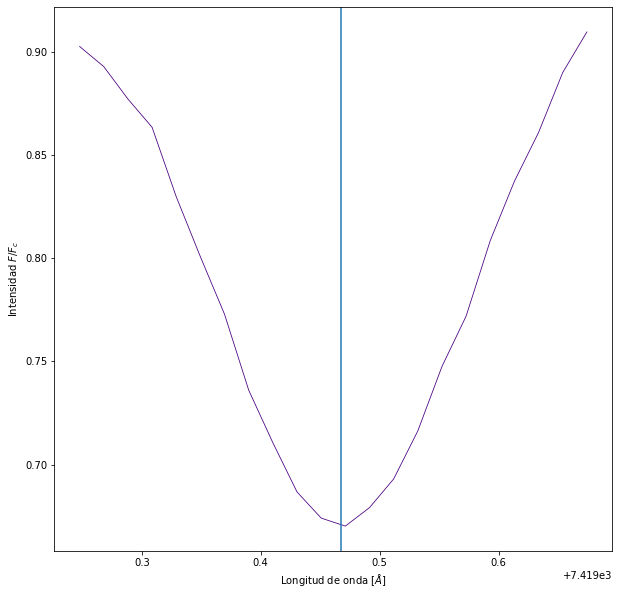

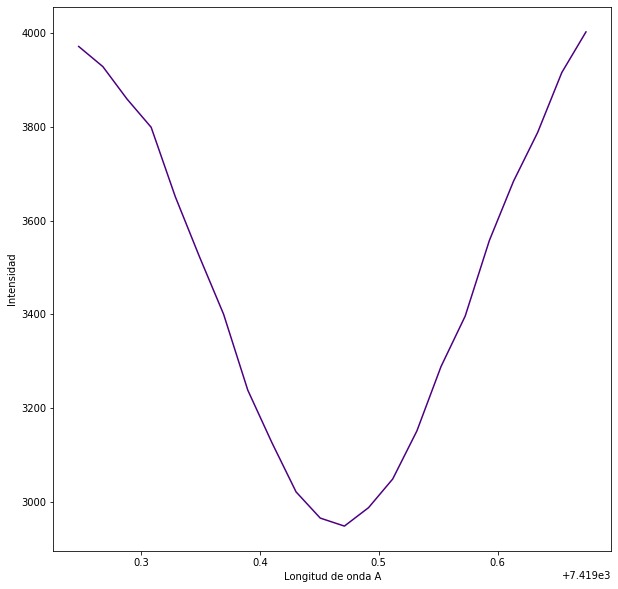

[7419.24772748 7419.26803595 7419.28834442 7419.30865289 7419.32896135
 7419.34926982 7419.36957829 7419.38988676 7419.41019523 7419.4305037
 7419.45081217 7419.47112064 7419.49142911 7419.51173758 7419.53204605
 7419.55235452 7419.57266299 7419.59297145 7419.61327992 7419.63358839
 7419.65389686 7419.67420533]
[0.90248912 0.89273582 0.87703663 0.86334293 0.8297061  0.80062853
 0.77275553 0.73601482 0.71054997 0.6867152  0.67404129 0.67016789
 0.67910466 0.69297916 0.7162407  0.74745428 0.77187549 0.80846908
 0.83719038 0.86083482 0.88985921 0.90953772]
7419.4560274781215 0.9024891233578863
7419.462027478134 0.8927358220639091
7419.466627478143 0.87703663493175
7419.472027478154 0.8633429286229773
7419.468027478146 0.8297061015917954
7419.468927478148 0.8006285253616363
7419.471377478152 0.7727555296979318
7419.467177478144 0.7360148167474545
7419.469027478148 0.7105499727540227
7419.466977478143 0.6867151999265455
7419.466527478143 0.6740412892622273
7419.467527478145 0.67016788851156

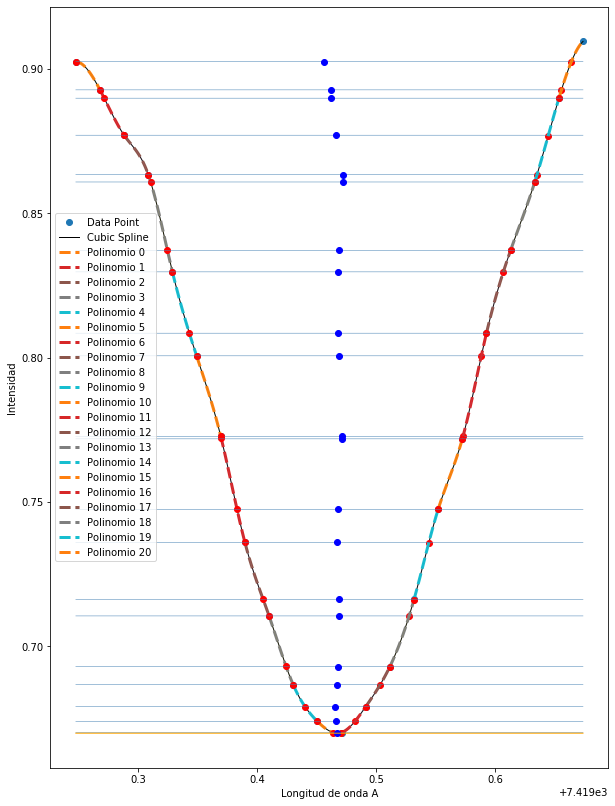

0.6699311335032939


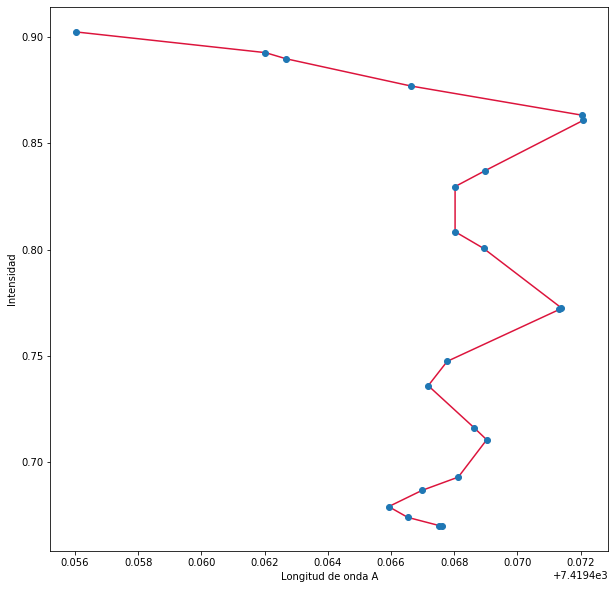

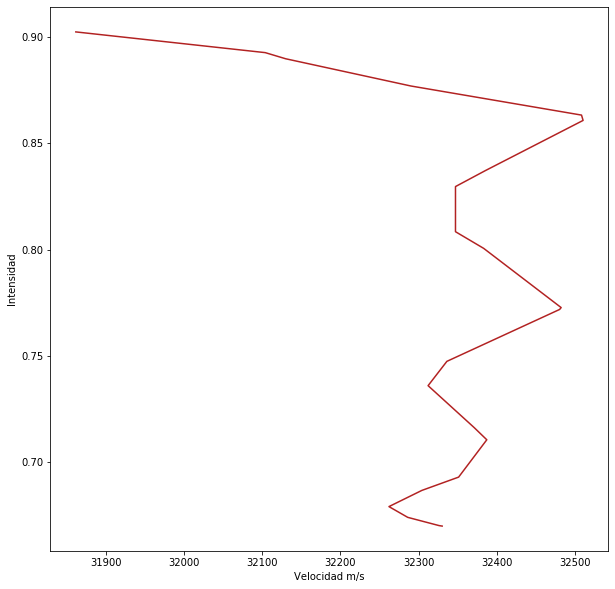

[23446. 24266. 25087. 25907. 26728. 27548. 28369. 29189. 30010. 30830.
 31651. 32471. 33292. 34112. 34933. 35753. 36574. 37394. 38215. 39036.
 39856. 40677.]
[0.90248912 0.89273582 0.87703663 0.86334293 0.8297061  0.80062853
 0.77275553 0.73601482 0.71054997 0.6867152  0.67404129 0.67016789
 0.67910466 0.69297916 0.7162407  0.74745428 0.77187549 0.80846908
 0.83719038 0.86083482 0.88985921 0.90953772]


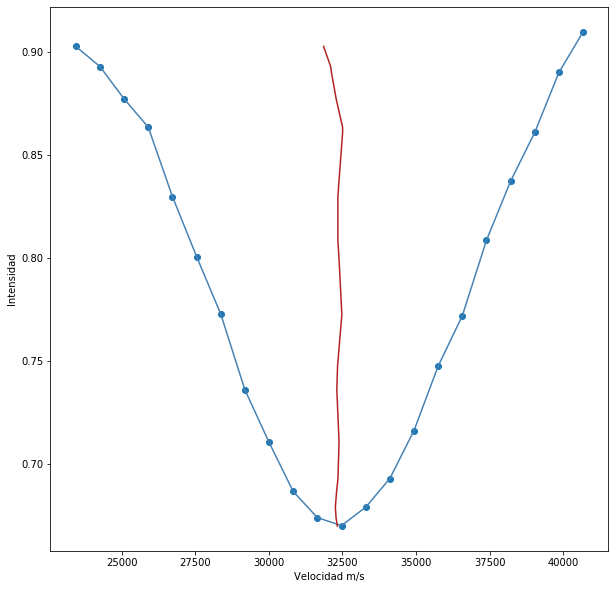

31861.82400171453 0.9024891233578863
32104.07700176388 0.8927358220639091
32291.91550180215 0.87703663493175
32509.441501846464 0.8633429286229773
32347.892501813556 0.8297061015917954
32384.058501820924 0.8006285253616363
32483.29450184114 0.7727555296979318
32313.760501806602 0.7360148167474545
32389.30750182199 0.7105499727540227
32305.929501805003 0.6867151999265455
32289.26250180161 0.6740412892622273
32329.072501809722 0.6701678885115682
32262.853001796226 0.6791046604705228
32351.478501814283 0.6929791557297726
32372.004001818466 0.7162407025385454
32337.8210018115 0.7474542829217727
32482.02200184088 0.7718754943132046
32348.07200181359 0.80846908050675
32386.01950182132 0.8371903773436591
32511.813501846947 0.8608348155921591
32132.868001769748 0.8898592118668636


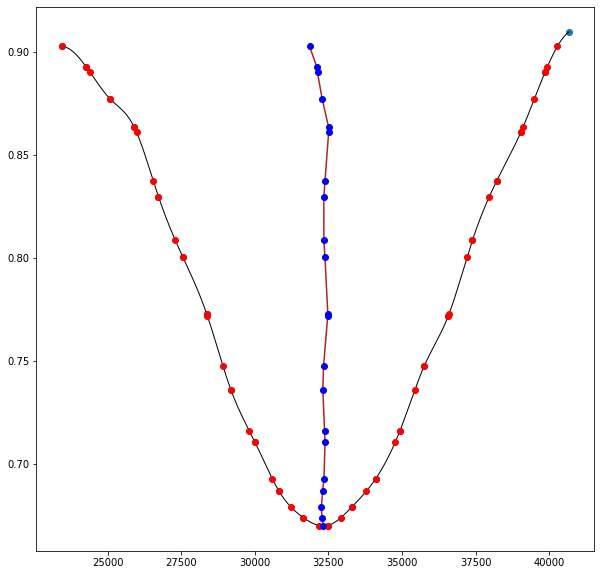

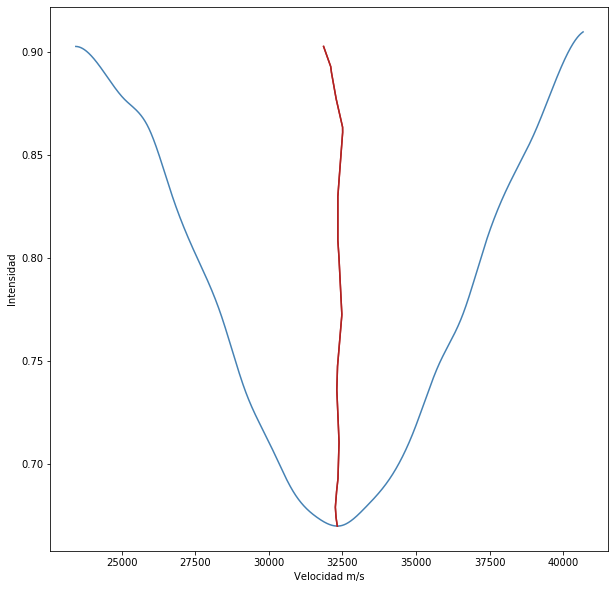

In [8]:
'''# seleccionar datos ----------------------------------------------------------------------------
dataII1 = np.loadtxt('II1.dat')
#Fnorm = datanormI1[:,1]
#datanII1 = preprocessing.normalize(datanormII1)
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanII1 = dataII1/4400

xcoords = [7411.9496]
colors = ['b']

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataII1[:,0], datanII1[:,1], linewidth=0.8, c='indigo')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords, label='Bisector II1')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('II1.png', dpi=720)
plt.show()

dataII1 = np.loadtxt('II1.dat')

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataII1[:,0], dataII1[:,1], linewidth=1.5, c='indigo')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords, label='Bisector II1')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('II1.pdf', dpi=720)
plt.show()'''
#----------------------------------------------------------------------------------

datanormII2 = np.loadtxt('II2.dat')

Fnorm = datanormII2[:,1]

normalizedII2= preprocessing.normalize(datanormII2)

dataII2 = np.loadtxt('II2.dat')
#Fnorm = datanormI1[:,1]
#datanII1 = preprocessing.normalize(datanormII1)
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanII2 = dataII2/4400

xcoords = [7419.4676]
colors = ['b']

fig = plt.figure(figsize = (10, 10))
plt.plot(dataII2[:,0], datanII2[:,1], linewidth=0.8, c='indigo')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords, label='Bisector II1')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('II2.png', dpi=240)
plt.show()

dataII2 = np.loadtxt('II2.dat')

fig = plt.figure(figsize = (10, 10))
plt.plot(dataII2[:,0], dataII2[:,1], linewidth=1.5, c='indigo')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('II2.pdf', dpi=240)
plt.show()


###############################################################################################
###################Construccion del bisector ###################################################
#-----------------------------------------------------------------------------------------------
# seleccionar datos ----------------------------------------------------------------------------
dataII2 = np.loadtxt('II2.dat')
#Fnorm = datanormII2[:,1]
#datanII2 = preprocessing.normalize(datanormII2)
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanII2 = dataII2/4400

# Seleccionar coordenandas ---------------------------------------------------------------------
x = dataII2[:,0]
y = datanII2[:,1]

print(x)
print(y)

# Cubic Spline regresion -----------------------------------------------------------------------
s = interpolate.CubicSpline(x, y)

arr = np.arange(np.amin(x), np.amax(x), 0.0001)
s = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 14)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)


#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(x.shape[0] - 1):
    segment_x = np.linspace(x[i], x[i + 1], 100)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    
    plt.plot(segment_x, segment_y, label='Polinomio {}'.format(i), ls='--', lw=3)
    @np.vectorize
    def constant_function1(x):
        return datanII2[i,1]
    delta_x1 = np.arange(dataII2[0,0], dataII2[21,0], 0.0001)
    
    idx = np.argwhere(np.diff(np.sign(s(arr)-constant_function1(i))) != 0).reshape(-1)+0
    
        
    plt.plot(arr[idx], s(arr)[idx], 'ro')
    plt.plot(delta_x1, constant_function1(delta_x1), linewidth=0.5, c='steelblue')
    plt.plot()
    #print(arr[idx])
    bisector = (arr[idx][0]+arr[idx][1])/2
    #print(bisector)
    plt.plot(bisector, constant_function1(bisector), 'bo')
    print(bisector, constant_function1(bisector))
    plt.plot(segment_x, segment_y, ls='-', lw=0.1)
#for j in range(18):
   # print(arr[idx][j+1], arr[idx][j])
    
@np.vectorize
def constant_functionmini(x):
    return min(s(arr))

delta_xm = np.arange(dataII2[0,0], dataII2[21,0], 0.0001)
plt.plot(delta_xm, constant_functionmini(delta_xm), linewidth=1.0, c='orange')

#print(constant_functionmini)
    
idmin = np.argwhere(np.diff(np.sign(s(arr)-constant_functionmini(delta_xm))) != 0).reshape(-1)+0

plt.plot(arr[idmin], s(arr)[idmin], 'crimson')
print('minimos')
print(arr[idmin])
print(s(arr)[idmin])

plt.legend()
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('BisectorII2b.png', dpi=240)
plt.show()

print(min(s(arr)))

#########################################################################################
#Transformar a velocidad el espectro de cada liena de absorcion ------------------------------
from seaborn import load_dataset

# seleccionar datos ----------------------------------------------------------------------------
BisecII2 = np.loadtxt('BisecII2.dat')

xb = BisecII2[:,0]
yb = BisecII2[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'crimson')
plt.plot(xb, yb, 'o', label='Data Point')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorII2.png', dpi=480)
plt.show()

#Manipulacion datos
data = np.genfromtxt('II2.dat')
data = ((data-7418.6674)/7418.6674)*299729458
np.savetxt("II2v.dat", data, fmt='%d')

#Transformar a velocidades
#Construccion del bisector
#-----------------------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np

data = np.genfromtxt('BisecII2.dat')
data = ((data-7418.6674)/7418.6674)*299729458
np.savetxt("BisecII2v.dat", data, fmt='%d')

BisecII2v = np.loadtxt('BisecII2v.dat')

xb = BisecII2v[:,0]
yb = BisecII2[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorII2v.png', dpi=240)
plt.show()

############################################
# seleccionar datos ----------------------------------------------------------------------------
dataII2v = np.genfromtxt('II2v.dat')

# Seleccionar coordenandas ---------------------------------------------------------------------
#x = dataI1[:,0]
x = dataII2v[:,0]
y = datanII2[:,1]

print(x)
print(y)

fig = plt.figure(figsize = (10, 10)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(x, y, 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorII2v1.png', dpi=240)
plt.show()

arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

#fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize = (10, 10)) 
#ax.hold(True)
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arrv, sv(arrv), 'k-', label='Cubic Spline', lw=1)
plt.plot(xb, yb, 'firebrick')

#print(datavI1[0,0])
#print(datavI1[20,0])

#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(21):
    
    def constant_functionv1(x):
        return datanII2[i,1]
    delta_xv1 = np.arange(dataII2v[0,0], dataII2v[21,0], 0.001)
    
    idxv = np.argwhere(np.diff(np.sign(sv(arrv)-constant_functionv1(i))) != 0).reshape(-1)+0
            
    plt.plot(arrv[idxv], sv(arrv)[idxv], 'ro')
    #plt.plot(delta_xv1, constant_functionv1(delta_xv1), linewidth=0.5, c='orange')
    plt.plot()
    #print(arr[idx])
    bisectorv = (arrv[idxv][0]+arrv[idxv][1])/2
    #print(bisector)
    plt.plot(bisectorv, constant_functionv1(bisectorv), 'bo')
    print(bisectorv, constant_functionv1(bisectorv))

#-------------------------------------------------------------------------------    
arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 10)) 
#plt.plot(x, y, 'steelblue')
plt.plot(arrv, sv(arrv), 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorII2vs.png', dpi=240)
plt.show()

####################################################################################
####################################################################################

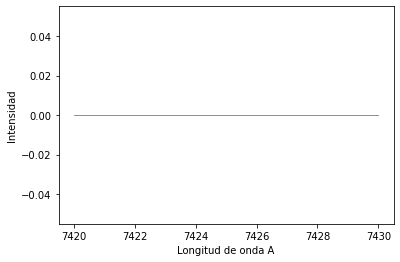

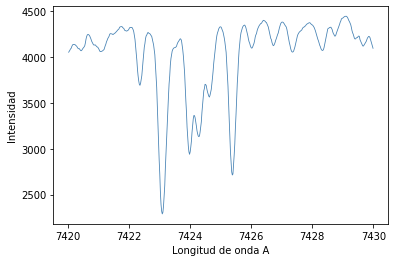

In [9]:
#------------------------------------------------------------------------------------------
datafeIII = np.loadtxt('FeI-III.dat')

plt.figure()
plt.plot(datafeIII[:,0], datafeIII[:,1], linewidth=0.8, c='steelblue')
#plt.scatter(datafe[:,1], datafe[:,0], marker = 'o', s = 20, c='r')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('FeI-III.png', dpi=240)
plt.show()

datahdIII = np.loadtxt('hd190421-III.dat')

plt.figure()
plt.plot(datahdIII[:,0], datahdIII[:,1], linewidth=0.8, c='steelblue')
#plt.scatter(datahd2[:,0], datahd2[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('HD190421-III.png', dpi=240)
plt.show()


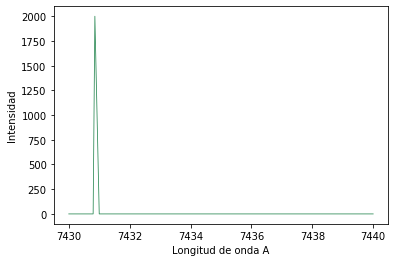

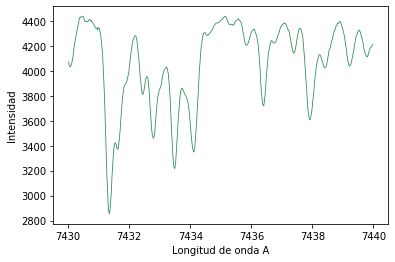

In [10]:
#------------------------------------------------------------------------------------------
datafeIV = np.loadtxt('FeI-IV.dat')

plt.figure()
plt.plot(datafeIV[:,0], datafeIV[:,1], linewidth=0.8, c='seagreen')
#plt.scatter(datafe[:,1], datafe[:,0], marker = 'o', s = 20, c='r')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('FeI-IV.png', dpi=240)
plt.show()

datahdIV = np.loadtxt('hd190421-IV.dat')

plt.figure()
plt.plot(datahdIV[:,0], datahdIV[:,1], linewidth=0.8, c='seagreen')
#plt.scatter(datahd2[:,0], datahd2[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('HD190421-IV.png', dpi=240)
plt.show()

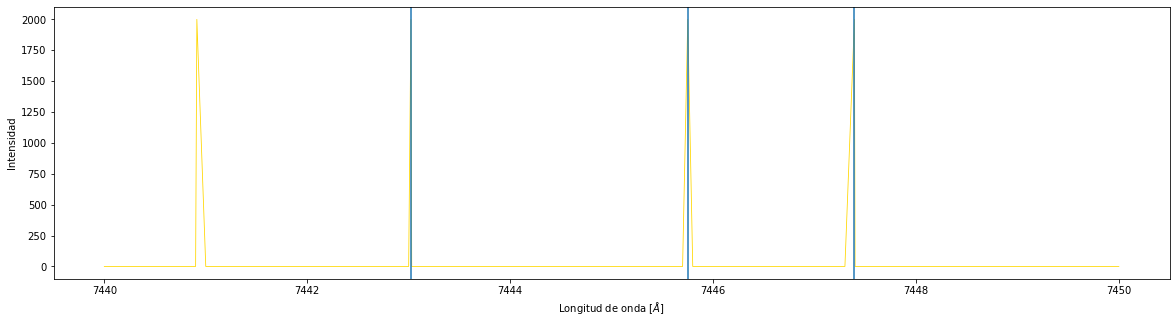

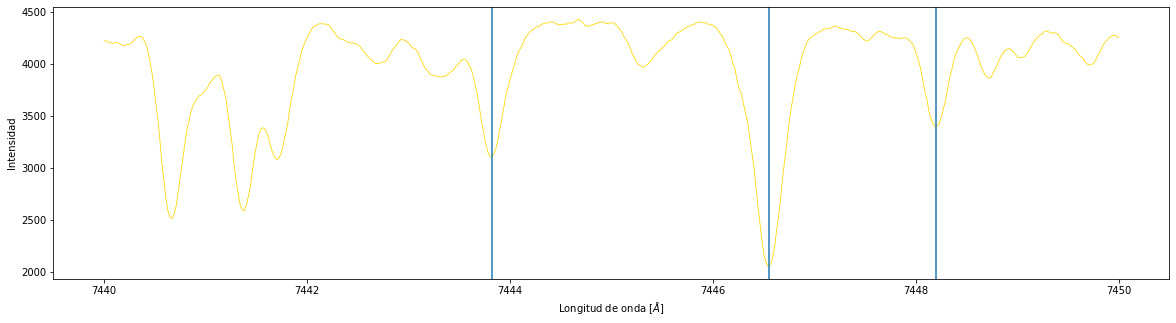

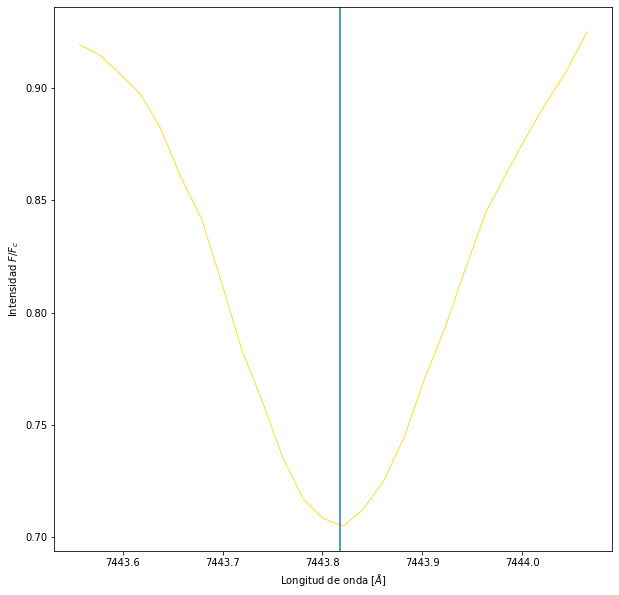

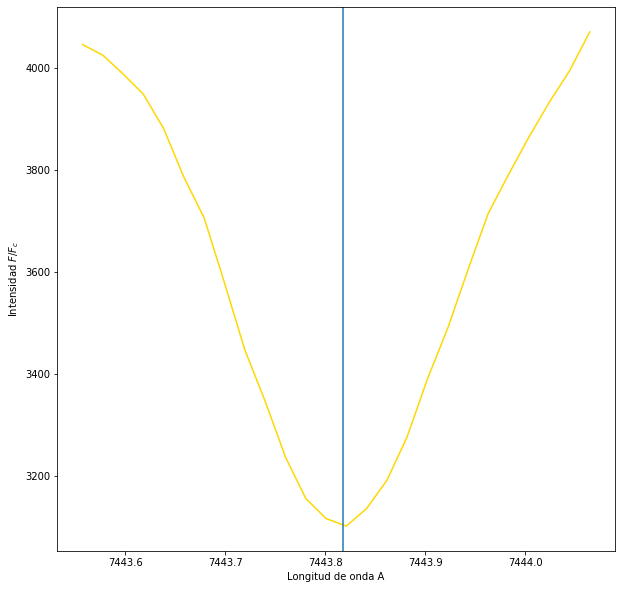

[7443.55696516 7443.57727362 7443.59758209 7443.61789056 7443.63819903
 7443.6585075  7443.67881597 7443.69912444 7443.71943291 7443.73974138
 7443.76004985 7443.78035832 7443.80066679 7443.82097526 7443.84128372
 7443.86159219 7443.88190066 7443.90220913 7443.9225176  7443.94282607
 7443.96313454 7443.98344301 7444.00375148 7444.02405995 7444.04436842
 7444.06467689]
[0.91938299 0.91465988 0.90626533 0.89727605 0.88194322 0.86028165
 0.84211578 0.81323502 0.78347714 0.76065556 0.73583503 0.71736672
 0.7084149  0.70502135 0.71280711 0.72532584 0.74475406 0.77050902
 0.79309863 0.81918522 0.84429737 0.86153584 0.8781719  0.89360097
 0.90759906 0.92499812]
7443.8079151556085 0.9193829872642955
7443.815365155623 0.9146598771524318
7443.820015155632 0.9062653314640455
7443.823615155639 0.8972760479562955
7443.82331515564 0.8819432213208637
7443.820115155633 0.8602816491384773
7443.819915155633 0.8421157832386817
7443.81871515563 0.8132350157033181
7443.8165651556255 0.7834771350613409
7443

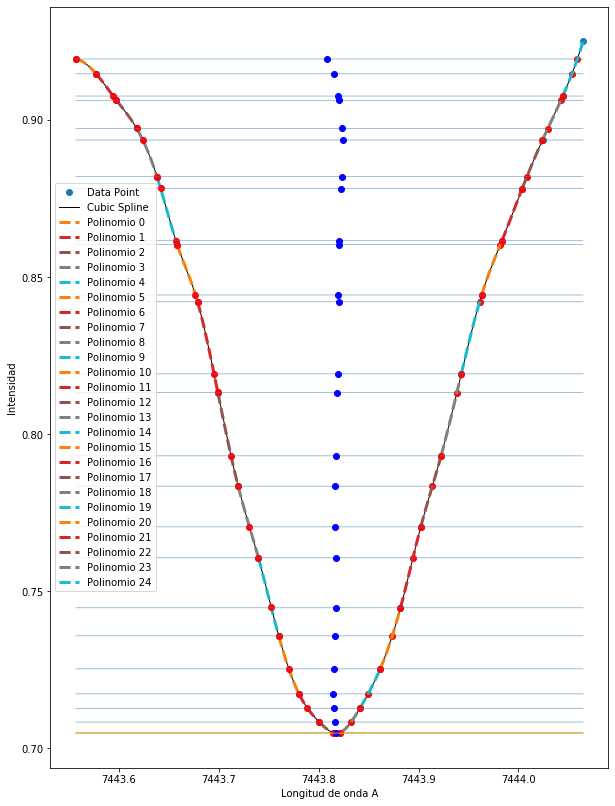

0.7048626659841252


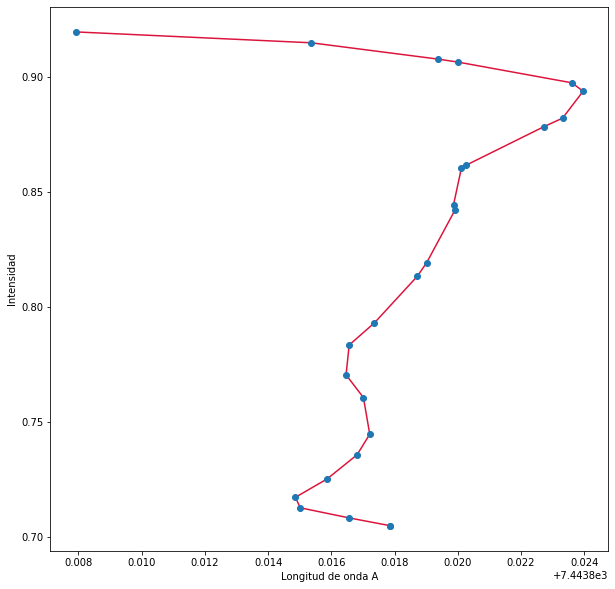

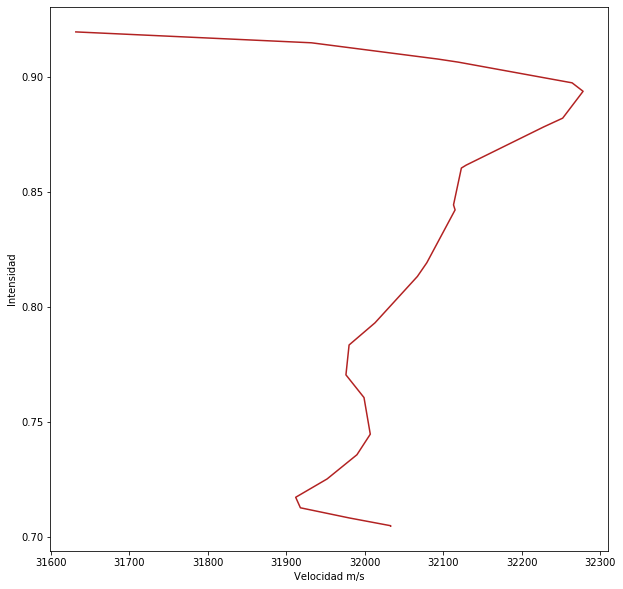

[21526. 22344. 23162. 23980. 24798. 25615. 26433. 27251. 28069. 28887.
 29705. 30522. 31340. 32158. 32976. 33794. 34611. 35429. 36247. 37065.
 37883. 38701. 39518. 40336. 41154. 41972.]
[0.91938299 0.91465988 0.90626533 0.89727605 0.88194322 0.86028165
 0.84211578 0.81323502 0.78347714 0.76065556 0.73583503 0.71736672
 0.7084149  0.70502135 0.71280711 0.72532584 0.74475406 0.77050902
 0.79309863 0.81918522 0.84429737 0.86153584 0.8781719  0.89360097
 0.90759906 0.92499812]


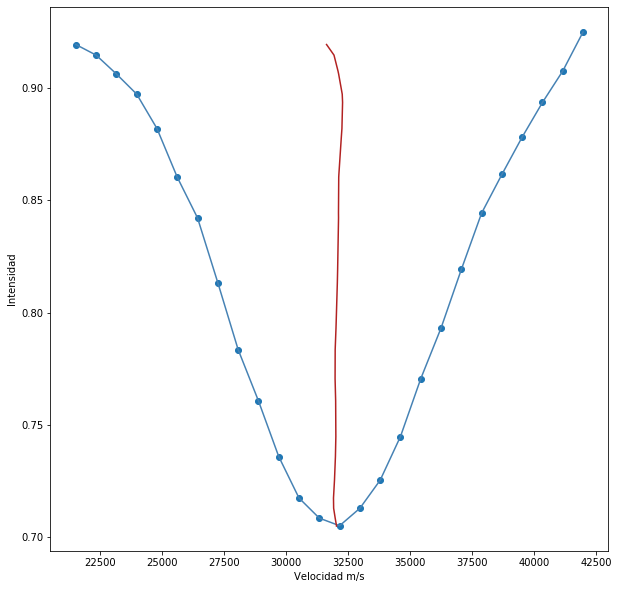

31633.20800205911 0.9193829872642955
31933.20850212023 0.9146598771524318
32120.542502158394 0.9062653314640455
32265.28950218788 0.8972760479562955
32252.896002185356 0.8819432213208637
32125.89700215948 0.8602816491384773
32116.570502157585 0.8421157832386817
32068.632002147817 0.8132350157033181
31983.00500213037 0.7834771350613409
32000.829002134 0.7606555643386137
31992.72900213235 0.7358350305328409
31914.489502116412 0.7173667199728864
31980.87050212994 0.7084148959950682
32034.521002140867 0.70502134752825
31919.135002117357 0.7128071096012273
31953.768502124414 0.7253258443580001
32009.22050213571 0.7447540593738182
31977.7650021293 0.7705090203613637
32014.822502136853 0.793098630251159
32081.691002150474 0.8191852162150909
32116.616002157592 0.8442973668634545


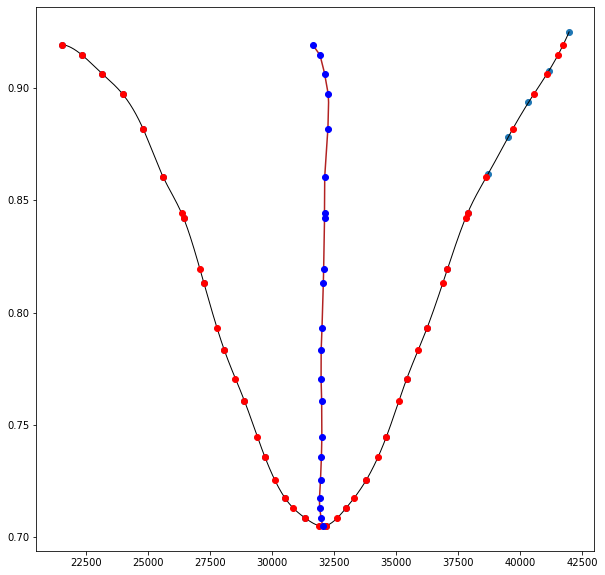

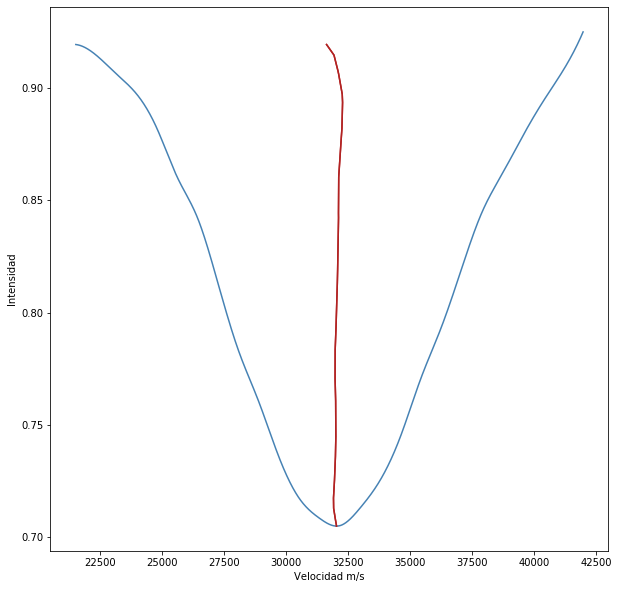

In [11]:
'''datafeII = np.loadtxt('FeI-II.dat')
xcoords1 = [7411.1544]
colors = ['b']
xcoords2 = [7418.6674]
colors = ['b']
fig = plt.figure(figsize = (20, 5)) 
plt.plot(datafeII[:,0], datafeII[:,1], linewidth=0.8, c='indigo')
#plt.scatter(datafe[:,1], datafe[:,0], marker = 'o', s = 20, c='r')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.axvline(xcoords2, label='Bisector II2')
plt.ylabel('Intensidad')
plt.savefig('FeI-II.png', dpi=720)
plt.show()

datahdII = np.loadtxt('hd190421-II.dat')
xcoords1 = [7411.9496]
colors = ['b']
xcoords2 = [7419.4676]
colors = ['b']
fig = plt.figure(figsize = (20, 5)) 
plt.plot(datahdII[:,0], datahdII[:,1], linewidth=0.8, c='indigo')
#plt.scatter(datahd2[:,0], datahd2[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.axvline(xcoords2, label='Bisector II2')
plt.ylabel('Intensidad')
plt.savefig('HD190421-II.png', dpi=720)
plt.show()'''
#------------------------------------------------------------------------------------------
datafeV = np.loadtxt('FeI-V.dat')
xcoords1 = [7443.0224]
colors = ['b']
xcoords2 = [7445.7508]
colors = ['b']
xcoords3 = [7447.3938]
colors = ['b']
fig = plt.figure(figsize = (20, 5))
plt.plot(datafeV[:,0], datafeV[:,1], linewidth=0.8, c='gold')
#plt.scatter(datafe[:,1], datafe[:,0], marker = 'o', s = 20, c='r')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.axvline(xcoords2, label='Bisector II2')
plt.axvline(xcoords3, label='Bisector II3')
plt.ylabel('Intensidad')
plt.savefig('FeI-V.png', dpi=240)
plt.show()

dataV = np.loadtxt('hd190421-V.dat')
datanV = dataV/4400
xcoords1 = [7443.8179]
colors = ['b']
xcoords2 = [7446.5456]
colors = ['b']
xcoords3 = [7448.1908]
colors = ['b']
fig = plt.figure(figsize = (20, 5))
plt.plot(dataV[:,0], dataV[:,1], linewidth=0.8, c='gold')
#plt.scatter(datahd2[:,0], datahd2[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.axvline(xcoords2, label='Bisector II2')
plt.axvline(xcoords3, label='Bisector II3')
plt.ylabel('Intensidad')
plt.savefig('HD190421-V.png', dpi=240)
plt.show()

#----------------------------------------------------------------------------------

dataV1 = np.loadtxt('V1.dat')
datanV1 = dataV1/4400

#Fnorm = datanormV1[:,1]

#normalizedV1= preprocessing.normalize(datanormV1)
#print(Fnorm)
#print(normalized)

xcoords1 = [7443.8179]
colors = ['b']
fig = plt.figure(figsize = (10, 10))
plt.plot(dataV1[:,0], datanV1[:,1], linewidth=0.8, c='gold')
plt.axvline(xcoords1, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('V1.png', dpi=240)
plt.show()

dataV1 = np.loadtxt('V1.dat')

fig = plt.figure(figsize = (10, 10))
plt.plot(dataV1[:,0], dataV1[:,1], linewidth=1.5, c='gold')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.axvline(xcoords1, label='Bisector II1')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('V1.pdf', dpi=240)
plt.show()




###############################################################################################
###################Construccion del bisector ###################################################
#-----------------------------------------------------------------------------------------------
# seleccionar datos ----------------------------------------------------------------------------
dataV1 = np.loadtxt('V1.dat')
#Fnorm = datanormV1[:,1]
#datanV1 = preprocessing.normalize(datanormV1)
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanV1 = dataV1/4400

# Seleccionar coordenandas ---------------------------------------------------------------------
x = dataV1[:,0]
y = datanV1[:,1]

print(x)
print(y)

# Cubic Spline regresion -----------------------------------------------------------------------
s = interpolate.CubicSpline(x, y)

arr = np.arange(np.amin(x), np.amax(x), 0.0001)
s = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 14)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)


#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(x.shape[0] - 1):
    segment_x = np.linspace(x[i], x[i + 1], 100)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    
    plt.plot(segment_x, segment_y, label='Polinomio {}'.format(i), ls='--', lw=3)
    @np.vectorize
    def constant_function1(x):
        return datanV1[i,1]
    delta_x1 = np.arange(dataV1[0,0], dataV1[25,0], 0.0001)
    
    idx = np.argwhere(np.diff(np.sign(s(arr)-constant_function1(i))) != 0).reshape(-1)+0
    
        
    plt.plot(arr[idx], s(arr)[idx], 'ro')
    plt.plot(delta_x1, constant_function1(delta_x1), linewidth=0.5, c='steelblue')
    plt.plot()
    #print(arr[idx])
    bisector = (arr[idx][0]+arr[idx][1])/2
    #print(bisector)
    plt.plot(bisector, constant_function1(bisector), 'bo')
    print(bisector, constant_function1(bisector))
    plt.plot(segment_x, segment_y, ls='-', lw=0.1)
#for j in range(18):
   # print(arr[idx][j+1], arr[idx][j])
    
@np.vectorize
def constant_functionmini(x):
    return min(s(arr))

delta_xm = np.arange(dataV1[0,0], dataV1[25,0], 0.0001)
plt.plot(delta_xm, constant_functionmini(delta_xm), linewidth=1.0, c='orange')

#print(constant_functionmini)
    
idmin = np.argwhere(np.diff(np.sign(s(arr)-constant_functionmini(delta_xm))) != 0).reshape(-1)+0

plt.plot(arr[idmin], s(arr)[idmin], 'crimson')
print('minimos')
print(arr[idmin])
print(s(arr)[idmin])

plt.legend()
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('BisectorV1.png', dpi=240)
plt.show()

print(min(s(arr)))

#########################################################################################
#Transformar a velocidad el espectro de cada liena de absorcion ------------------------------
from seaborn import load_dataset

# seleccionar datos ----------------------------------------------------------------------------
BisecV1 = np.loadtxt('BisecV1.dat')

xb = BisecV1[:,0]
yb = BisecV1[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'crimson')
plt.plot(xb, yb, 'o', label='Data Point')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorV1.png', dpi=240)
plt.show()

#Manipulacion datos
data = np.genfromtxt('V1.dat')
data = ((data-7443.0224)/7443.0224)*299729458
np.savetxt("V1v.dat", data, fmt='%d')

#Transformar a velocidades
#Construccion del bisector
#-----------------------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np

data = np.genfromtxt('BisecV1.dat')
data = ((data-7443.0224)/7443.0224)*299729458
np.savetxt("BisecV1v.dat", data, fmt='%d')

BisecV1v = np.loadtxt('BisecV1v.dat')

xb = BisecV1v[:,0]
yb = BisecV1[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorV1v.png', dpi=240)
plt.show()

############################################
# seleccionar datos ----------------------------------------------------------------------------
dataV1v = np.genfromtxt('V1v.dat')

# Seleccionar coordenandas ---------------------------------------------------------------------
#x = dataI1[:,0]
x = dataV1v[:,0]
y = datanV1[:,1]

print(x)
print(y)

fig = plt.figure(figsize = (10, 10)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(x, y, 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorV1v1.png', dpi=240)
plt.show()

arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

#fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize = (10, 10)) 
#ax.hold(True)
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arrv, sv(arrv), 'k-', label='Cubic Spline', lw=1)
plt.plot(xb, yb, 'firebrick')

#print(datavI1[0,0])
#print(datavI1[20,0])

#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(21):
    
    def constant_functionv1(x):
        return datanV1[i,1]
    delta_xv1 = np.arange(dataV1v[0,0], dataV1v[21,0], 0.001)
    
    idxv = np.argwhere(np.diff(np.sign(sv(arrv)-constant_functionv1(i))) != 0).reshape(-1)+0
            
    plt.plot(arrv[idxv], sv(arrv)[idxv], 'ro')
    #plt.plot(delta_xv1, constant_functionv1(delta_xv1), linewidth=0.5, c='orange')
    plt.plot()
    #print(arr[idx])
    bisectorv = (arrv[idxv][0]+arrv[idxv][1])/2
    #print(bisector)
    plt.plot(bisectorv, constant_functionv1(bisectorv), 'bo')
    print(bisectorv, constant_functionv1(bisectorv))

#-------------------------------------------------------------------------------    
arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 10)) 
#plt.plot(x, y, 'steelblue')
plt.plot(arrv, sv(arrv), 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorV1vs.png', dpi=240)
plt.show()

####################################################################################
####################################################################################

#----------------------------------------------------------------------------------



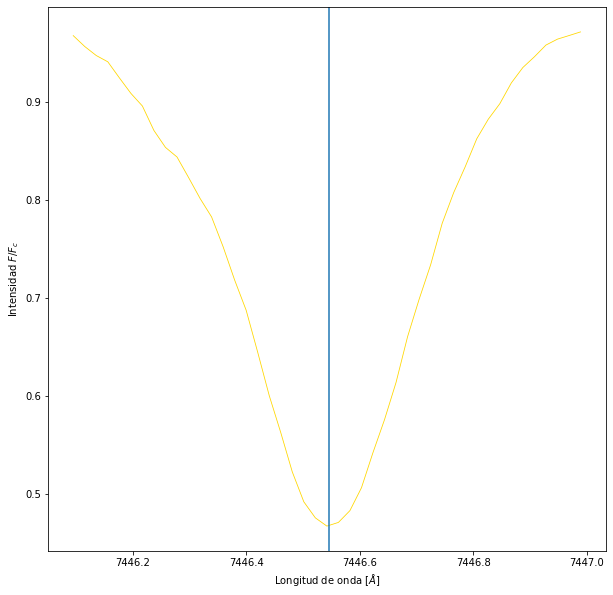

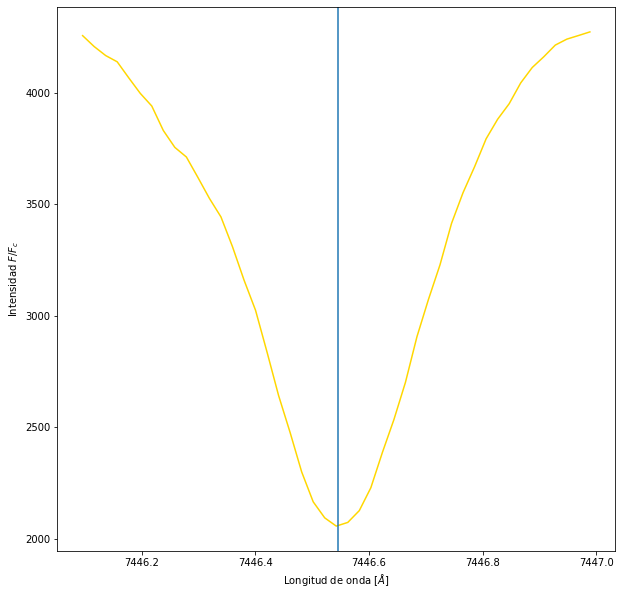

[7446.09552381 7446.11583228 7446.13614075 7446.15644922 7446.17675769
 7446.19706616 7446.21737463 7446.23768309 7446.25799156 7446.27830003
 7446.2986085  7446.31891697 7446.33922544 7446.35953391 7446.37984238
 7446.40015085 7446.42045932 7446.44076779 7446.46107626 7446.48138473
 7446.50169319 7446.52200166 7446.54231013 7446.5626186  7446.58292707
 7446.60323554 7446.62354401 7446.64385248 7446.66416095 7446.68446942
 7446.70477789 7446.72508636 7446.74539483 7446.76570329 7446.78601176
 7446.80632023 7446.8266287  7446.84693717 7446.86724564 7446.88755411
 7446.90786258 7446.92817105 7446.94847952 7446.96878799 7446.98909646]
[0.96755771 0.95644308 0.94723842 0.94085605 0.92453042 0.90867799
 0.89573964 0.87079049 0.85355102 0.84376904 0.82291612 0.80151722
 0.78260684 0.75223916 0.71822696 0.68738641 0.64459004 0.60037494
 0.56263864 0.52253743 0.49202073 0.47564776 0.46724589 0.47098631
 0.48302967 0.50635164 0.54228142 0.57582453 0.61379272 0.6604359
 0.69855174 0.73379191 0.7

/home/juan/anaconda3/envs/lens3/lib/python3.7/site-packages/ipykernel_launcher.py:142: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/juan/anaconda3/envs/lens3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


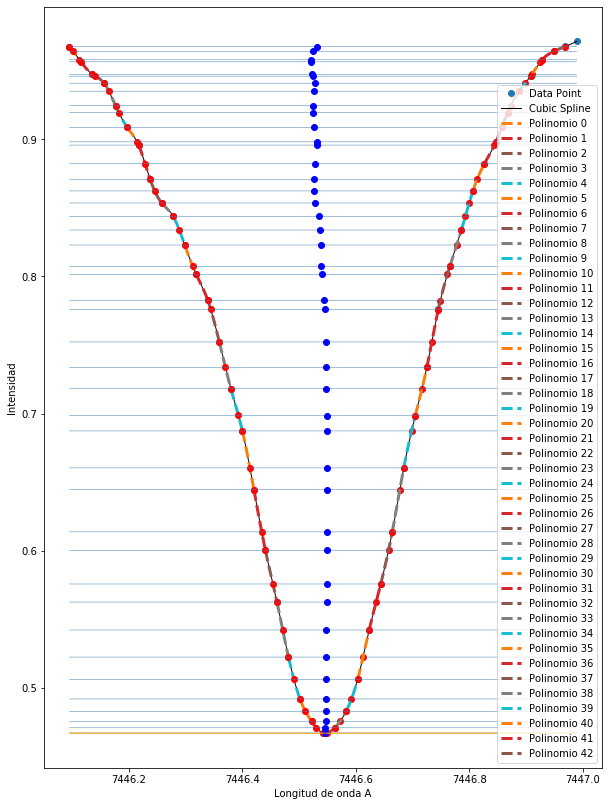

0.4670407803961533
0.46724589323075005
2055.8819302153


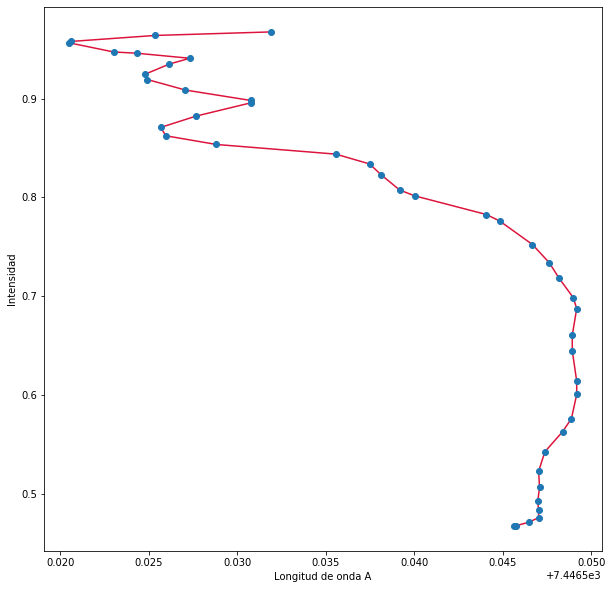

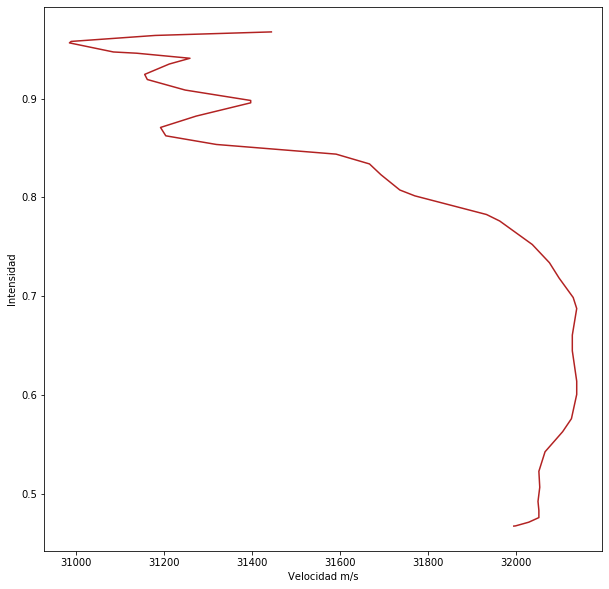

[13876. 14694. 15511. 16329. 17146. 17964. 18782. 19599. 20417. 21234.
 22052. 22869. 23687. 24504. 25322. 26139. 26957. 27774. 28592. 29409.
 30227. 31044. 31862. 32679. 33497. 34314. 35132. 35949. 36767. 37584.
 38402. 39219. 40037. 40855. 41672. 42490. 43307. 44125. 44942. 45760.
 46577. 47395. 48212. 49030. 49847.]
[0.96755771 0.95644308 0.94723842 0.94085605 0.92453042 0.90867799
 0.89573964 0.87079049 0.85355102 0.84376904 0.82291612 0.80151722
 0.78260684 0.75223916 0.71822696 0.68738641 0.64459004 0.60037494
 0.56263864 0.52253743 0.49202073 0.47564776 0.46724589 0.47098631
 0.48302967 0.50635164 0.54228142 0.57582453 0.61379272 0.6604359
 0.69855174 0.73379191 0.77602539 0.80743401 0.83384009 0.86232836
 0.88228767 0.8981107  0.91933775 0.93504433 0.94597958 0.95792353
 0.96398131 0.96762557 0.97135911]


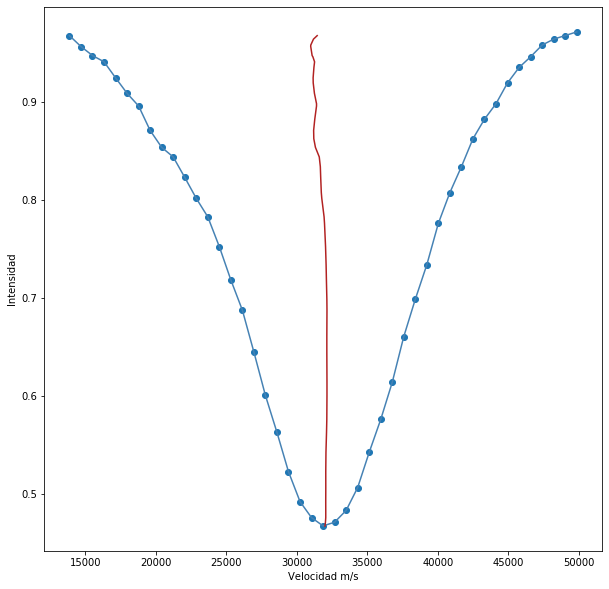

31445.018503579282 0.9675577119328864
30985.258003485615 0.956443076439
31086.814003506304 0.9472384170663865
31260.810503541754 0.9408560490192954
31157.72400352075 0.9245304189053636
31250.50700353965 0.9086779863893636
31399.979503570103 0.8957396420142955
31194.260003528194 0.8707904905323637
31321.142003554043 0.8535510204524092
31592.747503609375 0.8437690353704319
31696.469003630504 0.8229161163421818
31773.374003646175 0.801517221726341
31934.89400367908 0.782606835450591
32039.36500370036 0.7522391560651136
32099.257003712562 0.7182269600651818
32139.742503720816 0.6873864106211136
32130.132503718858 0.6445900421630909
32138.92050372065 0.6003749351170682
32107.402503714227 0.5626386422624773
32052.633003703064 0.5225374315676136
32051.22550370278 0.4920207315328181
32054.89050370353 0.47564776134045456
32000.576003692462 0.46724589323075005
32032.340003698933 0.47098630980868184
32053.58200370326 0.48302966915438633
32053.68000370328 0.5063516351384773
32067.57350370611 0.542

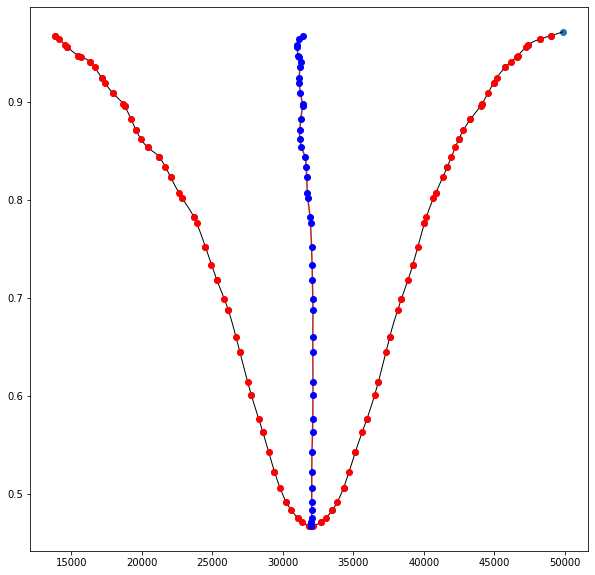

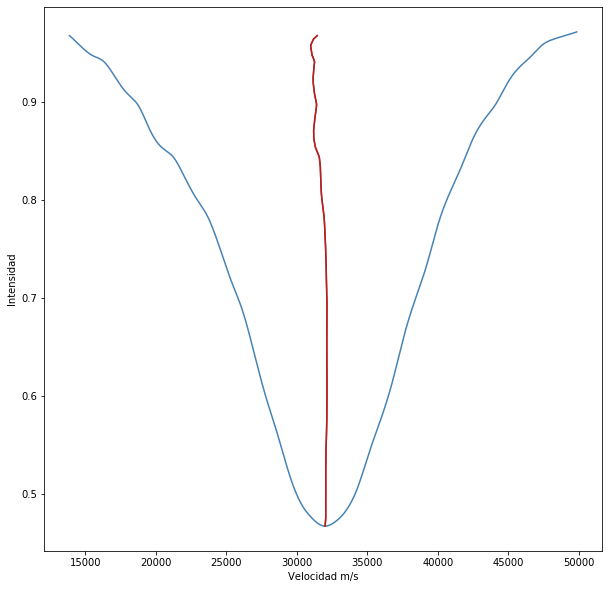

In [12]:
'''dataV1 = np.loadtxt('V1.dat')
datanV1 = dataV1/4400

Fnorm = datanormV1[:,1]

normalizedV1= preprocessing.normalize(datanormV1)
#print(Fnorm)
#print(normalized)

fig = plt.figure(figsize = (10, 10))
plt.plot(dataV1[:,0], datanV1[:,1], linewidth=0.8, c='gold')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('V1.png', dpi=720)
plt.show()

dataV1 = np.loadtxt('V1.dat')

fig = plt.figure(figsize = (10, 10))
plt.plot(dataV1[:,0], dataV1[:,1], linewidth=1.5, c='gold')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('V1.pdf', dpi=720)
plt.show()
xcoords1 = [7443.8179]
colors = ['b']
fig = plt.figure(figsize = (10, 10))
plt.plot(dataV1[:,0], datanV1[:,1], linewidth=0.8, c='gold')
plt.axvline(xcoords1, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('V1.png', dpi=720)
plt.show()
'''

dataV2 = np.loadtxt('V2.dat')
datanV2 = dataV2/4400

#normalizedV2= preprocessing.normalize(datanormV2)
#print(Fnorm)
#print(normalized)

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataV2[:,0], datanV2[:,1], linewidth=0.8, c='gold')
plt.axvline(xcoords2, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('V2.png', dpi=240)
plt.show()

dataV2 = np.loadtxt('V2.dat')

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataV2[:,0], dataV2[:,1], linewidth=1.5, c='gold')
plt.axvline(xcoords2, label='Bisector II1')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('V2.pdf', dpi=240)
plt.show()

###############################################################################################
###################Construccion del bisector ###################################################
#-----------------------------------------------------------------------------------------------
# seleccionar datos ----------------------------------------------------------------------------
dataV2 = np.loadtxt('V2.dat')
#Fnorm = datanormV2[:,1]
#datanV2 = preprocessing.normalize(datanormV2)
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanV2 = dataV2/4400

# Seleccionar coordenandas ---------------------------------------------------------------------
x = dataV2[:,0]
y = datanV2[:,1]

print(x)
print(y)
print(x.shape[0])

# Cubic Spline regresion -----------------------------------------------------------------------
s = interpolate.CubicSpline(x, y)

arr = np.arange(np.amin(x), np.amax(x), 0.0001)
s = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 14)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)


#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(43):
    segment_x = np.linspace(x[i], x[i + 1], 100)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    
    plt.plot(segment_x, segment_y, label='Polinomio {}'.format(i), ls='--', lw=3)
    @np.vectorize
    def constant_function1(x):
        return datanV2[i,1]
    delta_x1 = np.arange(dataV2[0,0], dataV2[44,0], 0.0001)
    
    idx = np.argwhere(np.diff(np.sign(s(arr)-constant_function1(i))) != 0).reshape(-1)+0
    
        
    plt.plot(arr[idx], s(arr)[idx], 'ro')
    plt.plot(delta_x1, constant_function1(delta_x1), linewidth=0.5, c='steelblue')
    plt.plot()
    #print(arr[idx][0])
    #print(arr[idx][1])
    bisector = (arr[idx][0]+arr[idx][1])/2
    #print(bisector)
    plt.plot(bisector, constant_function1(bisector), 'bo')
    print(bisector, constant_function1(bisector))
    plt.plot(segment_x, segment_y, ls='-', lw=0.1)
#for j in range(18):
   # print(arr[idx][j+1], arr[idx][j])
    
@np.vectorize
def constant_functionmini(x):
    return min(s(arr))

delta_xm = np.arange(dataV2[0,0], dataV2[44,0], 0.0001)
plt.plot(delta_xm, constant_functionmini(delta_xm), linewidth=1.0, c='orange')

#print(constant_functionmini)
    
idmin = np.argwhere(np.diff(np.sign(s(arr)-constant_functionmini(delta_xm))) != 0).reshape(-1)+0

plt.plot(arr[idmin], s(arr)[idmin], 'crimson')
print('minimos')
print(arr[idmin])
print(s(arr)[idmin])

plt.legend()
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('BisectorV2.png', dpi=240)
plt.show()

print(min(s(arr)))
print(min(y))
print(min(dataV2[:,1]))

#########################################################################################
#Transformar a velocidad el espectro de cada liena de absorcion ------------------------------
from seaborn import load_dataset

# seleccionar datos ----------------------------------------------------------------------------
BisecV2 = np.loadtxt('BisecV2.dat')

xb = BisecV2[:,0]
yb = BisecV2[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'crimson')
plt.plot(xb, yb, 'o', label='Data Point')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorV2.png', dpi=240)
plt.show()

#Manipulacion datos
data = np.genfromtxt('V2.dat')
data = ((data-7445.7508)/7445.7508)*299729458
np.savetxt("V2v.dat", data, fmt='%d')

#Transformar a velocidades
#Construccion del bisector
#-----------------------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np

data = np.genfromtxt('BisecV2.dat')
data = ((data-7445.7508)/7445.7508)*299729458
np.savetxt("BisecV2v.dat", data, fmt='%d')

BisecV2v = np.loadtxt('BisecV2v.dat')

xb = BisecV2v[:,0]
yb = BisecV2[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorV2v.png', dpi=240)
plt.show()

############################################
# seleccionar datos ----------------------------------------------------------------------------
dataV2v = np.genfromtxt('V2v.dat')

# Seleccionar coordenandas ---------------------------------------------------------------------
#x = dataI1[:,0]
x = dataV2v[:,0]
y = datanV2[:,1]

print(x)
print(y)

fig = plt.figure(figsize = (10, 10)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(x, y, 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorV2v1.png', dpi=240)
plt.show()

arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

#fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize = (10, 10)) 
#ax.hold(True)
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arrv, sv(arrv), 'k-', label='Cubic Spline', lw=1)
plt.plot(xb, yb, 'firebrick')

#print(datavI1[0,0])
#print(datavI1[20,0])

#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(43):
    
    def constant_functionv1(x):
        return datanV2[i,1]
    delta_xv1 = np.arange(dataV2v[0,0], dataV2v[44,0], 0.001)
    
    idxv = np.argwhere(np.diff(np.sign(sv(arrv)-constant_functionv1(i))) != 0).reshape(-1)+0
            
    plt.plot(arrv[idxv], sv(arrv)[idxv], 'ro')
    #plt.plot(delta_xv1, constant_functionv1(delta_xv1), linewidth=0.5, c='orange')
    plt.plot()
    #print(arr[idx])
    bisectorv = (arrv[idxv][0]+arrv[idxv][1])/2
    #print(bisector)
    plt.plot(bisectorv, constant_functionv1(bisectorv), 'bo')
    print(bisectorv, constant_functionv1(bisectorv))

#-------------------------------------------------------------------------------    
arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 10)) 
#plt.plot(x, y, 'steelblue')
plt.plot(arrv, sv(arrv), 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorV2vs.png', dpi=240)
plt.show()

####################################################################################
####################################################################################

#----------------------------------------------------------------------------------





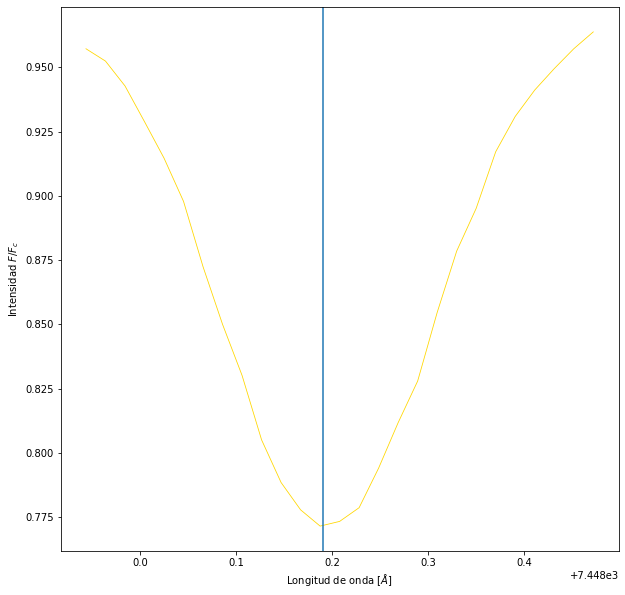

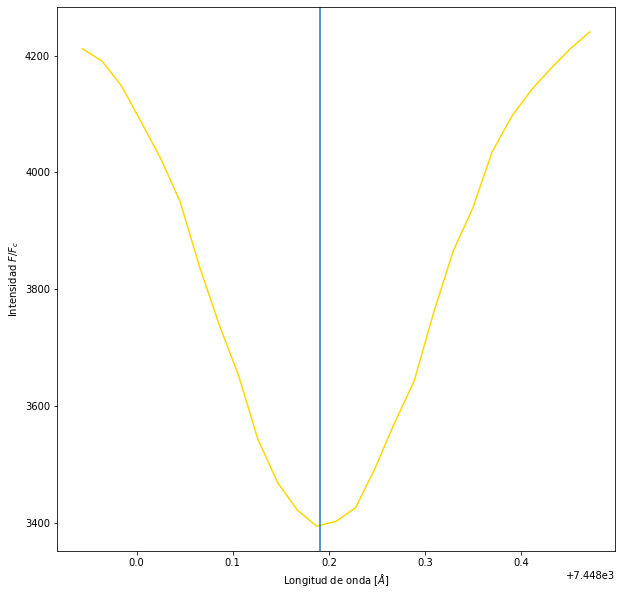

[7447.94359451 7447.96390298 7447.98421145 7448.00451992 7448.02482839
 7448.04513686 7448.06544533 7448.0857538  7448.10606226 7448.12637073
 7448.1466792  7448.16698767 7448.18729614 7448.20760461 7448.22791308
 7448.24822155 7448.26853002 7448.28883849 7448.30914696 7448.32945543
 7448.3497639  7448.37007236 7448.39038083 7448.4106893  7448.43099777
 7448.45130624 7448.47161471]
[0.95717936 0.9523832  0.94272429 0.92882882 0.9146662  0.89784537
 0.87243731 0.85002985 0.830186   0.80514514 0.78856011 0.77793819
 0.77162283 0.77344498 0.7787799  0.79418186 0.81184396 0.82801405
 0.85466779 0.87853457 0.89516704 0.91714491 0.93088259 0.9411353
 0.9494613  0.95717588 0.96373399]
27
7448.197444510914 0.9571793621463863
7448.201194510921 0.9523831981235
7448.199194510917 0.9427242858859319
7448.195544510909 0.9288288204867954
7448.19614451091 0.9146661988392727
7448.198744510915 0.8978453735346591
7448.194344510906 0.8724373079005227
7448.195744510909 0.8500298475839999
7448.198394510915 

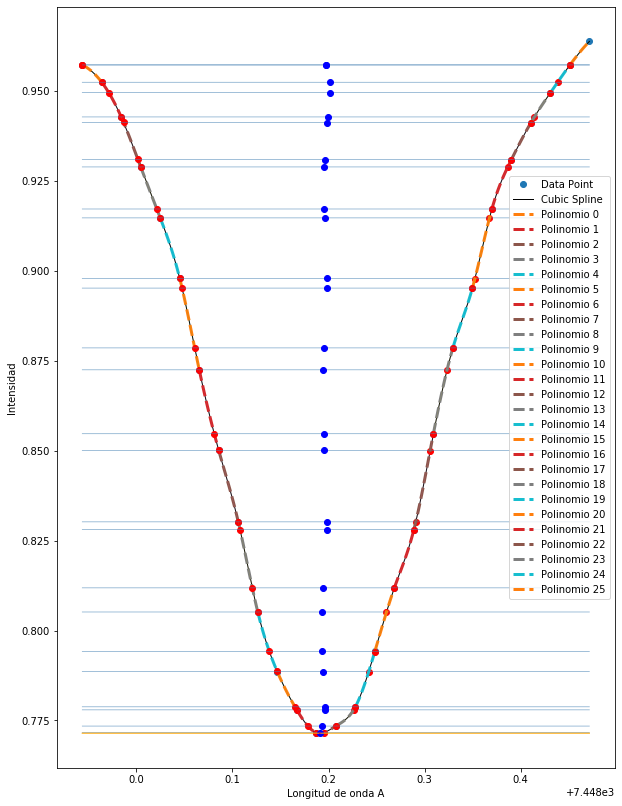

0.7714568592220281


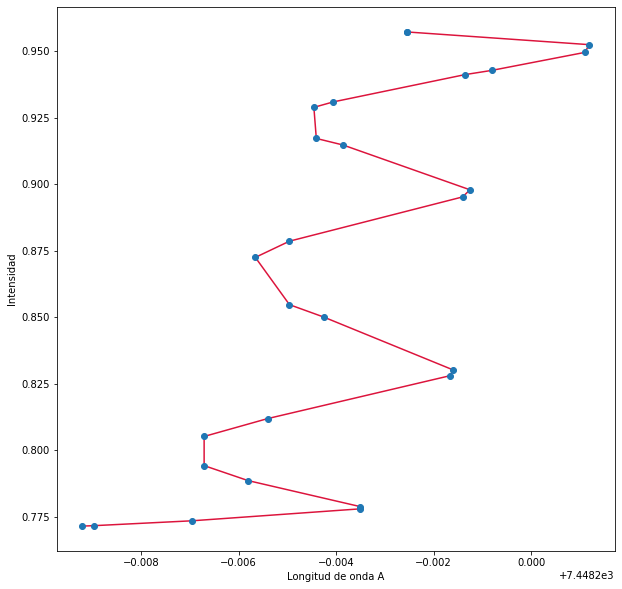

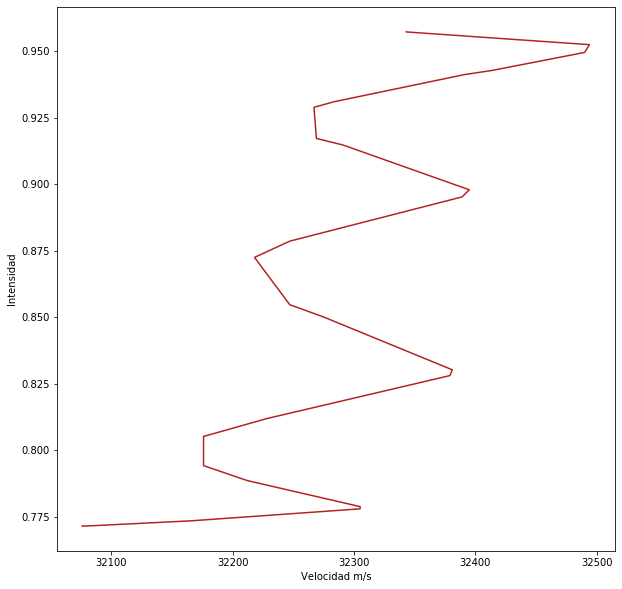

[22127. 22944. 23761. 24579. 25396. 26213. 27031. 27848. 28665. 29483.
 30300. 31117. 31935. 32752. 33569. 34387. 35204. 36021. 36839. 37656.
 38473. 39291. 40108. 40925. 41743. 42560. 43377.]
[0.95717936 0.9523832  0.94272429 0.92882882 0.9146662  0.89784537
 0.87243731 0.85002985 0.830186   0.80514514 0.78856011 0.77793819
 0.77162283 0.77344498 0.7787799  0.79418186 0.81184396 0.82801405
 0.85466779 0.87853457 0.89516704 0.91714491 0.93088259 0.9411353
 0.9494613  0.95717588 0.96373399]


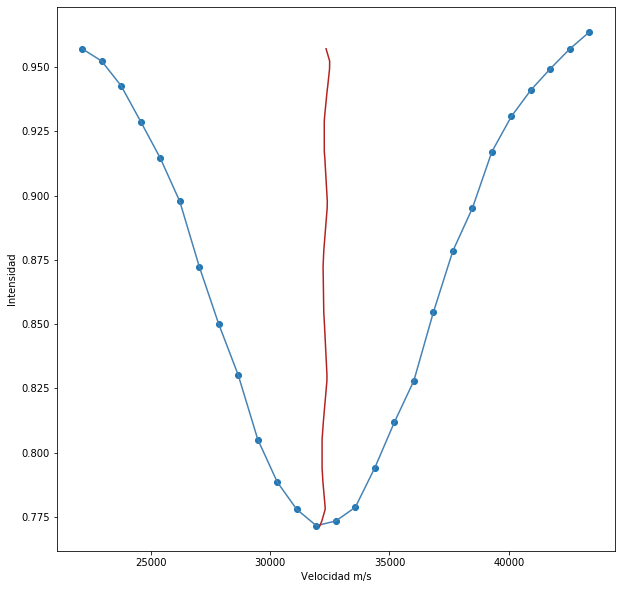

32343.693502081413 0.9571793621463863
32495.24050211229 0.9523831981235
32415.10500209596 0.9427242858859319
32267.454502065884 0.9288288204867954
32293.049502071095 0.9146661988392727
32396.55350209218 0.8978453735346591
32221.32100205648 0.8724373079005227
32276.48200206772 0.8500298475839999
32383.09150208944 0.8301859996072273
32179.63350204799 0.8051451438412273
32215.46750205529 0.7885601109932501
32306.651502073866 0.7779381922727273
32087.516002029224 0.7716228256046818
32166.876002045392 0.7734449790064546
32305.54900207364 0.7787799008212954
32177.181002047488 0.7941818631277273
32229.20400205809 0.8118439615215001
32380.365502088884 0.8280140545151818
32249.400502062203 0.8546677853623637
32248.15750206195 0.8785345708183181
32391.59500209117 0.8951670424498637
32271.9725020668 0.9171449075570227
32285.51450206956 0.9308825889655
32394.571002091776 0.9411352956454545
32492.02500211163 0.9494613023320682
32344.059002081485 0.9571758810895682


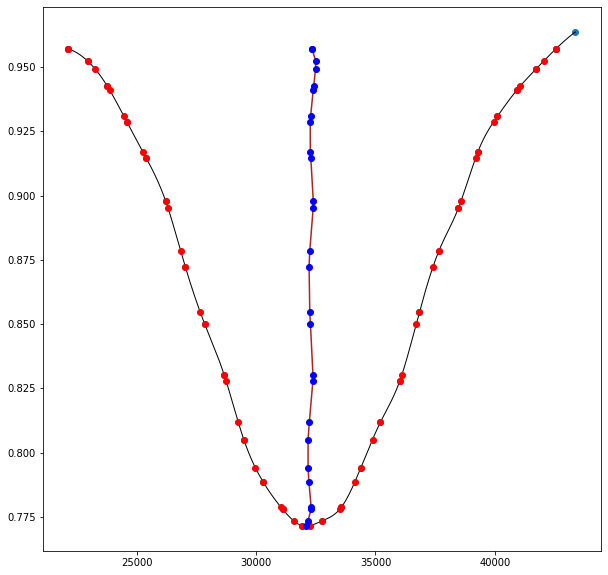

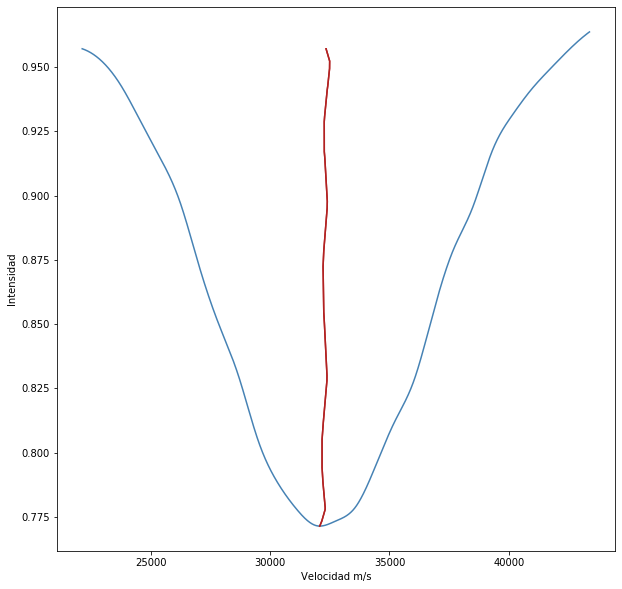

In [13]:
#----------------------------------------------------------------------------------
'''dataV2 = np.loadtxt('V2.dat')
datanV2 = dataV2/4400

#normalizedV2= preprocessing.normalize(datanormV2)
#print(Fnorm)
#print(normalized)

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataV2[:,0], datanV2[:,1], linewidth=0.8, c='gold')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('V2.png', dpi=720)
plt.show()

dataV2 = np.loadtxt('V2.dat')
datanV2 = dataV2/4400

#normalizedV2= preprocessing.normalize(datanormV2)
#print(Fnorm)
#print(normalized)

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataV2[:,0], datanV2[:,1], linewidth=0.8, c='gold')
plt.axvline(xcoords2, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('V2.png', dpi=720)
plt.show()
'''

dataV3 = np.loadtxt('V3.dat')
datanV3 = dataV3/4400

#Fnorm = datanormV3[:,1]

#normalizedV3= preprocessing.normalize(datanormV3)
#print(Fnorm)
#print(normalized)

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataV3[:,0], datanV3[:,1], linewidth=0.8, c='gold')
plt.axvline(xcoords3, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('V3.png', dpi=240)
plt.show()

dataV3 = np.loadtxt('V3.dat')

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataV3[:,0], dataV3[:,1], linewidth=1.5, c='gold')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.axvline(xcoords3, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('V3.pdf', dpi=240)
plt.show()

#----------------------------------------------------------------------------------

###############################################################################################
###################Construccion del bisector ###################################################
#-----------------------------------------------------------------------------------------------
# seleccionar datos ----------------------------------------------------------------------------
dataV3 = np.loadtxt('V3.dat')
#Fnorm = datanormV3[:,1]
#datanV3 = preprocessing.normalize(datanormV3)
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanV3 = dataV3/4400

# Seleccionar coordenandas ---------------------------------------------------------------------
x = dataV3[:,0]
y = datanV3[:,1]

print(x)
print(y)
print(x.shape[0])

# Cubic Spline regresion -----------------------------------------------------------------------
s = interpolate.CubicSpline(x, y)

arr = np.arange(np.amin(x), np.amax(x), 0.0001)
s = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 14)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)


#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(x.shape[0] - 1):
    segment_x = np.linspace(x[i], x[i + 1], 100)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    
    plt.plot(segment_x, segment_y, label='Polinomio {}'.format(i), ls='--', lw=3)
    @np.vectorize
    def constant_function1(x):
        return datanV3[i,1]
    delta_x1 = np.arange(dataV3[0,0], dataV3[26,0], 0.0001)
    
    idx = np.argwhere(np.diff(np.sign(s(arr)-constant_function1(i))) != 0).reshape(-1)+0
    
        
    plt.plot(arr[idx], s(arr)[idx], 'ro')
    plt.plot(delta_x1, constant_function1(delta_x1), linewidth=0.5, c='steelblue')
    plt.plot()
    #print(arr[idx][0])
    #print(arr[idx][-1])
    bisector = (arr[idx][0]+arr[idx][1])/2
    #print(bisector)
    plt.plot(bisector, constant_function1(bisector), 'bo')
    print(bisector, constant_function1(bisector))
    plt.plot(segment_x, segment_y, ls='-', lw=0.1)
#for j in range(18):
   # print(arr[idx][j+1], arr[idx][j])
    
@np.vectorize
def constant_functionmini(x):
    return min(s(arr))

delta_xm = np.arange(dataV3[0,0], dataV3[26,0], 0.0001)
plt.plot(delta_xm, constant_functionmini(delta_xm), linewidth=1.0, c='orange')

#print(constant_functionmini)
    
idmin = np.argwhere(np.diff(np.sign(s(arr)-constant_functionmini(delta_xm))) != 0).reshape(-1)+0

plt.plot(arr[idmin], s(arr)[idmin], 'crimson')
print('minimos')
print(arr[idmin])
print(s(arr)[idmin])

plt.legend()
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('BisectorV3.png', dpi=240)
plt.show()

print(min(s(arr)))

#########################################################################################
#Transformar a velocidad el espectro de cada liena de absorcion ------------------------------
from seaborn import load_dataset

# seleccionar datos ----------------------------------------------------------------------------
BisecV3 = np.loadtxt('BisecV3.dat')

xb = BisecV3[:,0]
yb = BisecV3[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'crimson')
plt.plot(xb, yb, 'o', label='Data Point')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorV3.png', dpi=240)
plt.show()

#Manipulacion datos
data = np.genfromtxt('V3.dat')
data = ((data-7447.3938)/7447.3938)*299729458
np.savetxt("V3v.dat", data, fmt='%d')

#Transformar a velocidades
#Construccion del bisector
#-----------------------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np

data = np.genfromtxt('BisecV3.dat')
data = ((data-7447.3938)/7447.3938)*299729458
np.savetxt("BisecV3v.dat", data, fmt='%d')

BisecV3v = np.loadtxt('BisecV3v.dat')

xb = BisecV3v[:,0]
yb = BisecV3[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorV3v.png', dpi=240)
plt.show()

############################################
# seleccionar datos ----------------------------------------------------------------------------
dataV3v = np.genfromtxt('V3v.dat')

# Seleccionar coordenandas ---------------------------------------------------------------------
#x = dataI1[:,0]
x = dataV3v[:,0]
y = datanV3[:,1]

print(x)
print(y)

fig = plt.figure(figsize = (10, 10)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(x, y, 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorV3v1.png', dpi=240)
plt.show()

arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

#fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize = (10, 10)) 
#ax.hold(True)
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arrv, sv(arrv), 'k-', label='Cubic Spline', lw=1)
plt.plot(xb, yb, 'firebrick')

#print(datavI1[0,0])
#print(datavI1[20,0])

#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(26):
    
    def constant_functionv1(x):
        return datanV3[i,1]
    delta_xv1 = np.arange(dataV3v[0,0], dataV3v[26,0], 0.001)
    
    idxv = np.argwhere(np.diff(np.sign(sv(arrv)-constant_functionv1(i))) != 0).reshape(-1)+0
            
    plt.plot(arrv[idxv], sv(arrv)[idxv], 'ro')
    #plt.plot(delta_xv1, constant_functionv1(delta_xv1), linewidth=0.5, c='orange')
    plt.plot()
    #print(arr[idx])
    bisectorv = (arrv[idxv][0]+arrv[idxv][1])/2
    #print(bisector)
    plt.plot(bisectorv, constant_functionv1(bisectorv), 'bo')
    print(bisectorv, constant_functionv1(bisectorv))

#-------------------------------------------------------------------------------    
arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 10)) 
#plt.plot(x, y, 'steelblue')
plt.plot(arrv, sv(arrv), 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorV3vs.png', dpi=240)
plt.show()

####################################################################################
####################################################################################

#----------------------------------------------------------------------------------

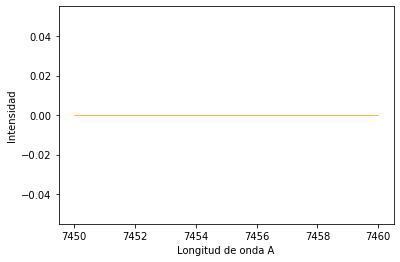

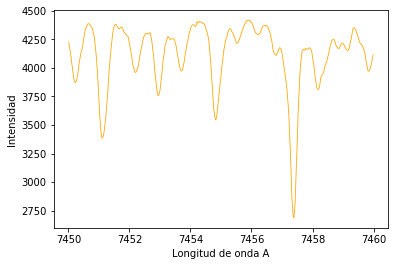

In [14]:
#------------------------------------------------------------------------------------------
datafeVI = np.loadtxt('FeI-VI.dat')

plt.figure()
plt.plot(datafeVI[:,0], datafeVI[:,1], linewidth=0.8, c='orange')
#plt.scatter(datafe[:,1], datafe[:,0], marker = 'o', s = 20, c='r')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('FeI-VI.png', dpi=240)
plt.show()

datahdVI = np.loadtxt('hd190421-VI.dat')

plt.figure()
plt.plot(datahdVI[:,0], datahdVI[:,1], linewidth=0.8, c='orange')
#plt.scatter(datahd2[:,0], datahd2[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('HD190421-VI.png', dpi=240)
plt.show()


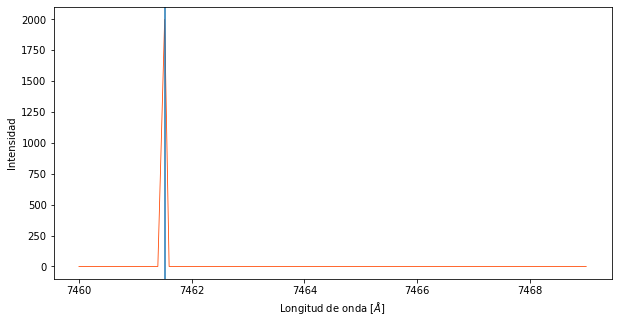

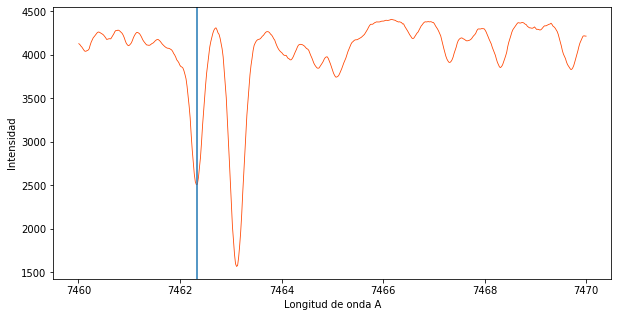

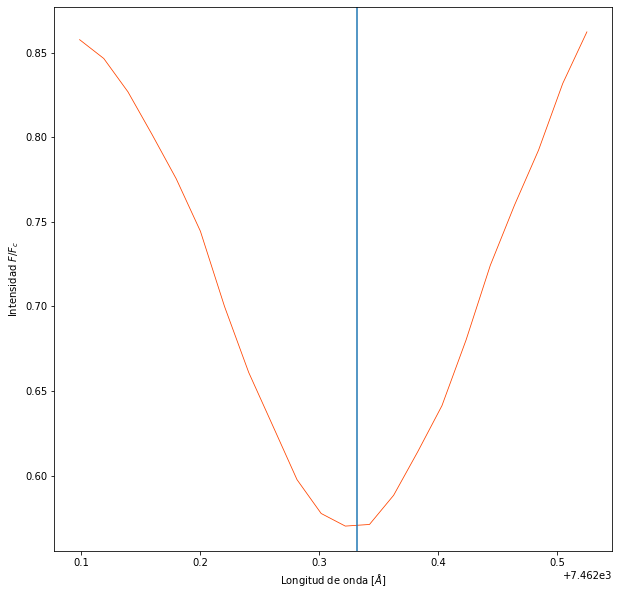

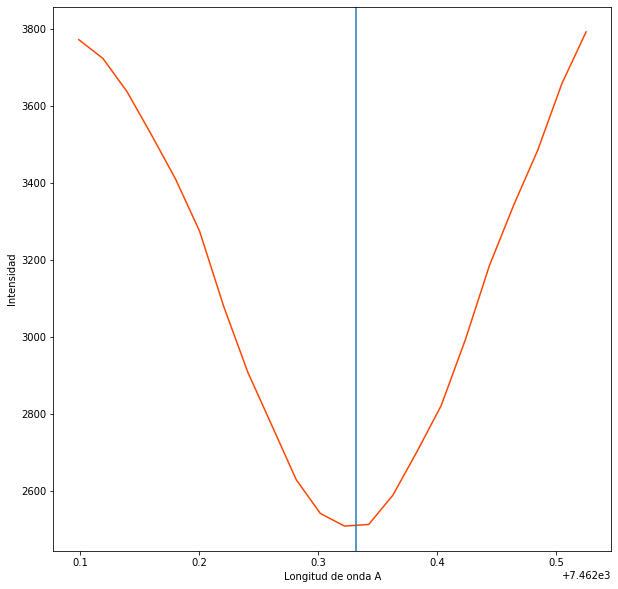

[7462.09859757 7462.11890604 7462.13921451 7462.15952298 7462.17983145
 7462.20013992 7462.22044838 7462.24075685 7462.26106532 7462.28137379
 7462.30168226 7462.32199073 7462.3422992  7462.36260767 7462.38291614
 7462.40322461 7462.42353308 7462.44384155 7462.46415002 7462.48445848
 7462.50476695 7462.52507542]
[0.85759266 0.84647082 0.82677752 0.80152271 0.77535971 0.74439886
 0.69986392 0.66092383 0.62932265 0.59754522 0.57755824 0.57011138
 0.57107811 0.5883275  0.61412559 0.64128499 0.68015652 0.72415316
 0.75967498 0.79234377 0.83169301 0.86218081]
22
7462.309647569527 0.8575926607191591
7462.315947569539 0.8464708228416591
7462.320697569549 0.8267775198485
7462.324397569557 0.8015227115215682
7462.326997569562 0.7753597066939772
7462.327447569563 0.7443988637751364
7462.326397569561 0.6998639227553182
7462.327447569563 0.6609238279174318
7462.327947569564 0.6293226460181591
7462.325697569559 0.5975452197740228
7462.326847569562 0.5775582433192954
7462.330747569569 0.570111381200

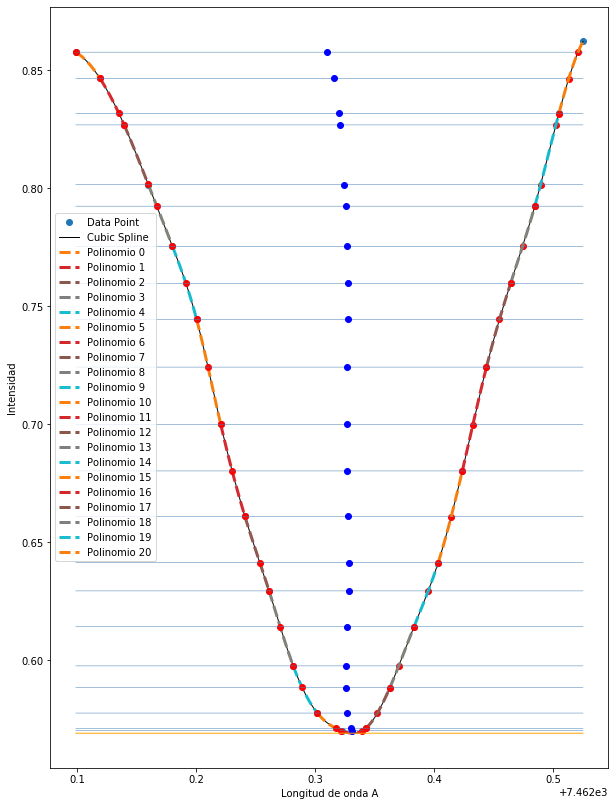

0.5690210704205507


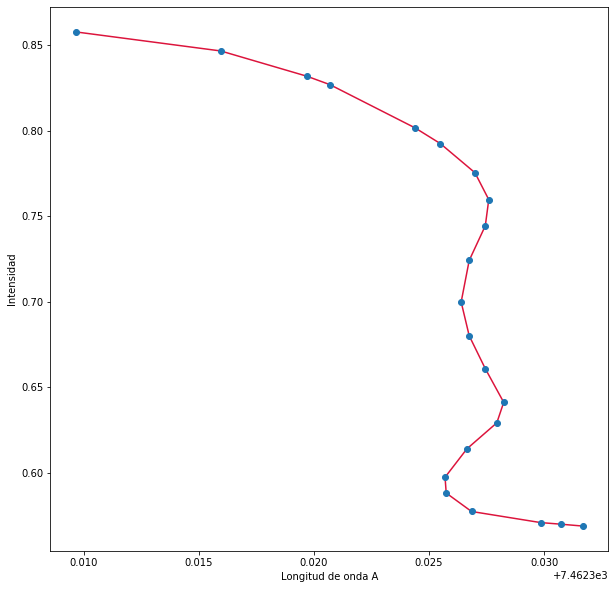

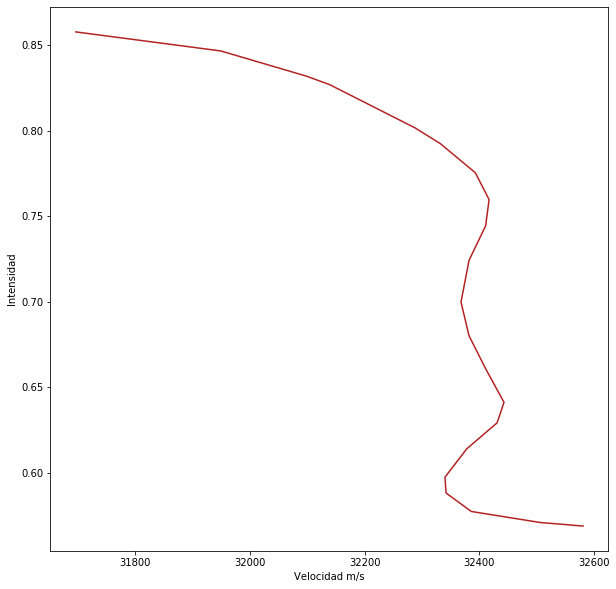

[23218. 24033. 24849. 25665. 26481. 27297. 28112. 28928. 29744. 30560.
 31376. 32191. 33007. 33823. 34639. 35455. 36270. 37086. 37902. 38718.
 39534. 40349.]
[0.85759266 0.84647082 0.82677752 0.80152271 0.77535971 0.74439886
 0.69986392 0.66092383 0.62932265 0.59754522 0.57755824 0.57011138
 0.57107811 0.5883275  0.61412559 0.64128499 0.68015652 0.72415316
 0.75967498 0.79234377 0.83169301 0.86218081]


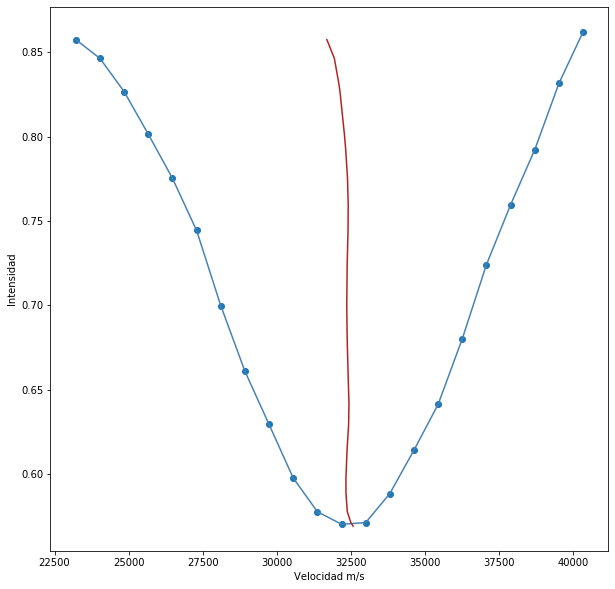

31697.78100172756 0.8575926607191591
31950.052501778955 0.8464708228416591
32140.229001817694 0.8267775198485
32290.608001848334 0.8015227115215682
32394.40400186948 0.7753597066939772
32411.661501872994 0.7443988637751364
32370.42700186459 0.6998639227553182
32412.603501873185 0.6609238279174318
32432.506001877242 0.6293226460181591
32342.19900185884 0.5975452197740228
32389.133501868404 0.5775582433192954
32545.435001900245 0.5701113812004318
32508.814001892788 0.5710781123925001
32343.921501859193 0.5883274994920228
32379.73050186649 0.6141255893306818
32443.70700187952 0.6412849937657272
32383.41400186724 0.6801565157813182
32383.503001867255 0.7241531554079773
32418.85450187446 0.7596749800373863
32335.31350185744 0.7923437680481363
32102.479501810005 0.8316930063994318


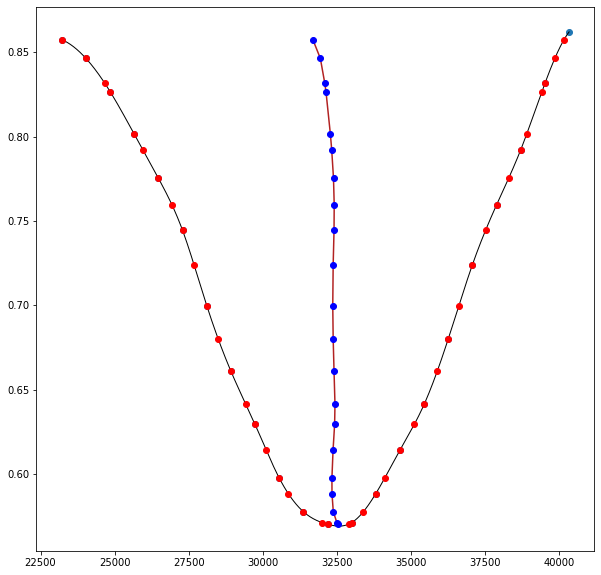

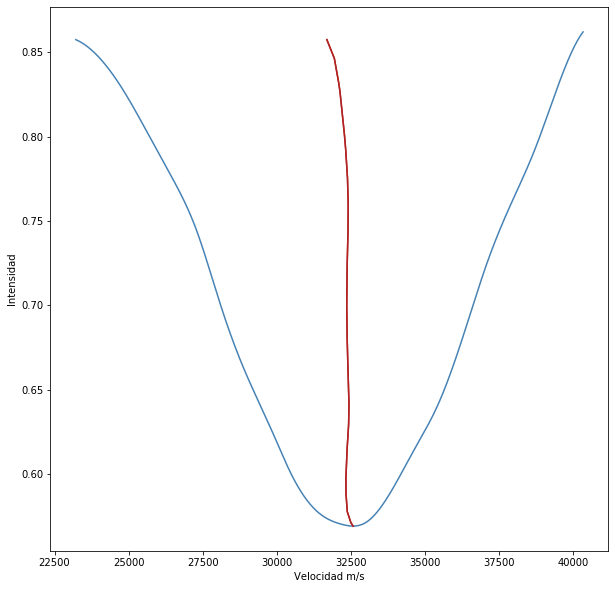

In [15]:
'''datafeV = np.loadtxt('FeI-V.dat')
xcoords1 = [7443.0224]
colors = ['b']
xcoords2 = [7445.7508]
colors = ['b']
xcoords3 = [7447.3938]
colors = ['b']
fig = plt.figure(figsize = (20, 5))
plt.plot(datafeV[:,0], datafeV[:,1], linewidth=0.8, c='gold')
#plt.scatter(datafe[:,1], datafe[:,0], marker = 'o', s = 20, c='r')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.axvline(xcoords2, label='Bisector II2')
plt.axvline(xcoords3, label='Bisector II3')
plt.ylabel('Intensidad')
plt.savefig('FeI-V.png', dpi=720)
plt.show()

dataV = np.loadtxt('hd190421-V.dat')
datanV = dataV/4400
xcoords1 = [7443.8179]
colors = ['b']
xcoords2 = [7446.5456]
colors = ['b']
xcoords3 = [7448.1908]
colors = ['b']
fig = plt.figure(figsize = (20, 5))
plt.plot(dataV[:,0], dataV[:,1], linewidth=0.8, c='gold')
#plt.scatter(datahd2[:,0], datahd2[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.axvline(xcoords2, label='Bisector II2')
plt.axvline(xcoords3, label='Bisector II3')
plt.ylabel('Intensidad')
plt.savefig('HD190421-V.png', dpi=720)

plt.show()

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataV3[:,0], datanV3[:,1], linewidth=0.8, c='gold')
plt.axvline(xcoords3, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('V3.png', dpi=720)
plt.show()
'''

#------------------------------------------------------------------------------------------
datafeVII = np.loadtxt('FeI-VII.dat')
xcoords1 = [7461.5206]
colors = ['b']
fig = plt.figure(figsize = (10, 5)) 
plt.plot(datafeVII[:,0], datafeVII[:,1], linewidth=0.8, c='orangered')
#plt.scatter(datafe[:,1], datafe[:,0], marker = 'o', s = 20, c='r')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.ylabel('Intensidad')
plt.savefig('FeI-VII.png', dpi=240)
plt.show()


datahdVII = np.loadtxt('hd190421-VII.dat')
datanhdVII = datahdVII/4400
xcoords1 = [7462.3317]
colors = ['b']
fig = plt.figure(figsize = (10, 5)) 
plt.plot(datahdVII[:,0], datahdVII[:,1], linewidth=0.8, c='orangered')
#plt.scatter(datahd2[:,0], datahd2[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.axvline(xcoords1, label='Bisector II1')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('HD190421-VII.png', dpi=240)
plt.show()


datanormVII1 = np.loadtxt('VII1.dat')

Fnorm = datanormVII1[:,1]

normalizedVII1= preprocessing.normalize(datanormVII1)
#print(Fnorm)
#print(normalized)
# seleccionar datos ----------------------------------------------------------------------------
dataVII1 = np.loadtxt('VII1.dat')
#Fnorm = datanormVII1[:,1]
#datanVII1 = preprocessing.normalize(datanormVII1)
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanVII1 = dataVII1/4400

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataVII1[:,0], datanVII1[:,1], linewidth=0.8, c='orangered')
plt.axvline(xcoords1, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('VII1.png', dpi=240)
plt.show()

dataVII1 = np.loadtxt('VII1.dat')

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataVII1[:,0], dataVII1[:,1], linewidth=1.5, c='orangered')
plt.axvline(xcoords1, label='Bisector II1')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('VII1.pdf', dpi=240)
plt.show()


###############################################################################################
###################Construccion del bisector ###################################################
#-----------------------------------------------------------------------------------------------
# seleccionar datos ----------------------------------------------------------------------------
dataVII1 = np.loadtxt('VII1.dat')
#Fnorm = datanormVII1[:,1]
#datanVII1 = preprocessing.normalize(datanormVII1)
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanVII1 = dataVII1/4400

# Seleccionar coordenandas ---------------------------------------------------------------------
x = dataVII1[:,0]
y = datanVII1[:,1]

print(x)
print(y)
print(x.shape[0])

# Cubic Spline regresion -----------------------------------------------------------------------
s = interpolate.CubicSpline(x, y)

arr = np.arange(np.amin(x), np.amax(x), 0.0001)
s = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 14)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)


#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(x.shape[0] - 1):
    segment_x = np.linspace(x[i], x[i + 1], 100)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    
    plt.plot(segment_x, segment_y, label='Polinomio {}'.format(i), ls='--', lw=3)
    @np.vectorize
    def constant_function1(x):
        return datanVII1[i,1]
    delta_x1 = np.arange(dataVII1[0,0], dataVII1[21,0], 0.0001)
    
    idx = np.argwhere(np.diff(np.sign(s(arr)-constant_function1(i))) != 0).reshape(-1)+0
    
        
    plt.plot(arr[idx], s(arr)[idx], 'ro')
    plt.plot(delta_x1, constant_function1(delta_x1), linewidth=0.5, c='steelblue')
    plt.plot()
    #print(arr[idx][0])
    #print(arr[idx][-1])
    bisector = (arr[idx][0]+arr[idx][1])/2
    #print(bisector)
    plt.plot(bisector, constant_function1(bisector), 'bo')
    print(bisector, constant_function1(bisector))
    plt.plot(segment_x, segment_y, ls='-', lw=0.1)
#for j in range(18):
   # print(arr[idx][j+1], arr[idx][j])
    
@np.vectorize
def constant_functionmini(x):
    return min(s(arr))

delta_xm = np.arange(dataVII1[0,0], dataVII1[21,0], 0.0001)
plt.plot(delta_xm, constant_functionmini(delta_xm), linewidth=1.0, c='orange')

#print(constant_functionmini)
    
idmin = np.argwhere(np.diff(np.sign(s(arr)-constant_functionmini(delta_xm))) != 0).reshape(-1)+0

plt.plot(arr[idmin], s(arr)[idmin], 'crimson')
print('minimos')
print(arr[idmin])
print(s(arr)[idmin])

plt.legend()
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('BisectorV3.png', dpi=240)
plt.show()

print(min(s(arr)))

#########################################################################################
#Transformar a velocidad el espectro de cada liena de absorcion ------------------------------
from seaborn import load_dataset

# seleccionar datos ----------------------------------------------------------------------------
BisecVII1 = np.loadtxt('BisecVII1.dat')

xb = BisecVII1[:,0]
yb = BisecVII1[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'crimson')
plt.plot(xb, yb, 'o', label='Data Point')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorVII1.png', dpi=240)
plt.show()

#Manipulacion datos
data = np.genfromtxt('VII1.dat')
data = ((data-7461.5206)/7461.5206)*299729458
np.savetxt("VII1v.dat", data, fmt='%d')

#Transformar a velocidades
#Construccion del bisector
#-----------------------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np

data = np.genfromtxt('BisecVII1.dat')
data = ((data-7461.5206)/7461.5206)*299729458
np.savetxt("BisecVII1v.dat", data, fmt='%d')

BisecVII1v = np.loadtxt('BisecVII1v.dat')

xb = BisecVII1v[:,0]
yb = BisecVII1[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorVII1v.png', dpi=240)
plt.show()

############################################
# seleccionar datos ----------------------------------------------------------------------------
dataVII1v = np.genfromtxt('VII1v.dat')

# Seleccionar coordenandas ---------------------------------------------------------------------
#x = dataI1[:,0]
x = dataVII1v[:,0]
y = datanVII1[:,1]

print(x)
print(y)

fig = plt.figure(figsize = (10, 10)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(x, y, 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorVII1v1.png', dpi=240)
plt.show()

arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

#fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize = (10, 10)) 
#ax.hold(True)
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arrv, sv(arrv), 'k-', label='Cubic Spline', lw=1)
plt.plot(xb, yb, 'firebrick')

#print(datavI1[0,0])
#print(datavI1[20,0])

#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(21):
    
    def constant_functionv1(x):
        return datanVII1[i,1]
    delta_xv1 = np.arange(dataVII1v[0,0], dataVII1v[21,0], 0.001)
    
    idxv = np.argwhere(np.diff(np.sign(sv(arrv)-constant_functionv1(i))) != 0).reshape(-1)+0
            
    plt.plot(arrv[idxv], sv(arrv)[idxv], 'ro')
    #plt.plot(delta_xv1, constant_functionv1(delta_xv1), linewidth=0.5, c='orange')
    plt.plot()
    #print(arr[idx])
    bisectorv = (arrv[idxv][0]+arrv[idxv][1])/2
    #print(bisector)
    plt.plot(bisectorv, constant_functionv1(bisectorv), 'bo')
    print(bisectorv, constant_functionv1(bisectorv))

#-------------------------------------------------------------------------------    
arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 10)) 
#plt.plot(x, y, 'steelblue')
plt.plot(arrv, sv(arrv), 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorVII1vs.png', dpi=240)
plt.show()

####################################################################################
####################################################################################

#----------------------------------------------------------------------------------

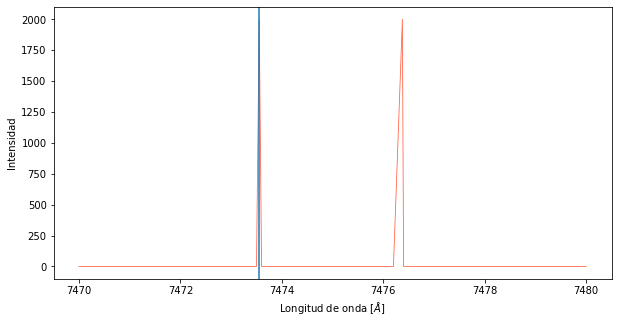

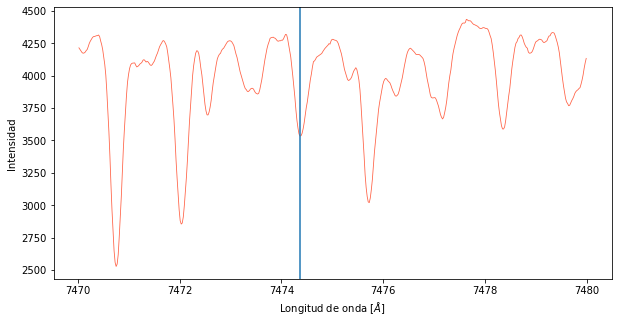

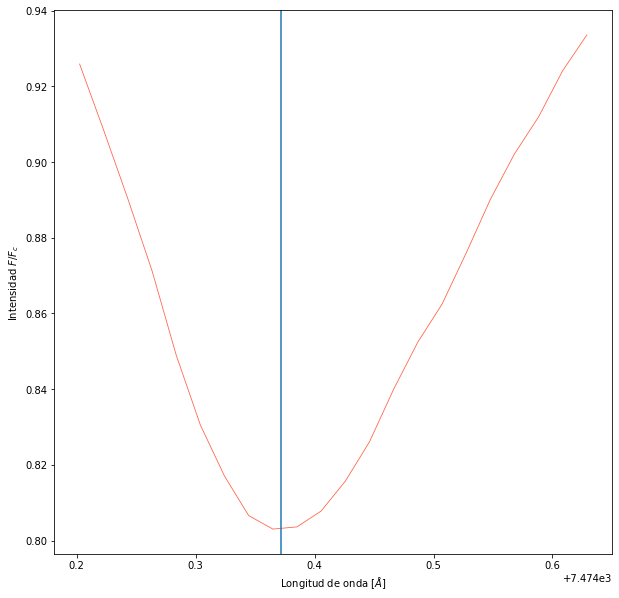

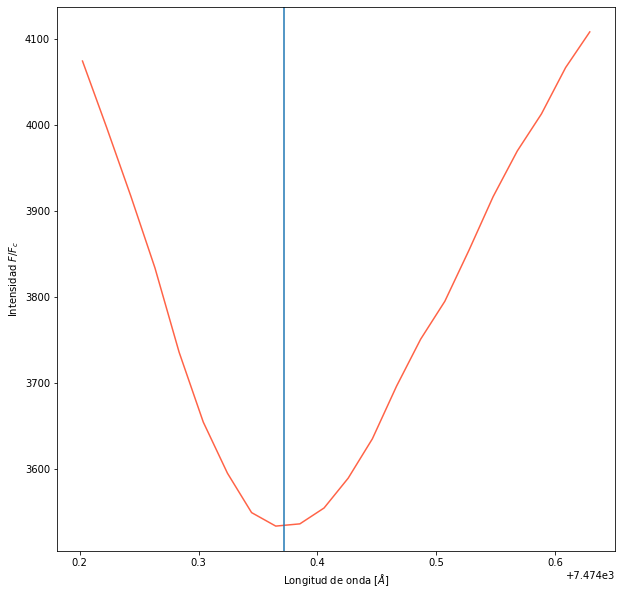

[7474.20244523 7474.2227537  7474.24306217 7474.26337064 7474.28367911
 7474.30398758 7474.32429605 7474.34460452 7474.36491299 7474.38522146
 7474.40552993 7474.4258384  7474.44614687 7474.46645533 7474.4867638
 7474.50707227 7474.52738074 7474.54768921 7474.56799768 7474.58830615
 7474.60861462 7474.62892309]
[0.92588988 0.90833607 0.89022569 0.871237   0.84897176 0.83051554
 0.81701771 0.80660022 0.80303637 0.80362633 0.80781358 0.81570561
 0.82608561 0.83998104 0.85241969 0.86241839 0.87591457 0.89006978
 0.90213446 0.91192623 0.92415751 0.93358511]
22
7474.406995235113 0.92588987613225
7474.401895235103 0.9083360729307273
7474.39544523509 0.8902256934719546
7474.392045235083 0.8712369983707046
7474.382045235063 0.84897175828025
7474.378445235056 0.8305155371520228
7474.376495235052 0.8170177145968863
7474.372895235045 0.8066002234006364
7474.371395235041 0.8030363739677273
7474.371395235041 0.8036263280348183
7474.373445235045 0.8078135814620228
7474.376095235051 0.815705606358386

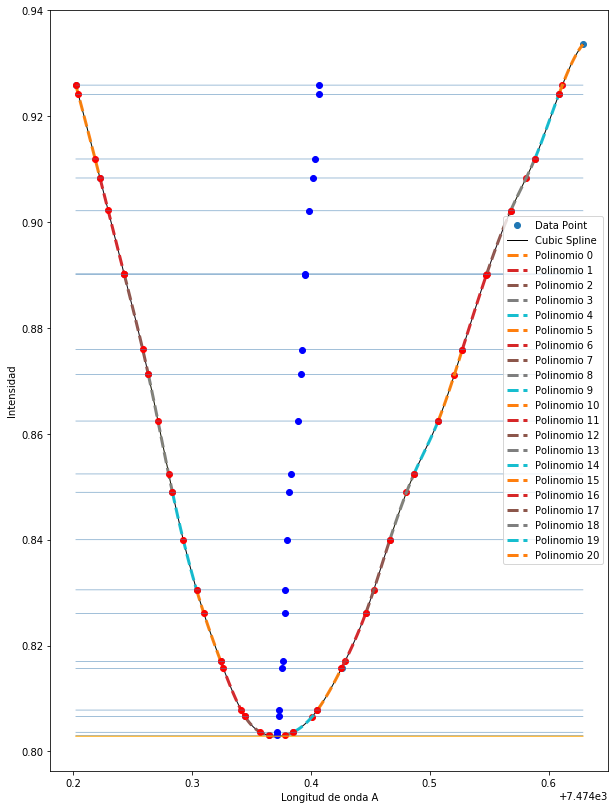

0.8028713770959512


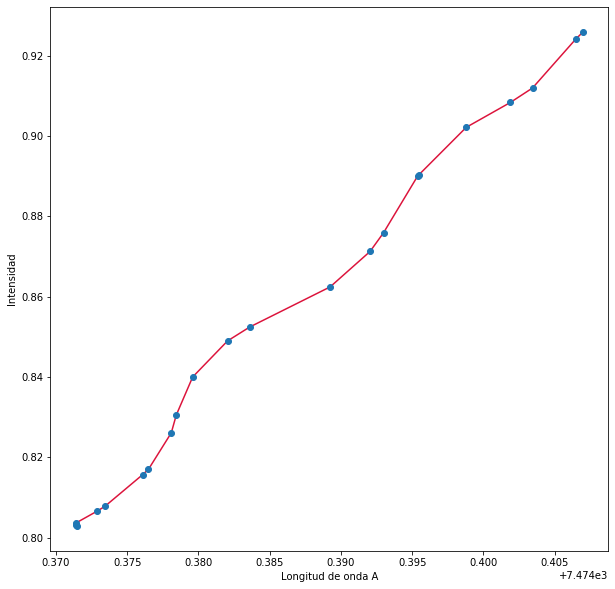

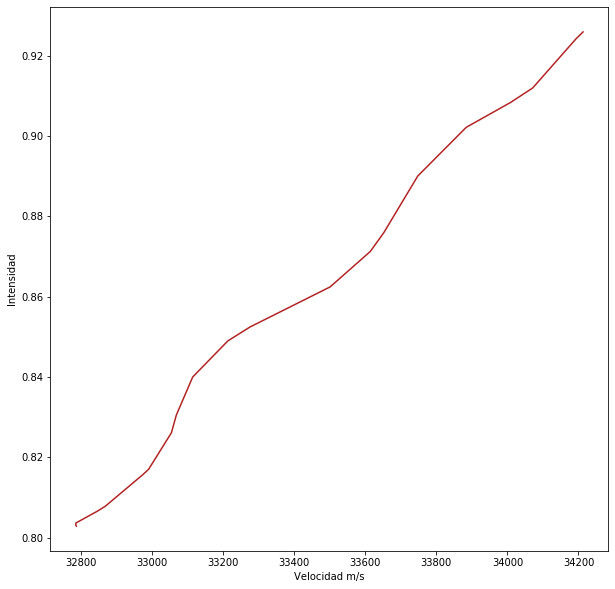

[26010. 26824. 27639. 28453. 29268. 30082. 30896. 31711. 32525. 33340.
 34154. 34969. 35783. 36598. 37412. 38227. 39041. 39856. 40670. 41485.
 42299. 43114.]
[0.92588988 0.90833607 0.89022569 0.871237   0.84897176 0.83051554
 0.81701771 0.80660022 0.80303637 0.80362633 0.80781358 0.81570561
 0.82608561 0.83998104 0.85241969 0.86241839 0.87591457 0.89006978
 0.90213446 0.91192623 0.92415751 0.93358511]


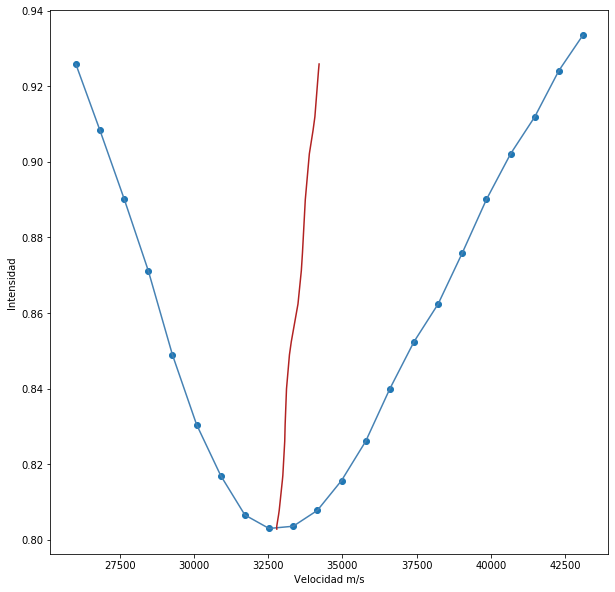

34213.39950167125 0.92588987613225
34010.115001629834 0.9083360729307273
33752.223001577295 0.8902256934719546
33615.09350154936 0.8712369983707046
33214.31750146771 0.84897175828025
33068.99250143811 0.8305155371520228
32990.928501422204 0.8170177145968863
32846.97250139288 0.8066002234006364
32787.733501380804 0.8030363739677273
32788.977001381056 0.8036263280348183
32869.550001397474 0.8078135814620228
32976.33450141923 0.8157056063583864
33054.54300143516 0.8260856105415227
33115.44750144757 0.8399810422368637
33275.54800148019 0.85241969406575
33502.94900152651 0.8624183866664773
33653.62700155721 0.8759145650503409
33751.01550157705 0.8900697849024092
33886.84750160472 0.9021344631130681
34072.937501642635 0.9119262284926818
34195.849501667675 0.9241575066824091


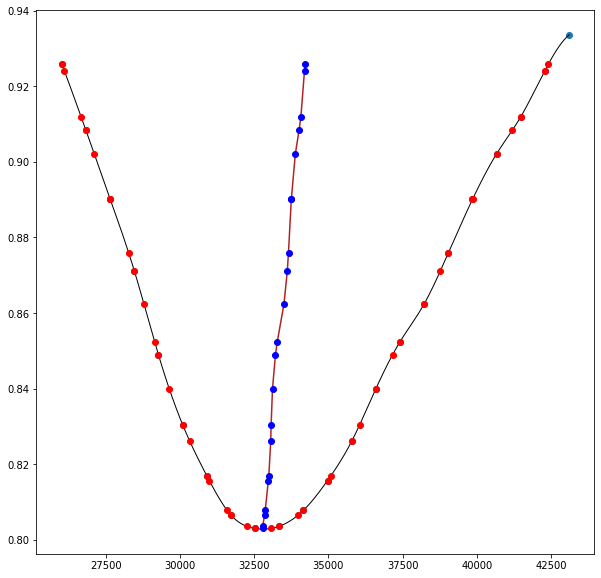

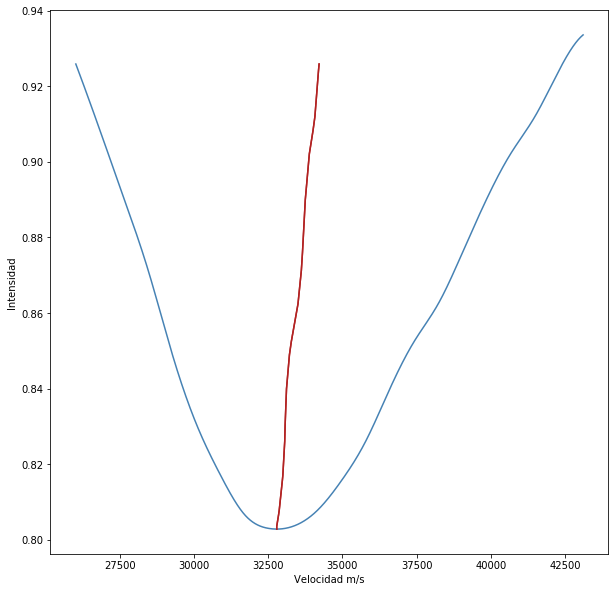

In [16]:
'''datafeVII = np.loadtxt('FeI-VII.dat')
xcoords1 = [7461.5206]
colors = ['b']
fig = plt.figure(figsize = (10, 5)) 
plt.plot(datafeVII[:,0], datafeVII[:,1], linewidth=0.8, c='orangered')
#plt.scatter(datafe[:,1], datafe[:,0], marker = 'o', s = 20, c='r')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.ylabel('Intensidad')
plt.savefig('FeI-VII.png', dpi=720)
plt.show()


datahdVII = np.loadtxt('hd190421-VII.dat')
datanhdVII = datahdVII/4400
xcoords1 = [7462.3317]
colors = ['b']
fig = plt.figure(figsize = (10, 5)) 
plt.plot(datahdVII[:,0], datahdVII[:,1], linewidth=0.8, c='orangered')
#plt.scatter(datahd2[:,0], datahd2[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.axvline(xcoords1, label='Bisector II1')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('HD190421-VII.png', dpi=720)
plt.show()


datanormVII1 = np.loadtxt('VII1.dat')

Fnorm = datanormVII1[:,1]

normalizedVII1= preprocessing.normalize(datanormVII1)
#print(Fnorm)
#print(normalized)
# seleccionar datos ----------------------------------------------------------------------------
dataVII1 = np.loadtxt('VII1.dat')
#Fnorm = datanormVII1[:,1]
#datanVII1 = preprocessing.normalize(datanormVII1)
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanVII1 = dataVII1/4400

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataVII1[:,0], datanVII1[:,1], linewidth=0.8, c='orangered')
plt.axvline(xcoords1, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('VII1.png', dpi=720)
plt.show()

dataVII1 = np.loadtxt('VII1.dat')

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataVII1[:,0], dataVII1[:,1], linewidth=1.5, c='orangered')
plt.axvline(xcoords1, label='Bisector II1')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('VII1.pdf', dpi=720)
plt.show()'''
#------------------------------------------------------------------------------------------
datafeVIII = np.loadtxt('FeI-VIII.dat')

xcoords1 = [7473.5539]
colors = ['b']
fig = plt.figure(figsize = (10, 5)) 
plt.plot(datafeVIII[:,0], datafeVIII[:,1], linewidth=0.8, c='tomato')
#plt.scatter(datafe[:,1], datafe[:,0], marker = 'o', s = 20, c='r')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.ylabel('Intensidad')
plt.savefig('FeI-VIII.png', dpi=240)
plt.show()

datahdVIII = np.loadtxt('hd190421-VIII.dat')
xcoords1 = [7474.3715]
colors = ['b']
fig = plt.figure(figsize = (10, 5)) 
plt.plot(datahdVIII[:,0], datahdVIII[:,1], linewidth=0.8, c='tomato')
#plt.scatter(datahd2[:,0], datahd2[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.ylabel('Intensidad')
plt.savefig('HD190421-VIII.png', dpi=240)
plt.show()

#----------------------------------------------------------------------------------

# seleccionar datos ----------------------------------------------------------------------------
dataVIII1 = np.loadtxt('VIII1.dat')
#Fnorm = datanormVIII1[:,1]
#datanVIII1 = preprocessing.normalize(datanormVIII1)
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanVIII1 = dataVIII1/4400

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataVIII1[:,0], datanVIII1[:,1], linewidth=0.8, c='tomato')
plt.axvline(xcoords1, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('VIII1.png', dpi=240)
plt.show()

dataVIII1 = np.loadtxt('VIII1.dat')

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataVIII1[:,0], dataVIII1[:,1], linewidth=1.5, c='tomato')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.axvline(xcoords1, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('VIII1.pdf', dpi=240)
plt.show()

###############################################################################################
###################Construccion del bisector ###################################################
#-----------------------------------------------------------------------------------------------


# Seleccionar coordenandas ---------------------------------------------------------------------
x = dataVIII1[:,0]
y = datanVIII1[:,1]

print(x)
print(y)
print(x.shape[0])

# Cubic Spline regresion -----------------------------------------------------------------------
s = interpolate.CubicSpline(x, y)

arr = np.arange(np.amin(x), np.amax(x), 0.0001)
s = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 14)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)


#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(x.shape[0] - 1):
    segment_x = np.linspace(x[i], x[i + 1], 100)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    
    plt.plot(segment_x, segment_y, label='Polinomio {}'.format(i), ls='--', lw=3)
    @np.vectorize
    def constant_function1(x):
        return datanVIII1[i,1]
    delta_x1 = np.arange(dataVIII1[0,0], dataVIII1[21,0], 0.0001)
    
    idx = np.argwhere(np.diff(np.sign(s(arr)-constant_function1(i))) != 0).reshape(-1)+0
    
        
    plt.plot(arr[idx], s(arr)[idx], 'ro')
    plt.plot(delta_x1, constant_function1(delta_x1), linewidth=0.5, c='steelblue')
    plt.plot()
    #print(arr[idx][0])
    #print(arr[idx][-1])
    bisector = (arr[idx][0]+arr[idx][1])/2
    #print(bisector)
    plt.plot(bisector, constant_function1(bisector), 'bo')
    print(bisector, constant_function1(bisector))
    plt.plot(segment_x, segment_y, ls='-', lw=0.1)
#for j in range(18):
   # print(arr[idx][j+1], arr[idx][j])
    
@np.vectorize
def constant_functionmini(x):
    return min(s(arr))

delta_xm = np.arange(dataVIII1[0,0], dataVIII1[21,0], 0.0001)
plt.plot(delta_xm, constant_functionmini(delta_xm), linewidth=1.0, c='orange')

#print(constant_functionmini)
    
idmin = np.argwhere(np.diff(np.sign(s(arr)-constant_functionmini(delta_xm))) != 0).reshape(-1)+0

plt.plot(arr[idmin], s(arr)[idmin], 'crimson')
print('minimos')
print(arr[idmin])
print(s(arr)[idmin])

plt.legend()
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('BisectorVIII1.png', dpi=240)
plt.show()

print(min(s(arr)))

#########################################################################################
#Transformar a velocidad el espectro de cada liena de absorcion ------------------------------
from seaborn import load_dataset

# seleccionar datos ----------------------------------------------------------------------------
BisecVIII1 = np.loadtxt('BisecVIII1.dat')

xb = BisecVIII1[:,0]
yb = BisecVIII1[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'crimson')
plt.plot(xb, yb, 'o', label='Data Point')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorVIII1.png', dpi=240)
plt.show()

#Manipulacion datos
data = np.genfromtxt('VIII1.dat')
data = ((data-7473.5539)/7473.5539)*299729458
np.savetxt("VIII1v.dat", data, fmt='%d')

#Transformar a velocidades
#Construccion del bisector
#-----------------------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np

data = np.genfromtxt('BisecVIII1.dat')
data = ((data-7473.5539)/7473.5539)*299729458
np.savetxt("BisecVIII1v.dat", data, fmt='%d')

BisecVIII1v = np.loadtxt('BisecVIII1v.dat')

xb = BisecVIII1v[:,0]
yb = BisecVIII1[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorVIII1v.png', dpi=240)
plt.show()

############################################
# seleccionar datos ----------------------------------------------------------------------------
dataVIII1v = np.genfromtxt('VIII1v.dat')

# Seleccionar coordenandas ---------------------------------------------------------------------
#x = dataI1[:,0]
x = dataVIII1v[:,0]
y = datanVIII1[:,1]

print(x)
print(y)

fig = plt.figure(figsize = (10, 10)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(x, y, 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorVIII1v1.png', dpi=240)
plt.show()

arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

#fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize = (10, 10)) 
#ax.hold(True)
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arrv, sv(arrv), 'k-', label='Cubic Spline', lw=1)
plt.plot(xb, yb, 'firebrick')

#print(datavI1[0,0])
#print(datavI1[20,0])

#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(21):
    
    def constant_functionv1(x):
        return datanVIII1[i,1]
    delta_xv1 = np.arange(dataVIII1v[0,0], dataVIII1v[21,0], 0.001)
    
    idxv = np.argwhere(np.diff(np.sign(sv(arrv)-constant_functionv1(i))) != 0).reshape(-1)+0
            
    plt.plot(arrv[idxv], sv(arrv)[idxv], 'ro')
    #plt.plot(delta_xv1, constant_functionv1(delta_xv1), linewidth=0.5, c='orange')
    plt.plot()
    #print(arr[idx])
    bisectorv = (arrv[idxv][0]+arrv[idxv][1])/2
    #print(bisector)
    plt.plot(bisectorv, constant_functionv1(bisectorv), 'bo')
    print(bisectorv, constant_functionv1(bisectorv))

#-------------------------------------------------------------------------------    
arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 10)) 
#plt.plot(x, y, 'steelblue')
plt.plot(arrv, sv(arrv), 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorVIII1vs.png', dpi=240)
plt.show()

####################################################################################
####################################################################################

#----------------------------------------------------------------------------------



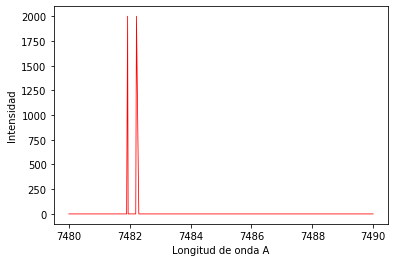

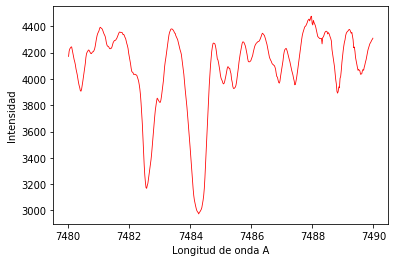

In [17]:
#------------------------------------------------------------------------------------------
datafeIX = np.loadtxt('FeI-IX.dat')

plt.figure()
plt.plot(datafeIX[:,0], datafeIX[:,1], linewidth=0.8, c='red')
#plt.scatter(datafe[:,1], datafe[:,0], marker = 'o', s = 20, c='r')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('FeI-IX.png', dpi=480)
plt.show()

datahdIX = np.loadtxt('hd190421-IX.dat')

plt.figure()
plt.plot(datahdIX[:,0], datahdIX[:,1], linewidth=0.8, c='red')
#plt.scatter(datahd2[:,0], datahd2[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('HD190421-IX.png', dpi=480)
plt.show()


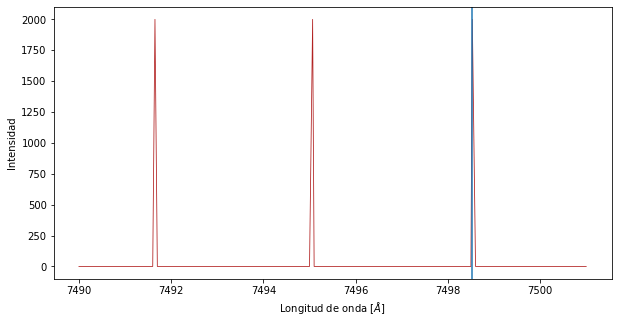

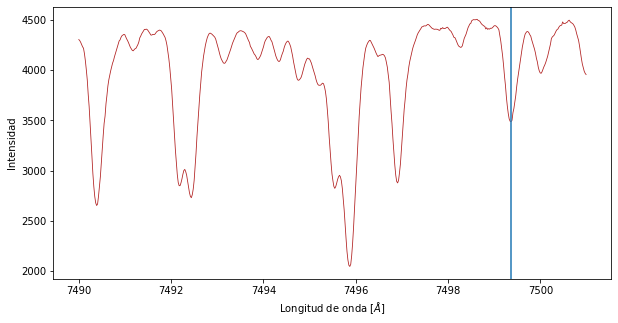

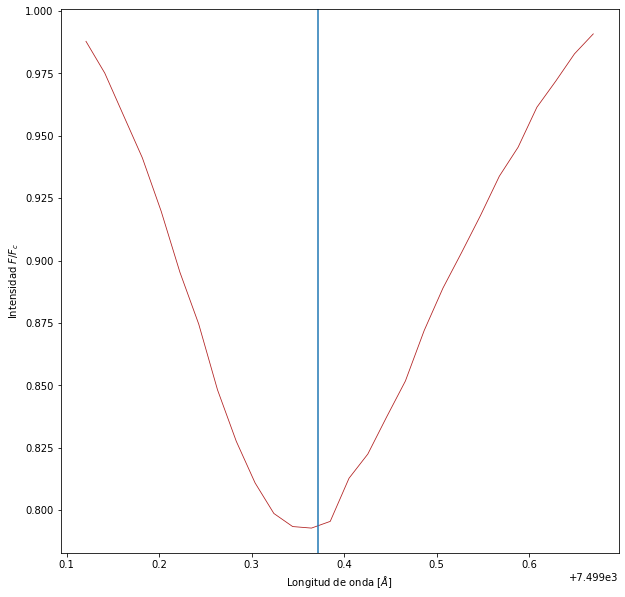

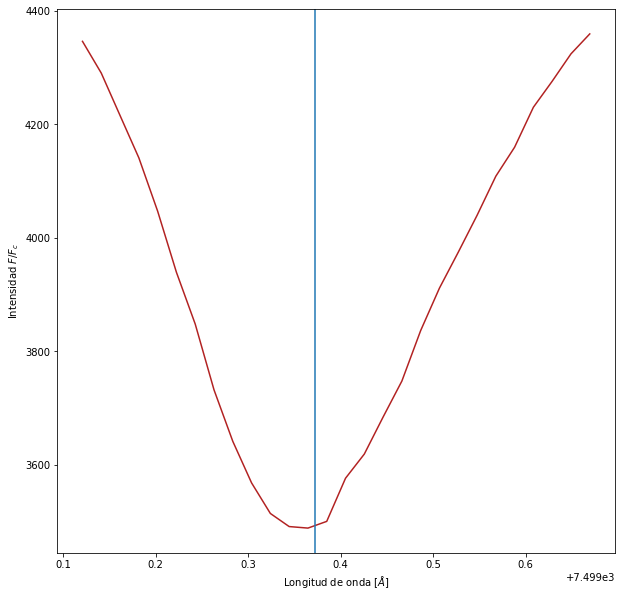

[7499.12093699 7499.14124546 7499.16155393 7499.1818624  7499.20217087
 7499.22247934 7499.2427878  7499.26309627 7499.28340474 7499.30371321
 7499.32402168 7499.34433015 7499.36463862 7499.38494709 7499.40525556
 7499.42556403 7499.4458725  7499.46618097 7499.48648944 7499.5067979
 7499.52710637 7499.54741484 7499.56772331 7499.58803178 7499.60834025
 7499.62864872 7499.64895719 7499.66926566]
[0.98781824 0.9750922  0.95809396 0.94113872 0.91978482 0.89528729
 0.87455097 0.84819659 0.82756379 0.81090488 0.79865813 0.79341464
 0.79280061 0.79549049 0.81277236 0.8224589  0.8372941  0.8517156
 0.8719486  0.88895696 0.90332409 0.91807947 0.93377913 0.94540914
 0.96142016 0.97184089 0.98280713 0.99079924]
28
7499.390186989745 0.9878182426207046
7499.38808698974 0.9750922043350909
7499.382686989729 0.9580939590296591
7499.381386989728 0.9411387211368409
7499.375836989716 0.9197848167998637
7499.3689869897025 0.8952872900833636
7499.365936989696 0.8745509660075454
7499.362386989689 0.8481965

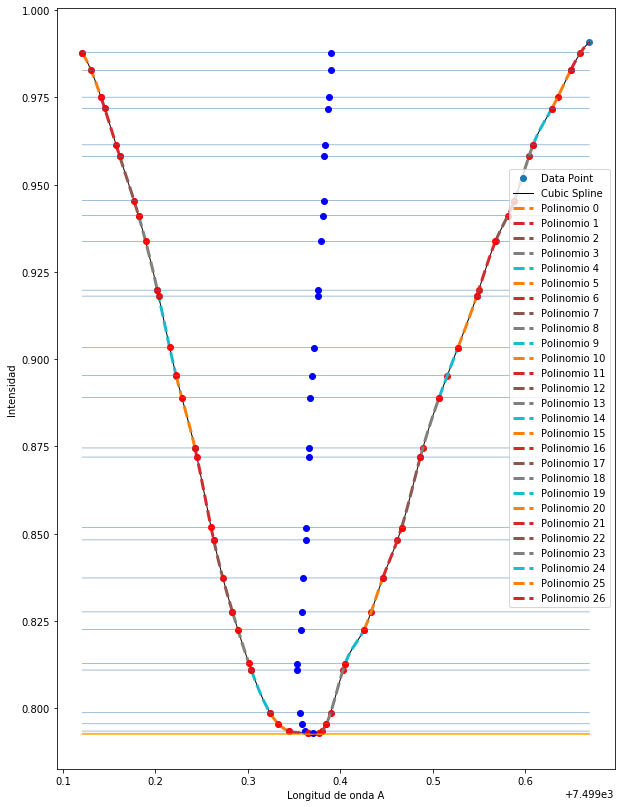

0.7925141581041599


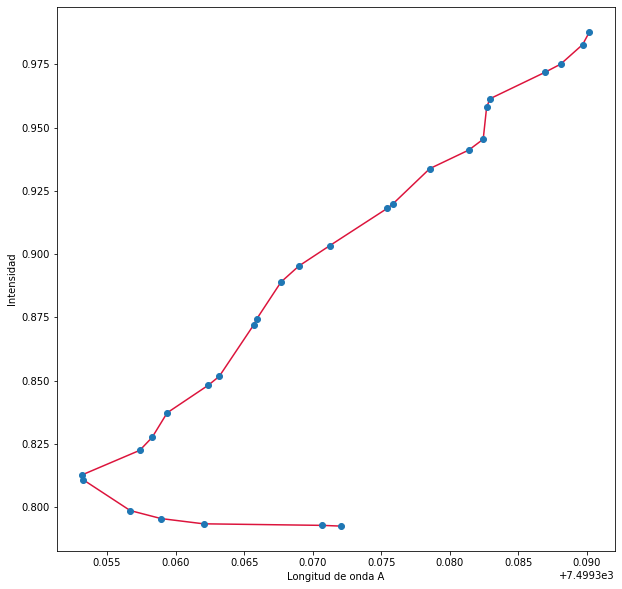

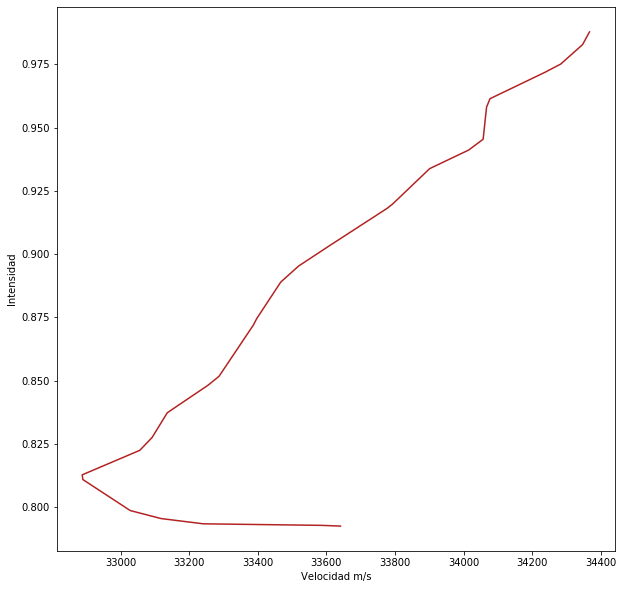

[23604. 24416. 25228. 26040. 26851. 27663. 28475. 29287. 30098. 30910.
 31722. 32534. 33345. 34157. 34969. 35781. 36593. 37404. 38216. 39028.
 39840. 40651. 41463. 42275. 43087. 43898. 44710. 45522.]
[0.98781824 0.9750922  0.95809396 0.94113872 0.91978482 0.89528729
 0.87455097 0.84819659 0.82756379 0.81090488 0.79865813 0.79341464
 0.79280061 0.79549049 0.81277236 0.8224589  0.8372941  0.8517156
 0.8719486  0.88895696 0.90332409 0.91807947 0.93377913 0.94540914
 0.96142016 0.97184089 0.98280713 0.99079924]


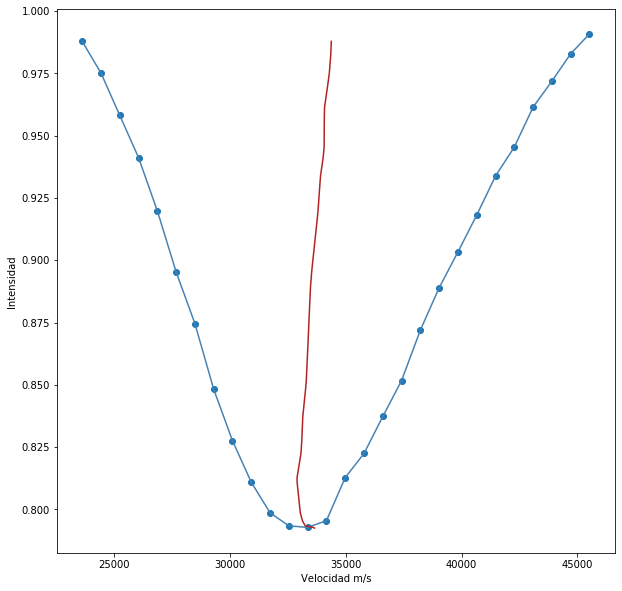

34368.07800219293 0.9878182426207046
34282.70050217554 0.9750922043350909
34067.72250213174 0.9580939590296591
34017.153002121435 0.9411387211368409
33793.54500207588 0.9197848167998637
33520.77750202031 0.8952872900833636
33400.09200199573 0.8745509660075454
33256.92700196656 0.8481965896669545
33094.481501933464 0.827563792728
32891.460001892105 0.8109048751892045
33029.601501920246 0.7986581271061591
33244.51500196403 0.7934146431256364
33588.54200203412 0.7928006109629318
33118.2310019383 0.7954904898549091
32889.59300189172 0.8127723558156363
33056.52500192573 0.8224588960372501
33137.49250194222 0.83729410017775
33289.590501973216 0.8517155959724318
33388.944001993455 0.8719486049803409
33469.62450200989 0.88895696221675
33612.284002038956 0.9033240904040227


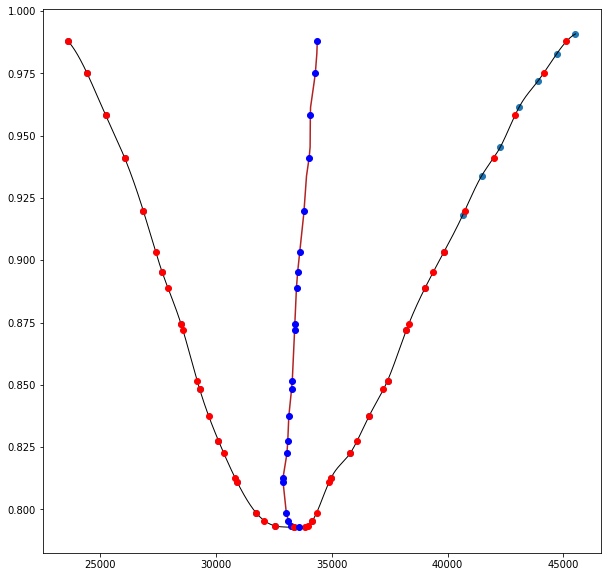

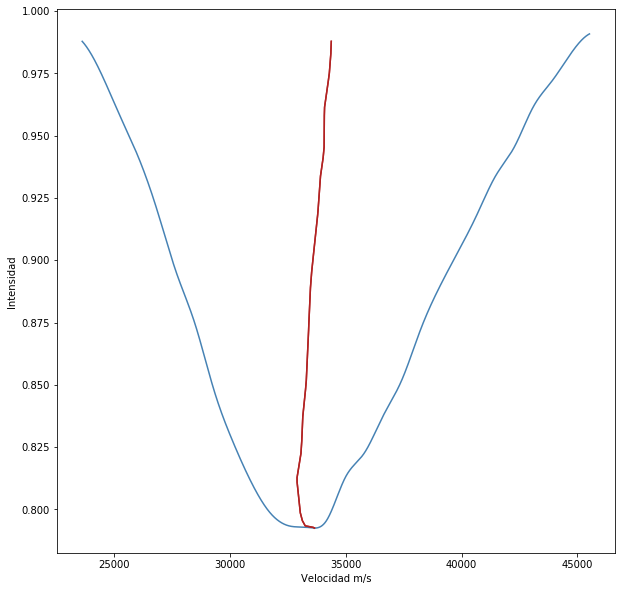

In [18]:
'''datafeVIII = np.loadtxt('FeI-VIII.dat')

xcoords1 = [7473.5539]
colors = ['b']
fig = plt.figure(figsize = (10, 5)) 
plt.plot(datafeVIII[:,0], datafeVIII[:,1], linewidth=0.8, c='tomato')
#plt.scatter(datafe[:,1], datafe[:,0], marker = 'o', s = 20, c='r')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.ylabel('Intensidad')
plt.savefig('FeI-VIII.png', dpi=720)
plt.show()

datahdVIII = np.loadtxt('hd190421-VIII.dat')
xcoords1 = [7474.3715]
colors = ['b']
fig = plt.figure(figsize = (10, 5)) 
plt.plot(datahdVIII[:,0], datahdVIII[:,1], linewidth=0.8, c='tomato')
#plt.scatter(datahd2[:,0], datahd2[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.ylabel('Intensidad')
plt.savefig('HD190421-VIII.png', dpi=720)
plt.show()

#----------------------------------------------------------------------------------

# seleccionar datos ----------------------------------------------------------------------------
dataVIII1 = np.loadtxt('VIII1.dat')
#Fnorm = datanormVIII1[:,1]
#datanVIII1 = preprocessing.normalize(datanormVIII1)
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanVIII1 = dataVIII1/4400

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataVIII1[:,0], datanVIII1[:,1], linewidth=0.8, c='tomato')
plt.axvline(xcoords1, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('VIII1.png', dpi=720)
plt.show()

dataVIII1 = np.loadtxt('VIII1.dat')

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataVIII1[:,0], dataVIII1[:,1], linewidth=1.5, c='tomato')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.axvline(xcoords1, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('VIII1.pdf', dpi=720)
plt.show()'''
#------------------------------------------------------------------------------------------
datafeX = np.loadtxt('FeI-X.dat')

xcoords1 = [7498.5304]
colors = ['b']
fig = plt.figure(figsize = (10, 5)) 
plt.plot(datafeX[:,0], datafeX[:,1], linewidth=0.8, c='firebrick')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.ylabel('Intensidad')
plt.savefig('FeI-X.png', dpi=240)
plt.show()

datahdX = np.loadtxt('hd190421-X.dat')
xcoords1 = [7499.3720]
colors = ['b']
fig = plt.figure(figsize = (10, 5)) 
plt.plot(datahdX[:,0], datahdX[:,1], linewidth=0.8, c='firebrick')
plt.xlabel('Longitud de onda [$\AA$]')
plt.axvline(xcoords1, label='Bisector II1')
plt.ylabel('Intensidad')
plt.savefig('HD190421-X.png', dpi=240)
plt.show()


#----------------------------------------------------------------------------------

# seleccionar datos ----------------------------------------------------------------------------
dataX3 = np.loadtxt('X3.dat')
#Fnorm = datanormX3[:,1]
#datanX3 = preprocessing.normalize(datanormX3)
#Fnorm = datanormI1[:,1]
#datanI1 = preprocessing.normalize(datanormI1)
datanX3 = dataX3/4400


fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataX3[:,0], datanX3[:,1], linewidth=0.8, c='firebrick')
plt.axvline(xcoords1, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('x3.png', dpi=240)
plt.show()

dataX3 = np.loadtxt('X3.dat')

fig = plt.figure(figsize = (10, 10)) 
plt.plot(dataX3[:,0], dataX3[:,1], linewidth=1.5, c='firebrick')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.axvline(xcoords1, label='Bisector II1')
plt.xlabel('Longitud de onda [$\AA$]')
plt.ylabel('Intensidad $F/F_{c}$')
plt.savefig('X3.pdf', dpi=240)
plt.show()

##############################################################################################
###################Construccion del bisector ###################################################
#-----------------------------------------------------------------------------------------------

# Seleccionar coordenandas ---------------------------------------------------------------------
x = dataX3[:,0]
y = datanX3[:,1]

print(x)
print(y)
print(x.shape[0])

# Cubic Spline regresion -----------------------------------------------------------------------
s = interpolate.CubicSpline(x, y)

arr = np.arange(np.amin(x), np.amax(x), 0.0001)
s = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 14)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)


#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(x.shape[0] - 1):
    segment_x = np.linspace(x[i], x[i + 1], 100)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    
    plt.plot(segment_x, segment_y, label='Polinomio {}'.format(i), ls='--', lw=3)
    @np.vectorize
    def constant_function1(x):
        return datanX3[i,1]
    delta_x1 = np.arange(dataX3[0,0], dataX3[27,0], 0.0001)
    
    idx = np.argwhere(np.diff(np.sign(s(arr)-constant_function1(i))) != 0).reshape(-1)+0
    
        
    plt.plot(arr[idx], s(arr)[idx], 'ro')
    plt.plot(delta_x1, constant_function1(delta_x1), linewidth=0.5, c='steelblue')
    plt.plot()
    #print(arr[idx][0])
    #print(arr[idx][-1])
    bisector = (arr[idx][0]+arr[idx][1])/2
    #print(bisector)
    plt.plot(bisector, constant_function1(bisector), 'bo')
    print(bisector, constant_function1(bisector))
    plt.plot(segment_x, segment_y, ls='-', lw=0.1)
#for j in range(18):
   # print(arr[idx][j+1], arr[idx][j])
    
@np.vectorize
def constant_functionmini(x):
    return min(s(arr))

delta_xm = np.arange(dataX3[0,0], dataX3[27,0], 0.0001)
plt.plot(delta_xm, constant_functionmini(delta_xm), linewidth=1.0, c='orange')

#print(constant_functionmini)
    
idmin = np.argwhere(np.diff(np.sign(s(arr)-constant_functionmini(delta_xm))) != 0).reshape(-1)+0

plt.plot(arr[idmin], s(arr)[idmin], 'crimson')
print('minimos')
print(arr[idmin])
print(s(arr)[idmin])

plt.legend()
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('BisectorX3.png', dpi=240)
plt.show()

print(min(s(arr)))

#########################################################################################
#Transformar a velocidad el espectro de cada liena de absorcion ------------------------------
from seaborn import load_dataset

# seleccionar datos ----------------------------------------------------------------------------
BisecX3 = np.loadtxt('BisecX3.dat')

xb = BisecX3[:,0]
yb = BisecX3[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'crimson')
plt.plot(xb, yb, 'o', label='Data Point')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorX3.png', dpi=240)
plt.show()

#Manipulacion datos
data = np.genfromtxt('X3.dat')
data = ((data-7498.5304)/7498.5304)*299729458
np.savetxt("X3v.dat", data, fmt='%d')

#Transformar a velocidades
#Construccion del bisector
#-----------------------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np

data = np.genfromtxt('BisecX3.dat')
data = ((data-7498.5304)/7498.5304)*299729458
np.savetxt("BisecX3v.dat", data, fmt='%d')

BisecX3v = np.loadtxt('BisecX3v.dat')

xb = BisecX3v[:,0]
yb = BisecX3[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorX3v.png', dpi=240)
plt.show()

############################################
# seleccionar datos ----------------------------------------------------------------------------
dataX3v = np.genfromtxt('X3v.dat')

# Seleccionar coordenandas ---------------------------------------------------------------------
#x = dataI1[:,0]
x = dataX3v[:,0]
y = datanX3[:,1]

print(x)
print(y)

fig = plt.figure(figsize = (10, 10)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(x, y, 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorX3v1.png', dpi=240)
plt.show()

arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

#fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize = (10, 10)) 
#ax.hold(True)
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arrv, sv(arrv), 'k-', label='Cubic Spline', lw=1)
plt.plot(xb, yb, 'firebrick')

#print(datavI1[0,0])
#print(datavI1[20,0])

#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(21):
    
    def constant_functionv1(x):
        return datanX3[i,1]
    delta_xv1 = np.arange(dataX3v[0,0], dataX3v[21,0], 0.001)
    
    idxv = np.argwhere(np.diff(np.sign(sv(arrv)-constant_functionv1(i))) != 0).reshape(-1)+0
            
    plt.plot(arrv[idxv], sv(arrv)[idxv], 'ro')
    #plt.plot(delta_xv1, constant_functionv1(delta_xv1), linewidth=0.5, c='orange')
    plt.plot()
    #print(arr[idx])
    bisectorv = (arrv[idxv][0]+arrv[idxv][1])/2
    #print(bisector)
    plt.plot(bisectorv, constant_functionv1(bisectorv), 'bo')
    print(bisectorv, constant_functionv1(bisectorv))

#-------------------------------------------------------------------------------    
arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

fig = plt.figure(figsize = (10, 10)) 
#plt.plot(x, y, 'steelblue')
plt.plot(arrv, sv(arrv), 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorX3vs.png', dpi=240)
plt.show()

####################################################################################
####################################################################################

#----------------------------------------------------------------------------------

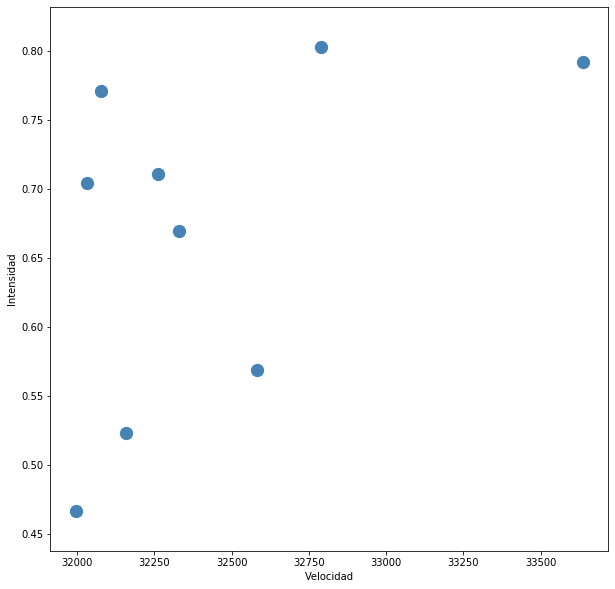

In [23]:
# cortar y ver seccion de espectro

datagra = np.loadtxt('granulacionNorm.dat')

fig = plt.figure(figsize = (10, 10)) 
#plt.plot(datahd2[:,0], datahd2[:,1], linewidth=0.4, c='steelblue')
plt.scatter(datagra[:,1], datagra[:,2], marker = 'o', s = 200.0, c='steelblue', linewidth=1.0)
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad F/Fc')
plt.savefig('granulacion.png', dpi=240)
plt.show()



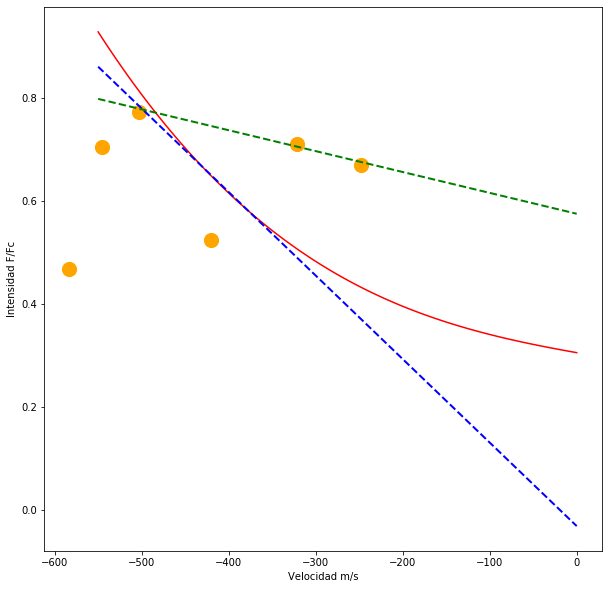

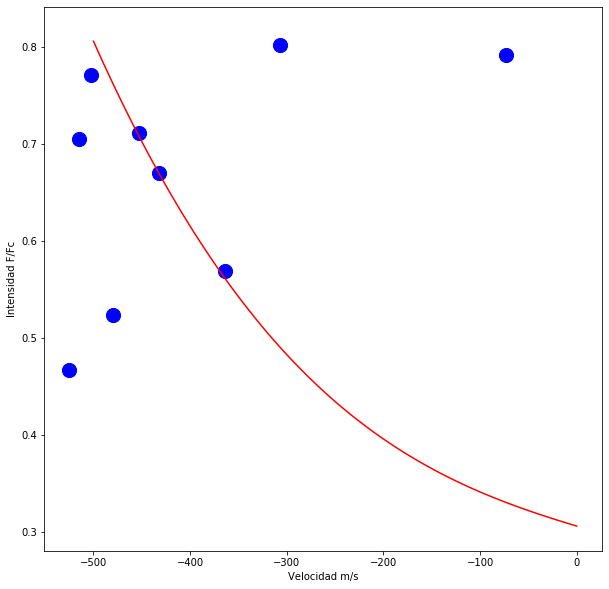

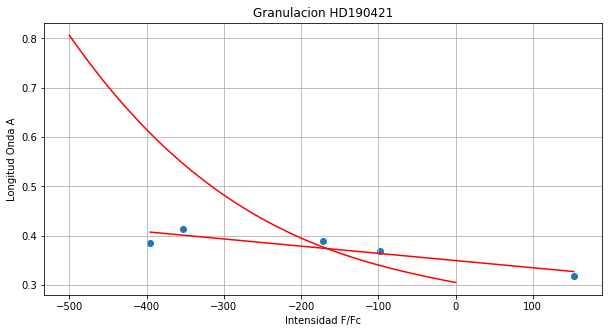

0.34821452637885625


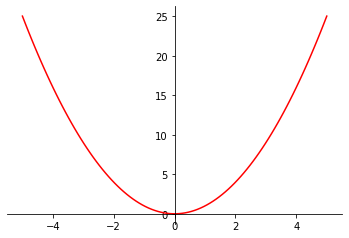

In [36]:
# cortar y ver seccion de espectro

datagra = np.loadtxt('granulacionv.dat')

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-550,0,100)
y = 0.3056-2.9902*10**(-4)*x+3.2008*10**(-7)*x**2-2.1689*10**(-9)*x**3
yl1 = -1.620*10**(-3)*x-3.08*10**(-2)
yl2 = -4.051*10**(-4)*x+5.75*10**(-1)

fig = plt.figure(figsize = (10, 10)) 
#plt.plot(datahd2[:,0], datahd2[:,1], linewidth=0.4, c='steelblue')
plt.scatter(datagra[:,0], datagra[:,1], marker = 'o', s = 200.0, c='orange', linewidth=1.0)
plt.plot(x,y, 'r')
plt.plot(x,yl1, 'blue', ls='--', linewidth = 2.0)
plt.plot(x,yl2, 'green', ls='--', linewidth = 2.0)
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad F/Fc')
plt.savefig('granulacionv0.png', dpi=240)
plt.show()

# cortar y ver seccion de espectro

datagra = np.loadtxt('granulacionescalada.dat')

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-500,0,100)
y = 0.3056-2.9902*10**(-4)*x+3.2008*10**(-7)*x**2-2.1689*10**(-9)*x**3
yl1 = -1.620*10**(-3)*x-1.756*10**(-2)

fig = plt.figure(figsize = (10, 10)) 
#plt.plot(datahd2[:,0], datahd2[:,1], linewidth=0.4, c='steelblue')
plt.scatter(datagra[:,0], datagra[:,1], marker = 'o', s = 200.0, c='blue', linewidth=1.0)
plt.plot(x,y, 'r')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad F/Fc')
plt.savefig('granulacionvesca.png', dpi=240)
plt.show()


granulacion = np.genfromtxt('granulacionregre.dat')

xs = granulacion[:,3]
ys = granulacion[:,2]

degree = 1
poly_fit = np.poly1d(np.polyfit(xs,ys, degree))



# Plot data
#xx = np.linspace(0, 26, 100)
fig = plt.figure(figsize = (10, 5))
plt.plot(xs, poly_fit(xs), c='r',linestyle='-')
plt.plot(x,y, 'r')
plt.title('Granulacion HD190421')
plt.xlabel('X')
plt.ylabel('Y')
#plt.axis([0, 25, 0, 100])
plt.grid(True)
plt.scatter(xs, ys)
plt.xlabel('Intensidad F/Fc')
plt.ylabel('Longitud Onda A')
plt.savefig('granulacionregre.png', dpi=240)
plt.show()

# Predict price
print( poly_fit(12) )


import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(-5,5,100)

# the function, which is y = x^2 here
y = x**2

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

In [21]:
#Construccion del bisector
#-----------------------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np


# Construccion bisectores
import numpy as np
from numpy import *
from scipy.interpolate import *
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

# seleccionar datos ----------------------------------------------------------------------------
dataI1 = np.loadtxt('I1.dat')
datanI1 = np.loadtxt('I1n.dat')
Fnorm = datanormI1[:,1]
normalizedI1= preprocessing.normalize(datanormI1)

# Seleccionar coordenandas ---------------------------------------------------------------------
x = dataI1[:,0]
y = datanI1[:,1]
#y = datanI1[:,1]*(0.79667413/7401.6849)*299792458

# Cubic Spline regresion -----------------------------------------------------------------------
s = interpolate.CubicSpline(x, y)

#print(s.c[0, 0])

arr = np.arange(np.amin(x), np.amax(x), 0.0001)
s = interpolate.CubicSpline(x, y)

#fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize = (10, 10)) 
#ax.hold(True)
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)


#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(x.shape[0] - 1):
    segment_x = np.linspace(x[i], x[i + 1], 100)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    
    plt.plot(segment_x, segment_y, label='Polinomio {}'.format(i), ls='--', lw=3)
    @np.vectorize
    def constant_function1(x):
        return datanI1[i,1]
    delta_x1 = np.arange(dataI1[0,0], dataI1[20,0], 0.0001)
    
    idx = np.argwhere(np.diff(np.sign(s(arr)-constant_function1(i))) != 0).reshape(-1)+0
    
        
    plt.plot(arr[idx], s(arr)[idx], 'ro')
    plt.plot(delta_x1, constant_function1(delta_x1), linewidth=0.5, c='steelblue')
    plt.plot()
    #print(arr[idx])
    bisector = (arr[idx][0]+arr[idx][1])/2
    #print(bisector)
    plt.plot(bisector, constant_function1(bisector), 'bo')
    print(bisector, constant_function1(bisector))
    plt.plot(segment_x, segment_y, ls='-', lw=0.1)
#for j in range(18):
   # print(arr[idx][j+1], arr[idx][j])
    
@np.vectorize
def constant_functionmini(x):
    return min(s(arr))

delta_xm = np.arange(dataI1[0,0], dataI1[20,0], 0.0001)
plt.plot(delta_xm, constant_functionmini(delta_xm), linewidth=1.0, c='orange')

#print(constant_functionmini)
    
idmin = np.argwhere(np.diff(np.sign(s(arr)-constant_functionmini(delta_xm))) != 0).reshape(-1)+0

plt.plot(arr[idmin], s(arr)[idmin], 'crimson')
print('minimos')
print(arr[idmin])
print(s(arr)[idmin])

#idmin = np.argwhere(np.diff(np.sign(min(s(arr))-constant_function1(i))) != 0).reshape(-1)+0
#print(arr[idmin])

plt.legend()
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('BisectorI1b.png', dpi=480)
plt.show()

#print(x.shape[0])
#print(arr[idx][0], arr[idx][1])
print(min(s(arr)))
print()
print()




NameError: name 'datanormI1' is not defined

In [ ]:
#Seccion del espectro a evaluar
from sklearn import preprocessing
import numpy as np

datanorm = np.loadtxt('hd190421-6.dat')

Fnorm = datanorm[:,1]

normalized= preprocessing.normalize(datanorm)
#print(Fnorm)
#print(normalized)

plt.plot(datanorm[:,0], normalized[:,1], linewidth=0.9, c='orange')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('HD190421-6n.png', dpi=1080)
plt.show()

datahd1 = np.loadtxt('hd190421-6.dat')

plt.figure()
plt.plot(datahd1[:,0], datahd1[:,1], linewidth=0.9, c='steelblue')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('HD190421-6.png', dpi=1080)
plt.show()



In [ ]:
'''
#print(x)
#Funciones de corte-----------------------------------
#for j in range(11)
@np.vectorize
def constant_function1(x):
    return datanI1[19,1]
t1 = np.arange(dataI1[0,0], dataI1[19,0], 0.0001)
#print('ejemplo')
#print(t1)
#print(constant_function1(x))
#plt.plot(t1, constant_function1(t1), linewidth=0.3, c='firebrick')
#plt.show()
t = np.arange(dataI1[0,0], dataI1[20-j,0], 0.00001)
print(constant_function1(x))
#interseccion entre datos
# - interseccion-----------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate, scipy.optimize
#x  = np.linspace(1, 4, 20)
#y2 = np.sin(x)
#y2 = 0.05*x
plt.plot(x, y, marker='o', mec='none', ms=4, lw=1, label='y1')
plt.plot(x, constant_function1(x), marker='o', mec='none', ms=4, lw=1, label='y2')
idx = np.argwhere(np.diff(np.sign(y - y2)) != 0)
plt.plot(x[idx], y[idx], 'ms', ms=7, label='Nearest data-point method')
interp1 = scipy.interpolate.InterpolatedUnivariateSpline(x, y)
interp2 = scipy.interpolate.InterpolatedUnivariateSpline(x, constant_function1(x))
new_x = np.linspace(x.min(), x.max(), 100)
new_y1 = interp1(new_x)
new_y2 = interp2(new_x)
idx = np.argwhere(np.diff(np.sign(new_y1 - new_y2)) != 0)
plt.plot(new_x[idx], new_y1[idx], 'ro', ms=7, label='Nearest data-point method, with re-interpolated data')
def difference(x):
    return np.abs(interp1(x) - interp2(x))
x_at_crossing = scipy.optimize.fsolve(difference, x0=3.0)
plt.plot(x_at_crossing, interp1(x_at_crossing), 'cd', ms=7, label='fsolve method')
plt.legend(frameon=False, fontsize=10, numpoints=1, loc='lower left')
plt.savefig('curve crossing.png', dpi=200)
plt.show()

print(x)
print(y)
print(y2)
\

#print('inicio for')
#------------------------------------------------------
for j in range (13):
    @np.vectorize
    def constant_function(x):
        return datanI1[20-j,1]
    delta_x = np.arange(dataI1[0,0], dataI1[20-j,0], 0.00001)
    #print(delta_x)
    #print(constant_function(x))
   # plt.plot(delta_x, constant_function(delta_x), linewidth=0.3, c='firebrick')
        
    
#print('fin for')
'''

In [ ]:
from seaborn import load_dataset

# seleccionar datos ----------------------------------------------------------------------------
BisecI = np.loadtxt('Bisec.dat')

xb = BisecI[:,0]
yb = BisecI[:,1]

fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorI1.png', dpi=4800)
plt.show()




In [ ]:
#Manipulacion datos
data = np.genfromtxt('I1.dat')
data = ((data-7401.6849)/7401.6849)*299729458
np.savetxt("I1v.dat", data, fmt='%d')

print(data)

In [ ]:
#Transformar a velocidades
#Construccion del bisector
#-----------------------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np


# Construccion bisectores
import numpy as np
from numpy import *
from scipy.interpolate import *
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

datanI1 = np.loadtxt('I1n.dat')
datavI1 = np.genfromtxt('I1v.dat')
BisecI1v = np.loadtxt('BisecI1v1.dat')
BisecI1v1 = np.loadtxt('BisecI1v1-1.dat')
BisecI = np.loadtxt('Bisec.dat')

xb = BisecI1v[:,0]
yb = BisecI1v[:,1]

xb1 = BisecI1v1[:,0]
yb1 = BisecI1v1[:,1]


fig = plt.figure(figsize = (10, 10)) 
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorI1v.png', dpi=480)
plt.show()


# seleccionar datos ----------------------------------------------------------------------------
datanI1 = np.loadtxt('I1n.dat')
datavI1 = np.genfromtxt('I1v.dat')

velocidad = (0.79667413/7401.6849)*299792458
print(velocidad)

# Seleccionar coordenandas ---------------------------------------------------------------------
#x = dataI1[:,0]
x = datavI1[:,0]
y = datanI1[:,1]

print(x)
print(y)
print(xb)
print(yb)

fig = plt.figure(figsize = (10, 10)) 
plt.plot(x, y, 'o', label='Data Point')
plt.plot(x, y, 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorI1v.png', dpi=720)
plt.show()


arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

#fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize = (10, 10)) 
#ax.hold(True)
plt.plot(x, y, 'o', label='Data Point')
plt.plot(arrv, sv(arrv), 'k-', label='Cubic Spline', lw=1)
plt.plot(xb, yb, 'firebrick')

print(datavI1[0,0])
print(datavI1[20,0])


#iteracion para ver segmentos--------------------------------------------------------------------
for i in range(20):
    
    def constant_functionv1(x):
        return datanI1[i,1]
    delta_xv1 = np.arange(datavI1[0,0], datavI1[20,0], 0.001)
    
    idxv = np.argwhere(np.diff(np.sign(sv(arrv)-constant_functionv1(i))) != 0).reshape(-1)+0
    
        
    plt.plot(arrv[idxv], sv(arrv)[idxv], 'ro')
    #plt.plot(delta_xv1, constant_functionv1(delta_xv1), linewidth=0.5, c='orange')
    plt.plot()
    #print(arr[idx])
    bisectorv = (arrv[idxv][0]+arrv[idxv][1])/2
    #print(bisector)
    plt.plot(bisectorv, constant_functionv1(bisectorv), 'bo')
    print(bisectorv, constant_functionv1(bisectorv))

#-------------------------------------------------------------------------------    
arrv = np.arange(np.amin(x), np.amax(x), 0.001)
sv = interpolate.CubicSpline(x, y)

#fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize = (10, 10)) 
#ax.hold(True)
#plt.plot(x, y, 'steelblue')
plt.plot(arrv, sv(arrv), 'steelblue')
plt.plot(xb, yb, 'firebrick')
plt.plot(xb, yb, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorI1vs.png', dpi=720)
plt.show()

#fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize = (10, 10)) 
#ax.hold(True)
#plt.plot(x, y, 'steelblue')
plt.plot(arrv, sv(arrv), 'steelblue')
plt.plot(xb1, yb1, 'firebrick')
plt.xlabel('Velocidad m/s')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorI1vs1.png', dpi=720)
plt.show()


#print(datavI1[0,0])
#print(datavI1[20,0])



In [ ]:
from seaborn import load_dataset

# seleccionar datos ----------------------------------------------------------------------------
BisecI = np.loadtxt('Bisec.dat')

#datanI1 = np.loadtxt('I1n.dat')
#Fnorm = datanormI1[:,1]
velocidad = (0.79667413/7401.6849)*299792458
print(velocidad)

x = BisecI[:,0]
y = BisecI[:,1]

plt.plot(x, y*velocidad, 'blue')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('LineaBisectorI1.png', dpi=1080)
plt.show()

In [ ]:
from sklearn import preprocessing
import numpy as np

datanormI1 = np.loadtxt('I1.dat')
Fnorm = datanormI1[:,1]
normalizedI1= preprocessing.normalize(datanormI1)
np.savetxt("I1n.dat", normalizedI1)

datanormII1 = np.loadtxt('II1.dat')
Fnorm = datanormII1[:,1]
normalizedII1= preprocessing.normalize(datanormII1)
np.savetxt("II1n.dat", normalizedII1)



#Manipulacion datos
#data = np.genfromtxt('I1.dat')
#data = data[normalizedI1]
#np.savetxt("I1n.dat", data, fmt='%d')

In [ ]:
#Seccion del espectro a evaluar

#---------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np


# Construccion bisectores
import numpy as np
from numpy import *
from scipy.interpolate import *
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
#from lmfit.models import SkewedGaussianModel

# seleccionar datos -----------------------------------
dataI1 = np.loadtxt('I1.dat')
datanI1 = np.loadtxt('I1n.dat')
Fnorm = datanormI1[:,1]
normalizedI1= preprocessing.normalize(datanormI1)

# Seleccionar coordenandas ----------------------------
x = dataI1[:,0]
y = datanI1[:,1]

#print(x)

#Funciones de corte-----------------------------------

#for j in range(11)

@np.vectorize
def constant_function1(x):
    return datanI1[19,1]

t1 = np.arange(dataI1[0,0], dataI1[19,0], 0.0001)
#plt.plot(t1, constant_function1(t1))
#plt.show()

@np.vectorize
def constant_function2(x):
    return datanI1[18,1]

t2 = np.arange(dataI1[0,0], dataI1[18,0], 0.0001)

@np.vectorize
def constant_function3(x):
    return datanI1[17,1]

t3 = np.arange(dataI1[0,0], dataI1[17,0], 0.0001)

@np.vectorize
def constant_function4(x):
    return datanI1[16,1]

t4 = np.arange(dataI1[1,0], dataI1[16,0], 0.0001)

@np.vectorize
def constant_function5(x):
    return datanI1[15,1]

t5 = np.arange(dataI1[1,0], dataI1[15,0], 0.0001)

@np.vectorize
def constant_function6(x):
    return datanI1[14,1]

t6 = np.arange(dataI1[2,0], dataI1[14,0], 0.0001)

@np.vectorize
def constant_function7(x):
    return datanI1[13,1]

t7 = np.arange(dataI1[3,0], dataI1[13,0], 0.0001)

@np.vectorize
def constant_function8(x):
    return datanI1[12,1]

t8 = np.arange(dataI1[4,0], dataI1[12,0], 0.0001)

@np.vectorize
def constant_function9(x):
    return datanI1[11,1]

t9 = np.arange(dataI1[5,0], dataI1[11,0], 0.0001)

@np.vectorize
def constant_function10(x):
    return datanI1[10,1]

t10 = np.arange(dataI1[6,0], dataI1[10,0], 0.0001)

@np.vectorize
def constant_function11(x):
    return datanI1[9,1]

t11 = np.arange(dataI1[7,0], dataI1[9,0], 0.0001)

@np.vectorize
def constant_function12(x):
    return datanI1[8,1]

t12 = np.arange(dataI1[6,0], dataI1[8,0], 0.0001)

@np.vectorize
def constant_function13(x):
    return datanI1[7,1]

t13 = np.arange(dataI1[7,0], dataI1[7,0], 0.0001)


# Cubic -----------------------------------------------
s = interpolate.CubicSpline(x, y)

print(s.c[0, 0])

arr = np.arange(np.amin(x), np.amax(x), 0.001)
s = interpolate.CubicSpline(x, y)

fig, ax = plt.subplots(1, 1)
#ax.hold(True)
ax.plot(x, y, 'bo', label='Data Point')
ax.plot(arr, s(arr), 'k-', label='Cubic Spline', lw=1)

for i in range(x.shape[0] - 1):
    segment_x = np.linspace(x[i], x[i + 1], 10)
    # A (4, 100) array, where the rows contain (x-x[i])**3, (x-x[i])**2 etc.
    exp_x = (segment_x - x[i])[None, :] ** np.arange(4)[::-1, None]
    # Sum over the rows of exp_x weighted by coefficients in the ith column of s.c
    segment_y = s.c[:, i].dot(exp_x)
    #ax.plot(segment_x, segment_y, label='Segment {}'.format(i), ls='-', lw=3)
    ax.plot(segment_x, segment_y, ls='-', lw=1)

ax.legend()

plt.plot(t1, constant_function1(t1), linewidth=0.3, c='firebrick')
plt.plot(t2, constant_function2(t2), linewidth=0.3, c='firebrick')
plt.plot(t3, constant_function3(t3), linewidth=0.3, c='firebrick')
plt.plot(t4, constant_function4(t4), linewidth=0.3, c='firebrick')
plt.plot(t5, constant_function5(t5), linewidth=0.3, c='firebrick')
plt.plot(t6, constant_function6(t6), linewidth=0.3, c='firebrick')
plt.plot(t7, constant_function7(t7), linewidth=0.3, c='firebrick')
plt.plot(t8, constant_function8(t8), linewidth=0.3, c='firebrick')
plt.plot(t9, constant_function9(t9), linewidth=0.3, c='firebrick')
plt.plot(t10, constant_function10(t10), linewidth=0.3, c='firebrick')
plt.plot(t11, constant_function11(t11), linewidth=0.3, c='firebrick')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
#plt.savefig('BI1.png', dpi=1080)
plt.show()

#idx = np.argwhere(np.diff(np.sign(y-constant_function1(x))) !=0). reshape(0)+0
#print(y)
#print(constant_function1(x))

fig = plt.figure(figsize = (10, 5)) 
plt.plot(x, y, marker = 'o', c='orange')
plt.plot(x, s(x))
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
#plt.savefig('BisectorI1.png', dpi=1080)
plt.show()



In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
  
# Creating vectors X and Y 
x = datanormI1[:,0]
#x = np.linspace(-1, 1, 100) 
#y = x**3+1
#y = (5.275280717313*10**2)*x**6-(2.343003894272*10**7)*x**5+(4.335999306329*10**11)*x**4-(4.279609328645*10**15)*x**3+(2.375973396974*10**19)*x**2-(7.035221081723*10**22)*x+(8.679659411990*10**25)
#y = 163.247546364553*x**5 - 6042247.993360080000*x**4 + 89456194887.4866*x**3 - 662204763111336*x**2 + 2451004923439790000*x - 3628741723537500000000 

#y = 5,275280717313E+02x6 
#- 2,343003894272E+07x5 
#+ 4,335999306329E+11x4 
#- 4,279609328645E+15x3 
#+ 2,375973396974E+19x2 
#- 7,035221081723E+22x 
#+ 8,679659411990E+25 
  
fig = plt.figure(figsize = (10, 5)) 
# Create the plot 
plt.plot(x, y) 

print(x)
print(y)

# Show the plot 
plt.show() 

In [ ]:
#Seccion del espectro a evaluar

#---------------------------------------------------------------------------------
from sklearn import preprocessing
import numpy as np

datanormI1 = np.loadtxt('I1.dat')

Fnorm = datanormI1[:,1]

normalizedI1= preprocessing.normalize(datanormI1)
#print(Fnorm)
#print(normalized)

#Manipulacion datos
#data = np.genfromtxt('I1.dat')
#data = data[normalizedI1]
#np.savetxt("I1n.dat", data, fmt='%d')

plt.plot(datanormI1[:,0], normalizedI1[:,1], linewidth=0.8, c='crimson')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('I1.png', dpi=1080)
plt.show()

dataI1 = np.loadtxt('I1.dat')

plt.figure()
plt.plot(dataI1[:,0], dataI1[:,1], linewidth=1.5, c='crimson')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('I1.pdf', dpi=1080)
plt.show()

#----------------------------------------------------------------------------------

datanormII1 = np.loadtxt('II1.dat')

Fnorm = datanormII1[:,1]

normalizedII1= preprocessing.normalize(datanormII1)
#print(Fnorm)
#print(normalized)

plt.plot(datanormII1[:,0], normalizedII1[:,1], linewidth=0.8, c='indigo')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('II1.png', dpi=1080)
plt.show()

dataII1 = np.loadtxt('II1.dat')

plt.figure()
plt.plot(dataII1[:,0], dataII1[:,1], linewidth=1.5, c='indigo')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('II1.pdf', dpi=1080)
plt.show()

#----------------------------------------------------------------------------------

datanormII2 = np.loadtxt('II2.dat')

Fnorm = datanormII2[:,1]

normalizedII2= preprocessing.normalize(datanormII2)
#print(Fnorm)
#print(normalized)

plt.plot(datanormII2[:,0], normalizedII2[:,1], linewidth=0.8, c='indigo')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('II2.png', dpi=1080)
plt.show()

dataII2 = np.loadtxt('II2.dat')

plt.figure()
plt.plot(dataII2[:,0], dataII2[:,1], linewidth=1.5, c='indigo')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('II2.pdf', dpi=1080)
plt.show()

#----------------------------------------------------------------------------------

datanormV1 = np.loadtxt('V1.dat')

Fnorm = datanormV1[:,1]

normalizedV1= preprocessing.normalize(datanormV1)
#print(Fnorm)
#print(normalized)

plt.plot(datanormV1[:,0], normalizedV1[:,1], linewidth=0.8, c='gold')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('V1.png', dpi=1080)
plt.show()

dataV1 = np.loadtxt('V1.dat')

plt.figure()
plt.plot(dataV1[:,0], dataV1[:,1], linewidth=1.5, c='gold')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('V1.pdf', dpi=1080)
plt.show()

#----------------------------------------------------------------------------------

datanormV2 = np.loadtxt('V2.dat')

Fnorm = datanormV2[:,1]

normalizedV2= preprocessing.normalize(datanormV2)
#print(Fnorm)
#print(normalized)

plt.plot(datanormV2[:,0], normalizedV2[:,1], linewidth=0.8, c='gold')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('V2.png', dpi=1080)
plt.show()

dataV2 = np.loadtxt('V2.dat')

plt.figure()
plt.plot(dataV2[:,0], dataV2[:,1], linewidth=1.5, c='gold')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('V2.pdf', dpi=1080)
plt.show()

#----------------------------------------------------------------------------------

datanormV3 = np.loadtxt('V3.dat')

Fnorm = datanormV3[:,1]

normalizedV3= preprocessing.normalize(datanormV3)
#print(Fnorm)
#print(normalized)

plt.plot(datanormV3[:,0], normalizedV3[:,1], linewidth=0.8, c='gold')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('V3.png', dpi=1080)
plt.show()

dataV3 = np.loadtxt('V3.dat')

plt.figure()
plt.plot(dataV3[:,0], dataV3[:,1], linewidth=1.5, c='gold')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('V3.pdf', dpi=1080)
plt.show()

#----------------------------------------------------------------------------------

datanormVII1 = np.loadtxt('VII1.dat')

Fnorm = datanormVII1[:,1]

normalizedVII1= preprocessing.normalize(datanormVII1)
#print(Fnorm)
#print(normalized)

plt.plot(datanormVII1[:,0], normalizedVII1[:,1], linewidth=0.8, c='orange')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('VII1.png', dpi=1080)
plt.show()

dataVII1 = np.loadtxt('VII1.dat')

plt.figure()
plt.plot(dataVII1[:,0], dataVII1[:,1], linewidth=1.5, c='orange')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('VII1.pdf', dpi=1080)
plt.show()

#----------------------------------------------------------------------------------

datanormVIII1 = np.loadtxt('VIII1.dat')

Fnorm = datanormVIII1[:,1]

normalizedVIII1= preprocessing.normalize(datanormVIII1)
#print(Fnorm)
#print(normalized)

plt.plot(datanormVIII1[:,0], normalizedVIII1[:,1], linewidth=0.8, c='tomato')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('VIII1.png', dpi=1080)
plt.show()

dataVIII1 = np.loadtxt('VIII1.dat')

plt.figure()
plt.plot(dataVIII1[:,0], dataVIII1[:,1], linewidth=1.5, c='tomato')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('VIII1.pdf', dpi=1080)
plt.show()

#----------------------------------------------------------------------------------

datanormX3 = np.loadtxt('X3.dat')

Fnorm = datanormX3[:,1]

normalizedX3= preprocessing.normalize(datanormX3)
#print(Fnorm)
#print(normalized)

plt.plot(datanormX3[:,0], normalizedX3[:,1], linewidth=0.8, c='firebrick')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('x3.png', dpi=1080)
plt.show()

dataX3 = np.loadtxt('X3.dat')

plt.figure()
plt.plot(dataX3[:,0], dataX3[:,1], linewidth=1.5, c='firebrick')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('X3.pdf', dpi=1080)
plt.show()

In [ ]:
import operator
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# seleccionar datos -----------------------------------
datanormI1 = np.loadtxt('I1.dat')
Fnorm = datanormI1[:,1]
normalizedI1= preprocessing.normalize(datanormI1)

# Seleccionar coordenandas ----------------------------
x = datanormI1[:,0]
y = datanormI1[:,1]

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=20)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='r')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('GaussA.png', dpi=1080)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(7402.3, 7402.8, 100)

# generate points and keep a subset of them
x = datanormI1[:,0]
y = normalizedI1[:,1]

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal']
lw = 1.0
#plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([6]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('Degree6.png', dpi=1080)
plt.show()

In [ ]:
x = datanormI1[:,0]
y = normalizedI1[:,1]

degree = 75
poly_fit = np.poly1d(np.polyfit(x,y, degree))

# Plot data
#xx = np.linspace(0, 26, 100)
plt.plot(x, poly_fit(x), c='r',linestyle='-')
plt.title('Polynomial')
plt.xlabel('X')
plt.ylabel('Y')
#plt.axis([0, 25, 0, 100])
plt.grid(True)
plt.scatter(x, y)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('GaussIA.png', dpi=1080)
plt.show()

# Predict price
print( poly_fit(12) )

In [ ]:
import operator
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

datanormc = np.loadtxt('I1c.dat')

x = datanormc[:,0]
y = datanormc[:,1]

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

print(x)
print(y)

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [ ]:
#Seccion del espectro a evaluar
from sklearn import preprocessing
import numpy as np

datanorm = np.loadtxt('hd190421-5.dat')

Fnorm = datanorm[:,1]

normalized= preprocessing.normalize(datanorm)
#print(Fnorm)
#print(normalized)

plt.plot(datanorm[:,0], normalized[:,1], linewidth=0.8, c='orange')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('HD190421-5n.png', dpi=1080)
plt.show()

datahd1 = np.loadtxt('hd190421-5.dat')

plt.figure()
plt.plot(datahd1[:,0], datahd1[:,1], linewidth=0.8, c='steelblue')
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('HD190421-5.pdf', dpi=1080)
plt.show()


In [ ]:
#Seccion del espectro a evaluar
from sklearn import preprocessing
import numpy as np

datanorm = np.loadtxt('hd190421-51.dat')

Fnorm = datanorm[:,1]

normalized= preprocessing.normalize(datanorm)
#print(Fnorm)
#print(normalized)

plt.plot(datanorm[:,0], normalized[:,1], linewidth=0.8, c='red')
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('HD190421-51n.png', dpi=1080)
plt.show()

datahd1 = np.loadtxt('hd190421-51.dat')

plt.figure()
plt.plot(datahd1[:,0], datahd1[:,1], linewidth=0.8, c='blue')
#plt.plot(datahd1[:,0], 4000, linewidth=0.8, c='blue')
plt.scatter((datahd1[0,0]+datahd1[33,0])/2, datahd1[33,1], marker = 'o', s = 7.5, c='steelblue', linewidth=1.9)
plt.scatter((datahd1[1,0]+datahd1[31,0])/2, datahd1[31,1], marker = 'o', s = 7.5, c='steelblue', linewidth=1.9)
plt.scatter((datahd1[2,0]+datahd1[30,0])/2, datahd1[30,1], marker = 'o', s = 7.5, c='steelblue', linewidth=1.9)
plt.scatter((datahd1[3,0]+datahd1[29,0])/2, datahd1[29,1], marker = 'o', s = 7.5, c='steelblue', linewidth=1.9)
#plt.scatter((datahd1[2,0]+datahd1[31,0])/2, datahd1[31,1], marker = 'o', s = 7.5, c='steelblue', linewidth=1.9)
#plt.scatter(datahd1[:,0], datahd1[:,1], marker = 'o', s = 0.1, c='steelblue', linewidth=0.25)
plt.xlabel('Longitud de onda A')
plt.ylabel('Intensidad')
plt.savefig('HD190421-51.png', dpi=1080)
plt.show()

#Fitting curve skeworm

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skewnorm

params = skewnorm.fit()

'''def gauss(x, x0, y0, sigma):
    p = [x0, y0, sigma]
    return p[1]*np.exp(-(x-p[0])/p[2]**2)
'''




In [ ]:
#Codigo Extra por si algo 

#Dividir archivos

#f = open("FeIIFinal.dat", "r")
#g = open("Fe.dat", "w")

#for line in f:
#    if line.strip():
#        g.write("\t".join(line.split()[:1]) + "\n")
        

#dataFe1.close()
#dataFe.close